## 3-8-1

In [1]:
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np

import seaborn as sns

In [2]:
##################################
#  独自ライブライー： LINE VIEW
# (複数の画像のグラフによる見比べ)
##################################
import cv2;import matplotlib.pyplot as plt;import matplotlib as mpl;from ipywidgets import interact
mpl.rcParams['figure.dpi'] = 140 # グラフで詳細まで見えるように
Imgs_For_Line_View = [] #global変数
Defalut_Y = 20 #global変数

## 使うときは、これを呼ぶ。(双方向バー表示のため、実態をラップ)
def lv( img1, img2=None, img3=None, img4=None, img5=None ):
    global Imgs_For_Line_View
    global Defalut_Y
    Imgs_For_Line_View =  list(filter( lambda x: x is not None, [img1, img2, img3, img4, img5] ) )# Noneを削除
    Defalut_Y = Imgs_For_Line_View[0].shape[0] // 2 # Yの初期値。現状うまく動かず
    interact( lv_real, y = (0, Defalut_Y*2-1, 1) , fig_width=(0,5,0.05), fig_height=(0,5,0.05) ) # 双方向呼び出し

## lvの実体
def lv_real( fig_width=1, fig_height=1, y=Defalut_Y,  ):
    # 図を作成
    plt.figure(figsize=(4 * fig_width,4 * fig_height));plt.xticks(fontsize=4);plt.yticks(fontsize=4)
    # 画像ごとにグラフ線をplot
    for idx, tmp_img in enumerate( Imgs_For_Line_View):
        if  len(tmp_img.shape) >2 and tmp_img.shape[2] >1 : # RGBの３色残ってるときは、白黒に。
            tmp_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        h0, w0 = Imgs_For_Line_View[idx].shape[0], Imgs_For_Line_View[idx].shape[1] # 画像の高さ幅

        # 作図用にピクセルを参照
        tmp_pixel_list=[]
        for x in range(w0):
            pix = tmp_img[y, x]
            tmp_pixel_list.append(pix)
        plt.plot( tmp_pixel_list, label=idx, linewidth = 0.3 )

    plt.legend()
    plt.show()


In [3]:
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
def mplot(img, img2=None):

    img = img.astype(np.uint8)
    im4p = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if img2 is None:
        #     plt.subplot(121)
        plt.imshow(im4p)

    else:
        img2 = img2.astype(np.uint8)
        plt.subplot(121)
        plt.imshow(im4p)

        im4p2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        plt.subplot(122)
        plt.imshow(im4p2)

In [4]:
def bulk_img( img, bulk_h, bulk_w):

    h, w =  img.shape

    dst = np.concatenate([img, np.zeros((bulk_h, w ))])
    dst = np.concatenate([dst, np.zeros((h+bulk_h, bulk_w ))], axis = 1)

    return (dst)


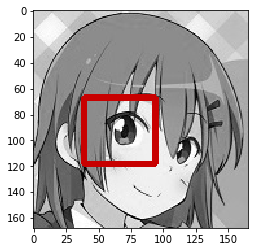

In [5]:

def main():
    img = cv2.imread("sample/3-8/input.png")
    
    
    temp = cv2.imread("sample/3-8/temp.png")
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    temp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)

    h, w = temp.shape
    
    match = cv2.matchTemplate(gray, temp, cv2.TM_SQDIFF)
    min_value, max_value, min_pt, max_pt = cv2.minMaxLoc(match)
    pt = min_pt
    
    cv2.rectangle(img, (pt[0], pt[1]) , (pt[0] + w, pt[1] + h ), (0, 0, 200), 3)
    mplot(img)
#     mplot(temp)

main()

In [6]:
ls sample/3-8/

input.png   result.jpg    sample812.py  sample814.py  sample83.py  test.png
output.png  sample811.py  sample813.py  sample82.py   temp.png


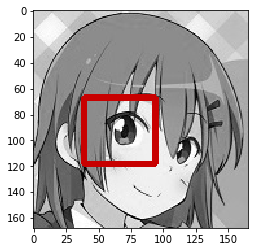

In [7]:
import cv2
import numpy as np


def main():
    img = cv2.imread("sample/3-8/input.png")
    temp = cv2.imread("sample/3-8/temp.png")
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    temp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)
    
    # 
    h, w = temp.shape
    
    match = cv2.matchTemplate(gray, temp, cv2.TM_CCOEFF_NORMED)
    
    min_value, max_value, min_pt, max_pt = cv2.minMaxLoc(match)
    
    pt = max_pt
    
    cv2.rectangle(img, (pt[0], pt[1]),  (pt[0] + w, pt[1] +h), (0, 0, 200), 3)
    mplot(img)
    
    
main()

## Numpy 版

In [8]:
%pdb off
import pixiedust

Automatic pdb calling has been turned OFF
Pixiedust database opened successfully


In [ ]:
import cv2
import numpy as np


def template_matching_ssd(src, temp):

    h, w = src.shape
    ht, wt = temp.shape

    score = np.empty((h-ht, w-wt))

    for dy in range(0, h-ht):
        for dx in range(0, w-wt):
            diff = (src[dy:dy+ht, dx:dx+wt] - temp)**2

            score[dy, dx] = diff.sum()

            pt = np.unravel_index(score.argmin(), score.shape)
            
            
            if dy % 10 == 0 and dx % 100 ==0: print("dx:",dx,"dy:", dy)

    return (pt[1], pt[0], score)


def main():

    img = cv2.imread("sample/3-8/input.png")
    temp = cv2.imread("sample/3-8/temp.png")

    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    temp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)

    h, w = temp.shape

    pt = template_matching_ssd(gray, temp)

    cv2.rectangle(img, (pt[0], pt[1]), (pt[0] + w, pt[1] + h), (0, 0, 200), 3)
    mplot(img)


main()

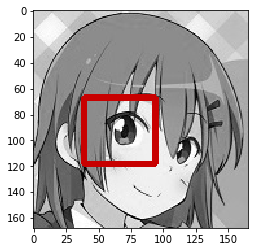

In [10]:
# %%pixie_debugger
import cv2
import numpy as np

score = None

def template_matching_zncc(src, temp):

    h, w = src.shape
    ht, wt = temp.shape

    global score
    score = np.empty((h-ht, w-wt))

    src = np.array(src, dtype="float")
    temp = np.array(temp, dtype="float")

    # テンプレート
    mu_t = np.mean(temp)

    for dy in range(0, h - ht):
        for dx in range(0, w - wt):
            roi = src[dy:dy + ht, dx:dx + wt]

            mu_r = np.mean(roi)

            roi = roi - mu_r

            tmp_temp = temp - mu_t

            num = np.sum(roi * tmp_temp)
            
            den = np.sqrt(np.sum(roi**2)) * np.sqrt(np.sum(tmp_temp**2))
            
            if den == 0:
                score[dy, dx] = 0
            else:
                score[dy, dx] = num / den
            
            
    pt = np.unravel_index(score.argmax(), score.shape)
    
    return (pt[1], pt[0])


def main() :
    img = cv2.imread("sample/3-8/input.png")
    temp = cv2.imread("sample/3-8/temp.png")
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    temp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)

    # テンプレートの画像の高さ・幅
    h, w = temp.shape
    
    pt = template_matching_zncc(gray, temp)
    
#     cv2.rectangle(img, (pt[0], pt[1]  ), (pt[0]+w, pt[1]+h), (0,0,200) , 3)
    cv2.rectangle(img, (pt[0], pt[1]  ), (pt[0]+w, pt[1]+h), (0,0,200) , 3)
    
    mplot(img)

main()

In [11]:
lv(score)


interactive(children=(FloatSlider(value=1.0, description='fig_width', max=5.0, step=0.05), FloatSlider(value=1…

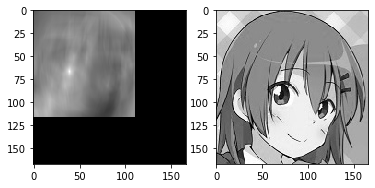

In [12]:
img = cv2.imread("sample/3-8/input.png")
temp = cv2.imread("sample/3-8/temp.png")
# score_256 = (score+1)*128

score_256 =  ((score+1)*128).astype(np.int)
score_256 = bulk_img(score_256, temp.shape[0], temp.shape[1] )
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# gray_score = cv2.cvtColor(score_256, cv2.COLOR_RGB2GRAY)

mplot(score_256, img)


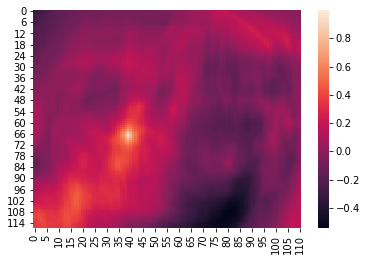

In [13]:
sns.heatmap(score)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


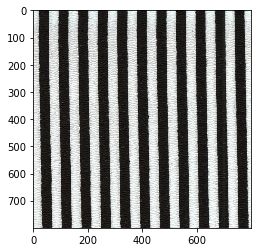

In [14]:
## デバッグ用画像簡易入手
import urllib.request ;import cv2; import matplotlib.pyplot as plt
img_url = 'https://tex-mall.jp/file/item/5a4356082008d/88f661d68f080129fb0e514b8834198f.jpg' # ここを好きに変える
img_shima = cv2.imdecode(np.fromstring(urllib.request.urlopen(img_url).read(), np.uint8), cv2.IMREAD_COLOR)

plt.imshow(img_shima)



dx: 0 dy: 0
dx: 1 dy: 0
dx: 2 dy: 0
dx: 3 dy: 0
dx: 4 dy: 0
dx: 5 dy: 0
dx: 6 dy: 0
dx: 7 dy: 0
dx: 8 dy: 0
dx: 9 dy: 0
dx: 10 dy: 0
dx: 11 dy: 0
dx: 12 dy: 0
dx: 13 dy: 0
dx: 14 dy: 0
dx: 15 dy: 0
dx: 16 dy: 0
dx: 17 dy: 0
dx: 18 dy: 0
dx: 19 dy: 0
dx: 20 dy: 0
dx: 21 dy: 0
dx: 22 dy: 0
dx: 23 dy: 0
dx: 24 dy: 0
dx: 25 dy: 0
dx: 26 dy: 0
dx: 27 dy: 0
dx: 28 dy: 0
dx: 29 dy: 0
dx: 30 dy: 0
dx: 31 dy: 0
dx: 32 dy: 0
dx: 33 dy: 0
dx: 34 dy: 0
dx: 35 dy: 0
dx: 36 dy: 0
dx: 37 dy: 0
dx: 38 dy: 0
dx: 39 dy: 0
dx: 40 dy: 0
dx: 41 dy: 0
dx: 42 dy: 0
dx: 43 dy: 0
dx: 44 dy: 0
dx: 45 dy: 0
dx: 46 dy: 0
dx: 47 dy: 0
dx: 48 dy: 0
dx: 49 dy: 0
dx: 50 dy: 0
dx: 51 dy: 0
dx: 52 dy: 0
dx: 53 dy: 0
dx: 54 dy: 0
dx: 55 dy: 0
dx: 56 dy: 0
dx: 57 dy: 0
dx: 58 dy: 0
dx: 59 dy: 0
dx: 60 dy: 0
dx: 61 dy: 0
dx: 62 dy: 0
dx: 63 dy: 0
dx: 64 dy: 0
dx: 65 dy: 0
dx: 66 dy: 0
dx: 67 dy: 0
dx: 68 dy: 0
dx: 69 dy: 0
dx: 70 dy: 0
dx: 71 dy: 0
dx: 72 dy: 0
dx: 73 dy: 0
dx: 74 dy: 0
dx: 75 dy: 0
dx: 76 dy: 0
dx: 77 dy

dx: 598 dy: 0
dx: 599 dy: 0
dx: 600 dy: 0
dx: 601 dy: 0
dx: 602 dy: 0
dx: 603 dy: 0
dx: 604 dy: 0
dx: 605 dy: 0
dx: 606 dy: 0
dx: 607 dy: 0
dx: 608 dy: 0
dx: 609 dy: 0
dx: 610 dy: 0
dx: 611 dy: 0
dx: 612 dy: 0
dx: 613 dy: 0
dx: 614 dy: 0
dx: 615 dy: 0
dx: 616 dy: 0
dx: 617 dy: 0
dx: 618 dy: 0
dx: 619 dy: 0
dx: 620 dy: 0
dx: 621 dy: 0
dx: 622 dy: 0
dx: 623 dy: 0
dx: 624 dy: 0
dx: 625 dy: 0
dx: 626 dy: 0
dx: 627 dy: 0
dx: 628 dy: 0
dx: 629 dy: 0
dx: 630 dy: 0
dx: 631 dy: 0
dx: 632 dy: 0
dx: 633 dy: 0
dx: 634 dy: 0
dx: 635 dy: 0
dx: 636 dy: 0
dx: 637 dy: 0
dx: 638 dy: 0
dx: 639 dy: 0
dx: 640 dy: 0
dx: 641 dy: 0
dx: 642 dy: 0
dx: 643 dy: 0
dx: 644 dy: 0
dx: 645 dy: 0
dx: 646 dy: 0
dx: 647 dy: 0
dx: 648 dy: 0
dx: 649 dy: 0
dx: 650 dy: 0
dx: 651 dy: 0
dx: 652 dy: 0
dx: 653 dy: 0
dx: 654 dy: 0
dx: 655 dy: 0
dx: 656 dy: 0
dx: 657 dy: 0
dx: 658 dy: 0
dx: 659 dy: 0
dx: 660 dy: 0
dx: 661 dy: 0
dx: 662 dy: 0
dx: 663 dy: 0
dx: 664 dy: 0
dx: 665 dy: 0
dx: 666 dy: 0
dx: 667 dy: 0
dx: 668 dy: 0
dx: 66

dx: 557 dy: 10
dx: 558 dy: 10
dx: 559 dy: 10
dx: 560 dy: 10
dx: 561 dy: 10
dx: 562 dy: 10
dx: 563 dy: 10
dx: 564 dy: 10
dx: 565 dy: 10
dx: 566 dy: 10
dx: 567 dy: 10
dx: 568 dy: 10
dx: 569 dy: 10
dx: 570 dy: 10
dx: 571 dy: 10
dx: 572 dy: 10
dx: 573 dy: 10
dx: 574 dy: 10
dx: 575 dy: 10
dx: 576 dy: 10
dx: 577 dy: 10
dx: 578 dy: 10
dx: 579 dy: 10
dx: 580 dy: 10
dx: 581 dy: 10
dx: 582 dy: 10
dx: 583 dy: 10
dx: 584 dy: 10
dx: 585 dy: 10
dx: 586 dy: 10
dx: 587 dy: 10
dx: 588 dy: 10
dx: 589 dy: 10
dx: 590 dy: 10
dx: 591 dy: 10
dx: 592 dy: 10
dx: 593 dy: 10
dx: 594 dy: 10
dx: 595 dy: 10
dx: 596 dy: 10
dx: 597 dy: 10
dx: 598 dy: 10
dx: 599 dy: 10
dx: 600 dy: 10
dx: 601 dy: 10
dx: 602 dy: 10
dx: 603 dy: 10
dx: 604 dy: 10
dx: 605 dy: 10
dx: 606 dy: 10
dx: 607 dy: 10
dx: 608 dy: 10
dx: 609 dy: 10
dx: 610 dy: 10
dx: 611 dy: 10
dx: 612 dy: 10
dx: 613 dy: 10
dx: 614 dy: 10
dx: 615 dy: 10
dx: 616 dy: 10
dx: 617 dy: 10
dx: 618 dy: 10
dx: 619 dy: 10
dx: 620 dy: 10
dx: 621 dy: 10
dx: 622 dy: 10
dx: 623 dy

dx: 557 dy: 20
dx: 558 dy: 20
dx: 559 dy: 20
dx: 560 dy: 20
dx: 561 dy: 20
dx: 562 dy: 20
dx: 563 dy: 20
dx: 564 dy: 20
dx: 565 dy: 20
dx: 566 dy: 20
dx: 567 dy: 20
dx: 568 dy: 20
dx: 569 dy: 20
dx: 570 dy: 20
dx: 571 dy: 20
dx: 572 dy: 20
dx: 573 dy: 20
dx: 574 dy: 20
dx: 575 dy: 20
dx: 576 dy: 20
dx: 577 dy: 20
dx: 578 dy: 20
dx: 579 dy: 20
dx: 580 dy: 20
dx: 581 dy: 20
dx: 582 dy: 20
dx: 583 dy: 20
dx: 584 dy: 20
dx: 585 dy: 20
dx: 586 dy: 20
dx: 587 dy: 20
dx: 588 dy: 20
dx: 589 dy: 20
dx: 590 dy: 20
dx: 591 dy: 20
dx: 592 dy: 20
dx: 593 dy: 20
dx: 594 dy: 20
dx: 595 dy: 20
dx: 596 dy: 20
dx: 597 dy: 20
dx: 598 dy: 20
dx: 599 dy: 20
dx: 600 dy: 20
dx: 601 dy: 20
dx: 602 dy: 20
dx: 603 dy: 20
dx: 604 dy: 20
dx: 605 dy: 20
dx: 606 dy: 20
dx: 607 dy: 20
dx: 608 dy: 20
dx: 609 dy: 20
dx: 610 dy: 20
dx: 611 dy: 20
dx: 612 dy: 20
dx: 613 dy: 20
dx: 614 dy: 20
dx: 615 dy: 20
dx: 616 dy: 20
dx: 617 dy: 20
dx: 618 dy: 20
dx: 619 dy: 20
dx: 620 dy: 20
dx: 621 dy: 20
dx: 622 dy: 20
dx: 623 dy

dx: 571 dy: 30
dx: 572 dy: 30
dx: 573 dy: 30
dx: 574 dy: 30
dx: 575 dy: 30
dx: 576 dy: 30
dx: 577 dy: 30
dx: 578 dy: 30
dx: 579 dy: 30
dx: 580 dy: 30
dx: 581 dy: 30
dx: 582 dy: 30
dx: 583 dy: 30
dx: 584 dy: 30
dx: 585 dy: 30
dx: 586 dy: 30
dx: 587 dy: 30
dx: 588 dy: 30
dx: 589 dy: 30
dx: 590 dy: 30
dx: 591 dy: 30
dx: 592 dy: 30
dx: 593 dy: 30
dx: 594 dy: 30
dx: 595 dy: 30
dx: 596 dy: 30
dx: 597 dy: 30
dx: 598 dy: 30
dx: 599 dy: 30
dx: 600 dy: 30
dx: 601 dy: 30
dx: 602 dy: 30
dx: 603 dy: 30
dx: 604 dy: 30
dx: 605 dy: 30
dx: 606 dy: 30
dx: 607 dy: 30
dx: 608 dy: 30
dx: 609 dy: 30
dx: 610 dy: 30
dx: 611 dy: 30
dx: 612 dy: 30
dx: 613 dy: 30
dx: 614 dy: 30
dx: 615 dy: 30
dx: 616 dy: 30
dx: 617 dy: 30
dx: 618 dy: 30
dx: 619 dy: 30
dx: 620 dy: 30
dx: 621 dy: 30
dx: 622 dy: 30
dx: 623 dy: 30
dx: 624 dy: 30
dx: 625 dy: 30
dx: 626 dy: 30
dx: 627 dy: 30
dx: 628 dy: 30
dx: 629 dy: 30
dx: 630 dy: 30
dx: 631 dy: 30
dx: 632 dy: 30
dx: 633 dy: 30
dx: 634 dy: 30
dx: 635 dy: 30
dx: 636 dy: 30
dx: 637 dy

dx: 553 dy: 40
dx: 554 dy: 40
dx: 555 dy: 40
dx: 556 dy: 40
dx: 557 dy: 40
dx: 558 dy: 40
dx: 559 dy: 40
dx: 560 dy: 40
dx: 561 dy: 40
dx: 562 dy: 40
dx: 563 dy: 40
dx: 564 dy: 40
dx: 565 dy: 40
dx: 566 dy: 40
dx: 567 dy: 40
dx: 568 dy: 40
dx: 569 dy: 40
dx: 570 dy: 40
dx: 571 dy: 40
dx: 572 dy: 40
dx: 573 dy: 40
dx: 574 dy: 40
dx: 575 dy: 40
dx: 576 dy: 40
dx: 577 dy: 40
dx: 578 dy: 40
dx: 579 dy: 40
dx: 580 dy: 40
dx: 581 dy: 40
dx: 582 dy: 40
dx: 583 dy: 40
dx: 584 dy: 40
dx: 585 dy: 40
dx: 586 dy: 40
dx: 587 dy: 40
dx: 588 dy: 40
dx: 589 dy: 40
dx: 590 dy: 40
dx: 591 dy: 40
dx: 592 dy: 40
dx: 593 dy: 40
dx: 594 dy: 40
dx: 595 dy: 40
dx: 596 dy: 40
dx: 597 dy: 40
dx: 598 dy: 40
dx: 599 dy: 40
dx: 600 dy: 40
dx: 601 dy: 40
dx: 602 dy: 40
dx: 603 dy: 40
dx: 604 dy: 40
dx: 605 dy: 40
dx: 606 dy: 40
dx: 607 dy: 40
dx: 608 dy: 40
dx: 609 dy: 40
dx: 610 dy: 40
dx: 611 dy: 40
dx: 612 dy: 40
dx: 613 dy: 40
dx: 614 dy: 40
dx: 615 dy: 40
dx: 616 dy: 40
dx: 617 dy: 40
dx: 618 dy: 40
dx: 619 dy

dx: 571 dy: 50
dx: 572 dy: 50
dx: 573 dy: 50
dx: 574 dy: 50
dx: 575 dy: 50
dx: 576 dy: 50
dx: 577 dy: 50
dx: 578 dy: 50
dx: 579 dy: 50
dx: 580 dy: 50
dx: 581 dy: 50
dx: 582 dy: 50
dx: 583 dy: 50
dx: 584 dy: 50
dx: 585 dy: 50
dx: 586 dy: 50
dx: 587 dy: 50
dx: 588 dy: 50
dx: 589 dy: 50
dx: 590 dy: 50
dx: 591 dy: 50
dx: 592 dy: 50
dx: 593 dy: 50
dx: 594 dy: 50
dx: 595 dy: 50
dx: 596 dy: 50
dx: 597 dy: 50
dx: 598 dy: 50
dx: 599 dy: 50
dx: 600 dy: 50
dx: 601 dy: 50
dx: 602 dy: 50
dx: 603 dy: 50
dx: 604 dy: 50
dx: 605 dy: 50
dx: 606 dy: 50
dx: 607 dy: 50
dx: 608 dy: 50
dx: 609 dy: 50
dx: 610 dy: 50
dx: 611 dy: 50
dx: 612 dy: 50
dx: 613 dy: 50
dx: 614 dy: 50
dx: 615 dy: 50
dx: 616 dy: 50
dx: 617 dy: 50
dx: 618 dy: 50
dx: 619 dy: 50
dx: 620 dy: 50
dx: 621 dy: 50
dx: 622 dy: 50
dx: 623 dy: 50
dx: 624 dy: 50
dx: 625 dy: 50
dx: 626 dy: 50
dx: 627 dy: 50
dx: 628 dy: 50
dx: 629 dy: 50
dx: 630 dy: 50
dx: 631 dy: 50
dx: 632 dy: 50
dx: 633 dy: 50
dx: 634 dy: 50
dx: 635 dy: 50
dx: 636 dy: 50
dx: 637 dy

dx: 523 dy: 60
dx: 524 dy: 60
dx: 525 dy: 60
dx: 526 dy: 60
dx: 527 dy: 60
dx: 528 dy: 60
dx: 529 dy: 60
dx: 530 dy: 60
dx: 531 dy: 60
dx: 532 dy: 60
dx: 533 dy: 60
dx: 534 dy: 60
dx: 535 dy: 60
dx: 536 dy: 60
dx: 537 dy: 60
dx: 538 dy: 60
dx: 539 dy: 60
dx: 540 dy: 60
dx: 541 dy: 60
dx: 542 dy: 60
dx: 543 dy: 60
dx: 544 dy: 60
dx: 545 dy: 60
dx: 546 dy: 60
dx: 547 dy: 60
dx: 548 dy: 60
dx: 549 dy: 60
dx: 550 dy: 60
dx: 551 dy: 60
dx: 552 dy: 60
dx: 553 dy: 60
dx: 554 dy: 60
dx: 555 dy: 60
dx: 556 dy: 60
dx: 557 dy: 60
dx: 558 dy: 60
dx: 559 dy: 60
dx: 560 dy: 60
dx: 561 dy: 60
dx: 562 dy: 60
dx: 563 dy: 60
dx: 564 dy: 60
dx: 565 dy: 60
dx: 566 dy: 60
dx: 567 dy: 60
dx: 568 dy: 60
dx: 569 dy: 60
dx: 570 dy: 60
dx: 571 dy: 60
dx: 572 dy: 60
dx: 573 dy: 60
dx: 574 dy: 60
dx: 575 dy: 60
dx: 576 dy: 60
dx: 577 dy: 60
dx: 578 dy: 60
dx: 579 dy: 60
dx: 580 dy: 60
dx: 581 dy: 60
dx: 582 dy: 60
dx: 583 dy: 60
dx: 584 dy: 60
dx: 585 dy: 60
dx: 586 dy: 60
dx: 587 dy: 60
dx: 588 dy: 60
dx: 589 dy

dx: 559 dy: 70
dx: 560 dy: 70
dx: 561 dy: 70
dx: 562 dy: 70
dx: 563 dy: 70
dx: 564 dy: 70
dx: 565 dy: 70
dx: 566 dy: 70
dx: 567 dy: 70
dx: 568 dy: 70
dx: 569 dy: 70
dx: 570 dy: 70
dx: 571 dy: 70
dx: 572 dy: 70
dx: 573 dy: 70
dx: 574 dy: 70
dx: 575 dy: 70
dx: 576 dy: 70
dx: 577 dy: 70
dx: 578 dy: 70
dx: 579 dy: 70
dx: 580 dy: 70
dx: 581 dy: 70
dx: 582 dy: 70
dx: 583 dy: 70
dx: 584 dy: 70
dx: 585 dy: 70
dx: 586 dy: 70
dx: 587 dy: 70
dx: 588 dy: 70
dx: 589 dy: 70
dx: 590 dy: 70
dx: 591 dy: 70
dx: 592 dy: 70
dx: 593 dy: 70
dx: 594 dy: 70
dx: 595 dy: 70
dx: 596 dy: 70
dx: 597 dy: 70
dx: 598 dy: 70
dx: 599 dy: 70
dx: 600 dy: 70
dx: 601 dy: 70
dx: 602 dy: 70
dx: 603 dy: 70
dx: 604 dy: 70
dx: 605 dy: 70
dx: 606 dy: 70
dx: 607 dy: 70
dx: 608 dy: 70
dx: 609 dy: 70
dx: 610 dy: 70
dx: 611 dy: 70
dx: 612 dy: 70
dx: 613 dy: 70
dx: 614 dy: 70
dx: 615 dy: 70
dx: 616 dy: 70
dx: 617 dy: 70
dx: 618 dy: 70
dx: 619 dy: 70
dx: 620 dy: 70
dx: 621 dy: 70
dx: 622 dy: 70
dx: 623 dy: 70
dx: 624 dy: 70
dx: 625 dy

dx: 560 dy: 80
dx: 561 dy: 80
dx: 562 dy: 80
dx: 563 dy: 80
dx: 564 dy: 80
dx: 565 dy: 80
dx: 566 dy: 80
dx: 567 dy: 80
dx: 568 dy: 80
dx: 569 dy: 80
dx: 570 dy: 80
dx: 571 dy: 80
dx: 572 dy: 80
dx: 573 dy: 80
dx: 574 dy: 80
dx: 575 dy: 80
dx: 576 dy: 80
dx: 577 dy: 80
dx: 578 dy: 80
dx: 579 dy: 80
dx: 580 dy: 80
dx: 581 dy: 80
dx: 582 dy: 80
dx: 583 dy: 80
dx: 584 dy: 80
dx: 585 dy: 80
dx: 586 dy: 80
dx: 587 dy: 80
dx: 588 dy: 80
dx: 589 dy: 80
dx: 590 dy: 80
dx: 591 dy: 80
dx: 592 dy: 80
dx: 593 dy: 80
dx: 594 dy: 80
dx: 595 dy: 80
dx: 596 dy: 80
dx: 597 dy: 80
dx: 598 dy: 80
dx: 599 dy: 80
dx: 600 dy: 80
dx: 601 dy: 80
dx: 602 dy: 80
dx: 603 dy: 80
dx: 604 dy: 80
dx: 605 dy: 80
dx: 606 dy: 80
dx: 607 dy: 80
dx: 608 dy: 80
dx: 609 dy: 80
dx: 610 dy: 80
dx: 611 dy: 80
dx: 612 dy: 80
dx: 613 dy: 80
dx: 614 dy: 80
dx: 615 dy: 80
dx: 616 dy: 80
dx: 617 dy: 80
dx: 618 dy: 80
dx: 619 dy: 80
dx: 620 dy: 80
dx: 621 dy: 80
dx: 622 dy: 80
dx: 623 dy: 80
dx: 624 dy: 80
dx: 625 dy: 80
dx: 626 dy

dx: 559 dy: 90
dx: 560 dy: 90
dx: 561 dy: 90
dx: 562 dy: 90
dx: 563 dy: 90
dx: 564 dy: 90
dx: 565 dy: 90
dx: 566 dy: 90
dx: 567 dy: 90
dx: 568 dy: 90
dx: 569 dy: 90
dx: 570 dy: 90
dx: 571 dy: 90
dx: 572 dy: 90
dx: 573 dy: 90
dx: 574 dy: 90
dx: 575 dy: 90
dx: 576 dy: 90
dx: 577 dy: 90
dx: 578 dy: 90
dx: 579 dy: 90
dx: 580 dy: 90
dx: 581 dy: 90
dx: 582 dy: 90
dx: 583 dy: 90
dx: 584 dy: 90
dx: 585 dy: 90
dx: 586 dy: 90
dx: 587 dy: 90
dx: 588 dy: 90
dx: 589 dy: 90
dx: 590 dy: 90
dx: 591 dy: 90
dx: 592 dy: 90
dx: 593 dy: 90
dx: 594 dy: 90
dx: 595 dy: 90
dx: 596 dy: 90
dx: 597 dy: 90
dx: 598 dy: 90
dx: 599 dy: 90
dx: 600 dy: 90
dx: 601 dy: 90
dx: 602 dy: 90
dx: 603 dy: 90
dx: 604 dy: 90
dx: 605 dy: 90
dx: 606 dy: 90
dx: 607 dy: 90
dx: 608 dy: 90
dx: 609 dy: 90
dx: 610 dy: 90
dx: 611 dy: 90
dx: 612 dy: 90
dx: 613 dy: 90
dx: 614 dy: 90
dx: 615 dy: 90
dx: 616 dy: 90
dx: 617 dy: 90
dx: 618 dy: 90
dx: 619 dy: 90
dx: 620 dy: 90
dx: 621 dy: 90
dx: 622 dy: 90
dx: 623 dy: 90
dx: 624 dy: 90
dx: 625 dy

dx: 522 dy: 100
dx: 523 dy: 100
dx: 524 dy: 100
dx: 525 dy: 100
dx: 526 dy: 100
dx: 527 dy: 100
dx: 528 dy: 100
dx: 529 dy: 100
dx: 530 dy: 100
dx: 531 dy: 100
dx: 532 dy: 100
dx: 533 dy: 100
dx: 534 dy: 100
dx: 535 dy: 100
dx: 536 dy: 100
dx: 537 dy: 100
dx: 538 dy: 100
dx: 539 dy: 100
dx: 540 dy: 100
dx: 541 dy: 100
dx: 542 dy: 100
dx: 543 dy: 100
dx: 544 dy: 100
dx: 545 dy: 100
dx: 546 dy: 100
dx: 547 dy: 100
dx: 548 dy: 100
dx: 549 dy: 100
dx: 550 dy: 100
dx: 551 dy: 100
dx: 552 dy: 100
dx: 553 dy: 100
dx: 554 dy: 100
dx: 555 dy: 100
dx: 556 dy: 100
dx: 557 dy: 100
dx: 558 dy: 100
dx: 559 dy: 100
dx: 560 dy: 100
dx: 561 dy: 100
dx: 562 dy: 100
dx: 563 dy: 100
dx: 564 dy: 100
dx: 565 dy: 100
dx: 566 dy: 100
dx: 567 dy: 100
dx: 568 dy: 100
dx: 569 dy: 100
dx: 570 dy: 100
dx: 571 dy: 100
dx: 572 dy: 100
dx: 573 dy: 100
dx: 574 dy: 100
dx: 575 dy: 100
dx: 576 dy: 100
dx: 577 dy: 100
dx: 578 dy: 100
dx: 579 dy: 100
dx: 580 dy: 100
dx: 581 dy: 100
dx: 582 dy: 100
dx: 583 dy: 100
dx: 584 

dx: 366 dy: 110
dx: 367 dy: 110
dx: 368 dy: 110
dx: 369 dy: 110
dx: 370 dy: 110
dx: 371 dy: 110
dx: 372 dy: 110
dx: 373 dy: 110
dx: 374 dy: 110
dx: 375 dy: 110
dx: 376 dy: 110
dx: 377 dy: 110
dx: 378 dy: 110
dx: 379 dy: 110
dx: 380 dy: 110
dx: 381 dy: 110
dx: 382 dy: 110
dx: 383 dy: 110
dx: 384 dy: 110
dx: 385 dy: 110
dx: 386 dy: 110
dx: 387 dy: 110
dx: 388 dy: 110
dx: 389 dy: 110
dx: 390 dy: 110
dx: 391 dy: 110
dx: 392 dy: 110
dx: 393 dy: 110
dx: 394 dy: 110
dx: 395 dy: 110
dx: 396 dy: 110
dx: 397 dy: 110
dx: 398 dy: 110
dx: 399 dy: 110
dx: 400 dy: 110
dx: 401 dy: 110
dx: 402 dy: 110
dx: 403 dy: 110
dx: 404 dy: 110
dx: 405 dy: 110
dx: 406 dy: 110
dx: 407 dy: 110
dx: 408 dy: 110
dx: 409 dy: 110
dx: 410 dy: 110
dx: 411 dy: 110
dx: 412 dy: 110
dx: 413 dy: 110
dx: 414 dy: 110
dx: 415 dy: 110
dx: 416 dy: 110
dx: 417 dy: 110
dx: 418 dy: 110
dx: 419 dy: 110
dx: 420 dy: 110
dx: 421 dy: 110
dx: 422 dy: 110
dx: 423 dy: 110
dx: 424 dy: 110
dx: 425 dy: 110
dx: 426 dy: 110
dx: 427 dy: 110
dx: 428 

dx: 206 dy: 120
dx: 207 dy: 120
dx: 208 dy: 120
dx: 209 dy: 120
dx: 210 dy: 120
dx: 211 dy: 120
dx: 212 dy: 120
dx: 213 dy: 120
dx: 214 dy: 120
dx: 215 dy: 120
dx: 216 dy: 120
dx: 217 dy: 120
dx: 218 dy: 120
dx: 219 dy: 120
dx: 220 dy: 120
dx: 221 dy: 120
dx: 222 dy: 120
dx: 223 dy: 120
dx: 224 dy: 120
dx: 225 dy: 120
dx: 226 dy: 120
dx: 227 dy: 120
dx: 228 dy: 120
dx: 229 dy: 120
dx: 230 dy: 120
dx: 231 dy: 120
dx: 232 dy: 120
dx: 233 dy: 120
dx: 234 dy: 120
dx: 235 dy: 120
dx: 236 dy: 120
dx: 237 dy: 120
dx: 238 dy: 120
dx: 239 dy: 120
dx: 240 dy: 120
dx: 241 dy: 120
dx: 242 dy: 120
dx: 243 dy: 120
dx: 244 dy: 120
dx: 245 dy: 120
dx: 246 dy: 120
dx: 247 dy: 120
dx: 248 dy: 120
dx: 249 dy: 120
dx: 250 dy: 120
dx: 251 dy: 120
dx: 252 dy: 120
dx: 253 dy: 120
dx: 254 dy: 120
dx: 255 dy: 120
dx: 256 dy: 120
dx: 257 dy: 120
dx: 258 dy: 120
dx: 259 dy: 120
dx: 260 dy: 120
dx: 261 dy: 120
dx: 262 dy: 120
dx: 263 dy: 120
dx: 264 dy: 120
dx: 265 dy: 120
dx: 266 dy: 120
dx: 267 dy: 120
dx: 268 

dx: 192 dy: 130
dx: 193 dy: 130
dx: 194 dy: 130
dx: 195 dy: 130
dx: 196 dy: 130
dx: 197 dy: 130
dx: 198 dy: 130
dx: 199 dy: 130
dx: 200 dy: 130
dx: 201 dy: 130
dx: 202 dy: 130
dx: 203 dy: 130
dx: 204 dy: 130
dx: 205 dy: 130
dx: 206 dy: 130
dx: 207 dy: 130
dx: 208 dy: 130
dx: 209 dy: 130
dx: 210 dy: 130
dx: 211 dy: 130
dx: 212 dy: 130
dx: 213 dy: 130
dx: 214 dy: 130
dx: 215 dy: 130
dx: 216 dy: 130
dx: 217 dy: 130
dx: 218 dy: 130
dx: 219 dy: 130
dx: 220 dy: 130
dx: 221 dy: 130
dx: 222 dy: 130
dx: 223 dy: 130
dx: 224 dy: 130
dx: 225 dy: 130
dx: 226 dy: 130
dx: 227 dy: 130
dx: 228 dy: 130
dx: 229 dy: 130
dx: 230 dy: 130
dx: 231 dy: 130
dx: 232 dy: 130
dx: 233 dy: 130
dx: 234 dy: 130
dx: 235 dy: 130
dx: 236 dy: 130
dx: 237 dy: 130
dx: 238 dy: 130
dx: 239 dy: 130
dx: 240 dy: 130
dx: 241 dy: 130
dx: 242 dy: 130
dx: 243 dy: 130
dx: 244 dy: 130
dx: 245 dy: 130
dx: 246 dy: 130
dx: 247 dy: 130
dx: 248 dy: 130
dx: 249 dy: 130
dx: 250 dy: 130
dx: 251 dy: 130
dx: 252 dy: 130
dx: 253 dy: 130
dx: 254 

dx: 204 dy: 140
dx: 205 dy: 140
dx: 206 dy: 140
dx: 207 dy: 140
dx: 208 dy: 140
dx: 209 dy: 140
dx: 210 dy: 140
dx: 211 dy: 140
dx: 212 dy: 140
dx: 213 dy: 140
dx: 214 dy: 140
dx: 215 dy: 140
dx: 216 dy: 140
dx: 217 dy: 140
dx: 218 dy: 140
dx: 219 dy: 140
dx: 220 dy: 140
dx: 221 dy: 140
dx: 222 dy: 140
dx: 223 dy: 140
dx: 224 dy: 140
dx: 225 dy: 140
dx: 226 dy: 140
dx: 227 dy: 140
dx: 228 dy: 140
dx: 229 dy: 140
dx: 230 dy: 140
dx: 231 dy: 140
dx: 232 dy: 140
dx: 233 dy: 140
dx: 234 dy: 140
dx: 235 dy: 140
dx: 236 dy: 140
dx: 237 dy: 140
dx: 238 dy: 140
dx: 239 dy: 140
dx: 240 dy: 140
dx: 241 dy: 140
dx: 242 dy: 140
dx: 243 dy: 140
dx: 244 dy: 140
dx: 245 dy: 140
dx: 246 dy: 140
dx: 247 dy: 140
dx: 248 dy: 140
dx: 249 dy: 140
dx: 250 dy: 140
dx: 251 dy: 140
dx: 252 dy: 140
dx: 253 dy: 140
dx: 254 dy: 140
dx: 255 dy: 140
dx: 256 dy: 140
dx: 257 dy: 140
dx: 258 dy: 140
dx: 259 dy: 140
dx: 260 dy: 140
dx: 261 dy: 140
dx: 262 dy: 140
dx: 263 dy: 140
dx: 264 dy: 140
dx: 265 dy: 140
dx: 266 

dx: 223 dy: 150
dx: 224 dy: 150
dx: 225 dy: 150
dx: 226 dy: 150
dx: 227 dy: 150
dx: 228 dy: 150
dx: 229 dy: 150
dx: 230 dy: 150
dx: 231 dy: 150
dx: 232 dy: 150
dx: 233 dy: 150
dx: 234 dy: 150
dx: 235 dy: 150
dx: 236 dy: 150
dx: 237 dy: 150
dx: 238 dy: 150
dx: 239 dy: 150
dx: 240 dy: 150
dx: 241 dy: 150
dx: 242 dy: 150
dx: 243 dy: 150
dx: 244 dy: 150
dx: 245 dy: 150
dx: 246 dy: 150
dx: 247 dy: 150
dx: 248 dy: 150
dx: 249 dy: 150
dx: 250 dy: 150
dx: 251 dy: 150
dx: 252 dy: 150
dx: 253 dy: 150
dx: 254 dy: 150
dx: 255 dy: 150
dx: 256 dy: 150
dx: 257 dy: 150
dx: 258 dy: 150
dx: 259 dy: 150
dx: 260 dy: 150
dx: 261 dy: 150
dx: 262 dy: 150
dx: 263 dy: 150
dx: 264 dy: 150
dx: 265 dy: 150
dx: 266 dy: 150
dx: 267 dy: 150
dx: 268 dy: 150
dx: 269 dy: 150
dx: 270 dy: 150
dx: 271 dy: 150
dx: 272 dy: 150
dx: 273 dy: 150
dx: 274 dy: 150
dx: 275 dy: 150
dx: 276 dy: 150
dx: 277 dy: 150
dx: 278 dy: 150
dx: 279 dy: 150
dx: 280 dy: 150
dx: 281 dy: 150
dx: 282 dy: 150
dx: 283 dy: 150
dx: 284 dy: 150
dx: 285 

dx: 202 dy: 160
dx: 203 dy: 160
dx: 204 dy: 160
dx: 205 dy: 160
dx: 206 dy: 160
dx: 207 dy: 160
dx: 208 dy: 160
dx: 209 dy: 160
dx: 210 dy: 160
dx: 211 dy: 160
dx: 212 dy: 160
dx: 213 dy: 160
dx: 214 dy: 160
dx: 215 dy: 160
dx: 216 dy: 160
dx: 217 dy: 160
dx: 218 dy: 160
dx: 219 dy: 160
dx: 220 dy: 160
dx: 221 dy: 160
dx: 222 dy: 160
dx: 223 dy: 160
dx: 224 dy: 160
dx: 225 dy: 160
dx: 226 dy: 160
dx: 227 dy: 160
dx: 228 dy: 160
dx: 229 dy: 160
dx: 230 dy: 160
dx: 231 dy: 160
dx: 232 dy: 160
dx: 233 dy: 160
dx: 234 dy: 160
dx: 235 dy: 160
dx: 236 dy: 160
dx: 237 dy: 160
dx: 238 dy: 160
dx: 239 dy: 160
dx: 240 dy: 160
dx: 241 dy: 160
dx: 242 dy: 160
dx: 243 dy: 160
dx: 244 dy: 160
dx: 245 dy: 160
dx: 246 dy: 160
dx: 247 dy: 160
dx: 248 dy: 160
dx: 249 dy: 160
dx: 250 dy: 160
dx: 251 dy: 160
dx: 252 dy: 160
dx: 253 dy: 160
dx: 254 dy: 160
dx: 255 dy: 160
dx: 256 dy: 160
dx: 257 dy: 160
dx: 258 dy: 160
dx: 259 dy: 160
dx: 260 dy: 160
dx: 261 dy: 160
dx: 262 dy: 160
dx: 263 dy: 160
dx: 264 

dx: 192 dy: 170
dx: 193 dy: 170
dx: 194 dy: 170
dx: 195 dy: 170
dx: 196 dy: 170
dx: 197 dy: 170
dx: 198 dy: 170
dx: 199 dy: 170
dx: 200 dy: 170
dx: 201 dy: 170
dx: 202 dy: 170
dx: 203 dy: 170
dx: 204 dy: 170
dx: 205 dy: 170
dx: 206 dy: 170
dx: 207 dy: 170
dx: 208 dy: 170
dx: 209 dy: 170
dx: 210 dy: 170
dx: 211 dy: 170
dx: 212 dy: 170
dx: 213 dy: 170
dx: 214 dy: 170
dx: 215 dy: 170
dx: 216 dy: 170
dx: 217 dy: 170
dx: 218 dy: 170
dx: 219 dy: 170
dx: 220 dy: 170
dx: 221 dy: 170
dx: 222 dy: 170
dx: 223 dy: 170
dx: 224 dy: 170
dx: 225 dy: 170
dx: 226 dy: 170
dx: 227 dy: 170
dx: 228 dy: 170
dx: 229 dy: 170
dx: 230 dy: 170
dx: 231 dy: 170
dx: 232 dy: 170
dx: 233 dy: 170
dx: 234 dy: 170
dx: 235 dy: 170
dx: 236 dy: 170
dx: 237 dy: 170
dx: 238 dy: 170
dx: 239 dy: 170
dx: 240 dy: 170
dx: 241 dy: 170
dx: 242 dy: 170
dx: 243 dy: 170
dx: 244 dy: 170
dx: 245 dy: 170
dx: 246 dy: 170
dx: 247 dy: 170
dx: 248 dy: 170
dx: 249 dy: 170
dx: 250 dy: 170
dx: 251 dy: 170
dx: 252 dy: 170
dx: 253 dy: 170
dx: 254 

dx: 194 dy: 180
dx: 195 dy: 180
dx: 196 dy: 180
dx: 197 dy: 180
dx: 198 dy: 180
dx: 199 dy: 180
dx: 200 dy: 180
dx: 201 dy: 180
dx: 202 dy: 180
dx: 203 dy: 180
dx: 204 dy: 180
dx: 205 dy: 180
dx: 206 dy: 180
dx: 207 dy: 180
dx: 208 dy: 180
dx: 209 dy: 180
dx: 210 dy: 180
dx: 211 dy: 180
dx: 212 dy: 180
dx: 213 dy: 180
dx: 214 dy: 180
dx: 215 dy: 180
dx: 216 dy: 180
dx: 217 dy: 180
dx: 218 dy: 180
dx: 219 dy: 180
dx: 220 dy: 180
dx: 221 dy: 180
dx: 222 dy: 180
dx: 223 dy: 180
dx: 224 dy: 180
dx: 225 dy: 180
dx: 226 dy: 180
dx: 227 dy: 180
dx: 228 dy: 180
dx: 229 dy: 180
dx: 230 dy: 180
dx: 231 dy: 180
dx: 232 dy: 180
dx: 233 dy: 180
dx: 234 dy: 180
dx: 235 dy: 180
dx: 236 dy: 180
dx: 237 dy: 180
dx: 238 dy: 180
dx: 239 dy: 180
dx: 240 dy: 180
dx: 241 dy: 180
dx: 242 dy: 180
dx: 243 dy: 180
dx: 244 dy: 180
dx: 245 dy: 180
dx: 246 dy: 180
dx: 247 dy: 180
dx: 248 dy: 180
dx: 249 dy: 180
dx: 250 dy: 180
dx: 251 dy: 180
dx: 252 dy: 180
dx: 253 dy: 180
dx: 254 dy: 180
dx: 255 dy: 180
dx: 256 

dx: 208 dy: 190
dx: 209 dy: 190
dx: 210 dy: 190
dx: 211 dy: 190
dx: 212 dy: 190
dx: 213 dy: 190
dx: 214 dy: 190
dx: 215 dy: 190
dx: 216 dy: 190
dx: 217 dy: 190
dx: 218 dy: 190
dx: 219 dy: 190
dx: 220 dy: 190
dx: 221 dy: 190
dx: 222 dy: 190
dx: 223 dy: 190
dx: 224 dy: 190
dx: 225 dy: 190
dx: 226 dy: 190
dx: 227 dy: 190
dx: 228 dy: 190
dx: 229 dy: 190
dx: 230 dy: 190
dx: 231 dy: 190
dx: 232 dy: 190
dx: 233 dy: 190
dx: 234 dy: 190
dx: 235 dy: 190
dx: 236 dy: 190
dx: 237 dy: 190
dx: 238 dy: 190
dx: 239 dy: 190
dx: 240 dy: 190
dx: 241 dy: 190
dx: 242 dy: 190
dx: 243 dy: 190
dx: 244 dy: 190
dx: 245 dy: 190
dx: 246 dy: 190
dx: 247 dy: 190
dx: 248 dy: 190
dx: 249 dy: 190
dx: 250 dy: 190
dx: 251 dy: 190
dx: 252 dy: 190
dx: 253 dy: 190
dx: 254 dy: 190
dx: 255 dy: 190
dx: 256 dy: 190
dx: 257 dy: 190
dx: 258 dy: 190
dx: 259 dy: 190
dx: 260 dy: 190
dx: 261 dy: 190
dx: 262 dy: 190
dx: 263 dy: 190
dx: 264 dy: 190
dx: 265 dy: 190
dx: 266 dy: 190
dx: 267 dy: 190
dx: 268 dy: 190
dx: 269 dy: 190
dx: 270 

dx: 207 dy: 200
dx: 208 dy: 200
dx: 209 dy: 200
dx: 210 dy: 200
dx: 211 dy: 200
dx: 212 dy: 200
dx: 213 dy: 200
dx: 214 dy: 200
dx: 215 dy: 200
dx: 216 dy: 200
dx: 217 dy: 200
dx: 218 dy: 200
dx: 219 dy: 200
dx: 220 dy: 200
dx: 221 dy: 200
dx: 222 dy: 200
dx: 223 dy: 200
dx: 224 dy: 200
dx: 225 dy: 200
dx: 226 dy: 200
dx: 227 dy: 200
dx: 228 dy: 200
dx: 229 dy: 200
dx: 230 dy: 200
dx: 231 dy: 200
dx: 232 dy: 200
dx: 233 dy: 200
dx: 234 dy: 200
dx: 235 dy: 200
dx: 236 dy: 200
dx: 237 dy: 200
dx: 238 dy: 200
dx: 239 dy: 200
dx: 240 dy: 200
dx: 241 dy: 200
dx: 242 dy: 200
dx: 243 dy: 200
dx: 244 dy: 200
dx: 245 dy: 200
dx: 246 dy: 200
dx: 247 dy: 200
dx: 248 dy: 200
dx: 249 dy: 200
dx: 250 dy: 200
dx: 251 dy: 200
dx: 252 dy: 200
dx: 253 dy: 200
dx: 254 dy: 200
dx: 255 dy: 200
dx: 256 dy: 200
dx: 257 dy: 200
dx: 258 dy: 200
dx: 259 dy: 200
dx: 260 dy: 200
dx: 261 dy: 200
dx: 262 dy: 200
dx: 263 dy: 200
dx: 264 dy: 200
dx: 265 dy: 200
dx: 266 dy: 200
dx: 267 dy: 200
dx: 268 dy: 200
dx: 269 

dx: 211 dy: 210
dx: 212 dy: 210
dx: 213 dy: 210
dx: 214 dy: 210
dx: 215 dy: 210
dx: 216 dy: 210
dx: 217 dy: 210
dx: 218 dy: 210
dx: 219 dy: 210
dx: 220 dy: 210
dx: 221 dy: 210
dx: 222 dy: 210
dx: 223 dy: 210
dx: 224 dy: 210
dx: 225 dy: 210
dx: 226 dy: 210
dx: 227 dy: 210
dx: 228 dy: 210
dx: 229 dy: 210
dx: 230 dy: 210
dx: 231 dy: 210
dx: 232 dy: 210
dx: 233 dy: 210
dx: 234 dy: 210
dx: 235 dy: 210
dx: 236 dy: 210
dx: 237 dy: 210
dx: 238 dy: 210
dx: 239 dy: 210
dx: 240 dy: 210
dx: 241 dy: 210
dx: 242 dy: 210
dx: 243 dy: 210
dx: 244 dy: 210
dx: 245 dy: 210
dx: 246 dy: 210
dx: 247 dy: 210
dx: 248 dy: 210
dx: 249 dy: 210
dx: 250 dy: 210
dx: 251 dy: 210
dx: 252 dy: 210
dx: 253 dy: 210
dx: 254 dy: 210
dx: 255 dy: 210
dx: 256 dy: 210
dx: 257 dy: 210
dx: 258 dy: 210
dx: 259 dy: 210
dx: 260 dy: 210
dx: 261 dy: 210
dx: 262 dy: 210
dx: 263 dy: 210
dx: 264 dy: 210
dx: 265 dy: 210
dx: 266 dy: 210
dx: 267 dy: 210
dx: 268 dy: 210
dx: 269 dy: 210
dx: 270 dy: 210
dx: 271 dy: 210
dx: 272 dy: 210
dx: 273 

dx: 189 dy: 220
dx: 190 dy: 220
dx: 191 dy: 220
dx: 192 dy: 220
dx: 193 dy: 220
dx: 194 dy: 220
dx: 195 dy: 220
dx: 196 dy: 220
dx: 197 dy: 220
dx: 198 dy: 220
dx: 199 dy: 220
dx: 200 dy: 220
dx: 201 dy: 220
dx: 202 dy: 220
dx: 203 dy: 220
dx: 204 dy: 220
dx: 205 dy: 220
dx: 206 dy: 220
dx: 207 dy: 220
dx: 208 dy: 220
dx: 209 dy: 220
dx: 210 dy: 220
dx: 211 dy: 220
dx: 212 dy: 220
dx: 213 dy: 220
dx: 214 dy: 220
dx: 215 dy: 220
dx: 216 dy: 220
dx: 217 dy: 220
dx: 218 dy: 220
dx: 219 dy: 220
dx: 220 dy: 220
dx: 221 dy: 220
dx: 222 dy: 220
dx: 223 dy: 220
dx: 224 dy: 220
dx: 225 dy: 220
dx: 226 dy: 220
dx: 227 dy: 220
dx: 228 dy: 220
dx: 229 dy: 220
dx: 230 dy: 220
dx: 231 dy: 220
dx: 232 dy: 220
dx: 233 dy: 220
dx: 234 dy: 220
dx: 235 dy: 220
dx: 236 dy: 220
dx: 237 dy: 220
dx: 238 dy: 220
dx: 239 dy: 220
dx: 240 dy: 220
dx: 241 dy: 220
dx: 242 dy: 220
dx: 243 dy: 220
dx: 244 dy: 220
dx: 245 dy: 220
dx: 246 dy: 220
dx: 247 dy: 220
dx: 248 dy: 220
dx: 249 dy: 220
dx: 250 dy: 220
dx: 251 

dx: 200 dy: 230
dx: 201 dy: 230
dx: 202 dy: 230
dx: 203 dy: 230
dx: 204 dy: 230
dx: 205 dy: 230
dx: 206 dy: 230
dx: 207 dy: 230
dx: 208 dy: 230
dx: 209 dy: 230
dx: 210 dy: 230
dx: 211 dy: 230
dx: 212 dy: 230
dx: 213 dy: 230
dx: 214 dy: 230
dx: 215 dy: 230
dx: 216 dy: 230
dx: 217 dy: 230
dx: 218 dy: 230
dx: 219 dy: 230
dx: 220 dy: 230
dx: 221 dy: 230
dx: 222 dy: 230
dx: 223 dy: 230
dx: 224 dy: 230
dx: 225 dy: 230
dx: 226 dy: 230
dx: 227 dy: 230
dx: 228 dy: 230
dx: 229 dy: 230
dx: 230 dy: 230
dx: 231 dy: 230
dx: 232 dy: 230
dx: 233 dy: 230
dx: 234 dy: 230
dx: 235 dy: 230
dx: 236 dy: 230
dx: 237 dy: 230
dx: 238 dy: 230
dx: 239 dy: 230
dx: 240 dy: 230
dx: 241 dy: 230
dx: 242 dy: 230
dx: 243 dy: 230
dx: 244 dy: 230
dx: 245 dy: 230
dx: 246 dy: 230
dx: 247 dy: 230
dx: 248 dy: 230
dx: 249 dy: 230
dx: 250 dy: 230
dx: 251 dy: 230
dx: 252 dy: 230
dx: 253 dy: 230
dx: 254 dy: 230
dx: 255 dy: 230
dx: 256 dy: 230
dx: 257 dy: 230
dx: 258 dy: 230
dx: 259 dy: 230
dx: 260 dy: 230
dx: 261 dy: 230
dx: 262 

dx: 223 dy: 240
dx: 224 dy: 240
dx: 225 dy: 240
dx: 226 dy: 240
dx: 227 dy: 240
dx: 228 dy: 240
dx: 229 dy: 240
dx: 230 dy: 240
dx: 231 dy: 240
dx: 232 dy: 240
dx: 233 dy: 240
dx: 234 dy: 240
dx: 235 dy: 240
dx: 236 dy: 240
dx: 237 dy: 240
dx: 238 dy: 240
dx: 239 dy: 240
dx: 240 dy: 240
dx: 241 dy: 240
dx: 242 dy: 240
dx: 243 dy: 240
dx: 244 dy: 240
dx: 245 dy: 240
dx: 246 dy: 240
dx: 247 dy: 240
dx: 248 dy: 240
dx: 249 dy: 240
dx: 250 dy: 240
dx: 251 dy: 240
dx: 252 dy: 240
dx: 253 dy: 240
dx: 254 dy: 240
dx: 255 dy: 240
dx: 256 dy: 240
dx: 257 dy: 240
dx: 258 dy: 240
dx: 259 dy: 240
dx: 260 dy: 240
dx: 261 dy: 240
dx: 262 dy: 240
dx: 263 dy: 240
dx: 264 dy: 240
dx: 265 dy: 240
dx: 266 dy: 240
dx: 267 dy: 240
dx: 268 dy: 240
dx: 269 dy: 240
dx: 270 dy: 240
dx: 271 dy: 240
dx: 272 dy: 240
dx: 273 dy: 240
dx: 274 dy: 240
dx: 275 dy: 240
dx: 276 dy: 240
dx: 277 dy: 240
dx: 278 dy: 240
dx: 279 dy: 240
dx: 280 dy: 240
dx: 281 dy: 240
dx: 282 dy: 240
dx: 283 dy: 240
dx: 284 dy: 240
dx: 285 

dx: 191 dy: 250
dx: 192 dy: 250
dx: 193 dy: 250
dx: 194 dy: 250
dx: 195 dy: 250
dx: 196 dy: 250
dx: 197 dy: 250
dx: 198 dy: 250
dx: 199 dy: 250
dx: 200 dy: 250
dx: 201 dy: 250
dx: 202 dy: 250
dx: 203 dy: 250
dx: 204 dy: 250
dx: 205 dy: 250
dx: 206 dy: 250
dx: 207 dy: 250
dx: 208 dy: 250
dx: 209 dy: 250
dx: 210 dy: 250
dx: 211 dy: 250
dx: 212 dy: 250
dx: 213 dy: 250
dx: 214 dy: 250
dx: 215 dy: 250
dx: 216 dy: 250
dx: 217 dy: 250
dx: 218 dy: 250
dx: 219 dy: 250
dx: 220 dy: 250
dx: 221 dy: 250
dx: 222 dy: 250
dx: 223 dy: 250
dx: 224 dy: 250
dx: 225 dy: 250
dx: 226 dy: 250
dx: 227 dy: 250
dx: 228 dy: 250
dx: 229 dy: 250
dx: 230 dy: 250
dx: 231 dy: 250
dx: 232 dy: 250
dx: 233 dy: 250
dx: 234 dy: 250
dx: 235 dy: 250
dx: 236 dy: 250
dx: 237 dy: 250
dx: 238 dy: 250
dx: 239 dy: 250
dx: 240 dy: 250
dx: 241 dy: 250
dx: 242 dy: 250
dx: 243 dy: 250
dx: 244 dy: 250
dx: 245 dy: 250
dx: 246 dy: 250
dx: 247 dy: 250
dx: 248 dy: 250
dx: 249 dy: 250
dx: 250 dy: 250
dx: 251 dy: 250
dx: 252 dy: 250
dx: 253 

dx: 192 dy: 260
dx: 193 dy: 260
dx: 194 dy: 260
dx: 195 dy: 260
dx: 196 dy: 260
dx: 197 dy: 260
dx: 198 dy: 260
dx: 199 dy: 260
dx: 200 dy: 260
dx: 201 dy: 260
dx: 202 dy: 260
dx: 203 dy: 260
dx: 204 dy: 260
dx: 205 dy: 260
dx: 206 dy: 260
dx: 207 dy: 260
dx: 208 dy: 260
dx: 209 dy: 260
dx: 210 dy: 260
dx: 211 dy: 260
dx: 212 dy: 260
dx: 213 dy: 260
dx: 214 dy: 260
dx: 215 dy: 260
dx: 216 dy: 260
dx: 217 dy: 260
dx: 218 dy: 260
dx: 219 dy: 260
dx: 220 dy: 260
dx: 221 dy: 260
dx: 222 dy: 260
dx: 223 dy: 260
dx: 224 dy: 260
dx: 225 dy: 260
dx: 226 dy: 260
dx: 227 dy: 260
dx: 228 dy: 260
dx: 229 dy: 260
dx: 230 dy: 260
dx: 231 dy: 260
dx: 232 dy: 260
dx: 233 dy: 260
dx: 234 dy: 260
dx: 235 dy: 260
dx: 236 dy: 260
dx: 237 dy: 260
dx: 238 dy: 260
dx: 239 dy: 260
dx: 240 dy: 260
dx: 241 dy: 260
dx: 242 dy: 260
dx: 243 dy: 260
dx: 244 dy: 260
dx: 245 dy: 260
dx: 246 dy: 260
dx: 247 dy: 260
dx: 248 dy: 260
dx: 249 dy: 260
dx: 250 dy: 260
dx: 251 dy: 260
dx: 252 dy: 260
dx: 253 dy: 260
dx: 254 

dx: 198 dy: 270
dx: 199 dy: 270
dx: 200 dy: 270
dx: 201 dy: 270
dx: 202 dy: 270
dx: 203 dy: 270
dx: 204 dy: 270
dx: 205 dy: 270
dx: 206 dy: 270
dx: 207 dy: 270
dx: 208 dy: 270
dx: 209 dy: 270
dx: 210 dy: 270
dx: 211 dy: 270
dx: 212 dy: 270
dx: 213 dy: 270
dx: 214 dy: 270
dx: 215 dy: 270
dx: 216 dy: 270
dx: 217 dy: 270
dx: 218 dy: 270
dx: 219 dy: 270
dx: 220 dy: 270
dx: 221 dy: 270
dx: 222 dy: 270
dx: 223 dy: 270
dx: 224 dy: 270
dx: 225 dy: 270
dx: 226 dy: 270
dx: 227 dy: 270
dx: 228 dy: 270
dx: 229 dy: 270
dx: 230 dy: 270
dx: 231 dy: 270
dx: 232 dy: 270
dx: 233 dy: 270
dx: 234 dy: 270
dx: 235 dy: 270
dx: 236 dy: 270
dx: 237 dy: 270
dx: 238 dy: 270
dx: 239 dy: 270
dx: 240 dy: 270
dx: 241 dy: 270
dx: 242 dy: 270
dx: 243 dy: 270
dx: 244 dy: 270
dx: 245 dy: 270
dx: 246 dy: 270
dx: 247 dy: 270
dx: 248 dy: 270
dx: 249 dy: 270
dx: 250 dy: 270
dx: 251 dy: 270
dx: 252 dy: 270
dx: 253 dy: 270
dx: 254 dy: 270
dx: 255 dy: 270
dx: 256 dy: 270
dx: 257 dy: 270
dx: 258 dy: 270
dx: 259 dy: 270
dx: 260 

dx: 209 dy: 280
dx: 210 dy: 280
dx: 211 dy: 280
dx: 212 dy: 280
dx: 213 dy: 280
dx: 214 dy: 280
dx: 215 dy: 280
dx: 216 dy: 280
dx: 217 dy: 280
dx: 218 dy: 280
dx: 219 dy: 280
dx: 220 dy: 280
dx: 221 dy: 280
dx: 222 dy: 280
dx: 223 dy: 280
dx: 224 dy: 280
dx: 225 dy: 280
dx: 226 dy: 280
dx: 227 dy: 280
dx: 228 dy: 280
dx: 229 dy: 280
dx: 230 dy: 280
dx: 231 dy: 280
dx: 232 dy: 280
dx: 233 dy: 280
dx: 234 dy: 280
dx: 235 dy: 280
dx: 236 dy: 280
dx: 237 dy: 280
dx: 238 dy: 280
dx: 239 dy: 280
dx: 240 dy: 280
dx: 241 dy: 280
dx: 242 dy: 280
dx: 243 dy: 280
dx: 244 dy: 280
dx: 245 dy: 280
dx: 246 dy: 280
dx: 247 dy: 280
dx: 248 dy: 280
dx: 249 dy: 280
dx: 250 dy: 280
dx: 251 dy: 280
dx: 252 dy: 280
dx: 253 dy: 280
dx: 254 dy: 280
dx: 255 dy: 280
dx: 256 dy: 280
dx: 257 dy: 280
dx: 258 dy: 280
dx: 259 dy: 280
dx: 260 dy: 280
dx: 261 dy: 280
dx: 262 dy: 280
dx: 263 dy: 280
dx: 264 dy: 280
dx: 265 dy: 280
dx: 266 dy: 280
dx: 267 dy: 280
dx: 268 dy: 280
dx: 269 dy: 280
dx: 270 dy: 280
dx: 271 

dx: 215 dy: 290
dx: 216 dy: 290
dx: 217 dy: 290
dx: 218 dy: 290
dx: 219 dy: 290
dx: 220 dy: 290
dx: 221 dy: 290
dx: 222 dy: 290
dx: 223 dy: 290
dx: 224 dy: 290
dx: 225 dy: 290
dx: 226 dy: 290
dx: 227 dy: 290
dx: 228 dy: 290
dx: 229 dy: 290
dx: 230 dy: 290
dx: 231 dy: 290
dx: 232 dy: 290
dx: 233 dy: 290
dx: 234 dy: 290
dx: 235 dy: 290
dx: 236 dy: 290
dx: 237 dy: 290
dx: 238 dy: 290
dx: 239 dy: 290
dx: 240 dy: 290
dx: 241 dy: 290
dx: 242 dy: 290
dx: 243 dy: 290
dx: 244 dy: 290
dx: 245 dy: 290
dx: 246 dy: 290
dx: 247 dy: 290
dx: 248 dy: 290
dx: 249 dy: 290
dx: 250 dy: 290
dx: 251 dy: 290
dx: 252 dy: 290
dx: 253 dy: 290
dx: 254 dy: 290
dx: 255 dy: 290
dx: 256 dy: 290
dx: 257 dy: 290
dx: 258 dy: 290
dx: 259 dy: 290
dx: 260 dy: 290
dx: 261 dy: 290
dx: 262 dy: 290
dx: 263 dy: 290
dx: 264 dy: 290
dx: 265 dy: 290
dx: 266 dy: 290
dx: 267 dy: 290
dx: 268 dy: 290
dx: 269 dy: 290
dx: 270 dy: 290
dx: 271 dy: 290
dx: 272 dy: 290
dx: 273 dy: 290
dx: 274 dy: 290
dx: 275 dy: 290
dx: 276 dy: 290
dx: 277 

dx: 180 dy: 300
dx: 181 dy: 300
dx: 182 dy: 300
dx: 183 dy: 300
dx: 184 dy: 300
dx: 185 dy: 300
dx: 186 dy: 300
dx: 187 dy: 300
dx: 188 dy: 300
dx: 189 dy: 300
dx: 190 dy: 300
dx: 191 dy: 300
dx: 192 dy: 300
dx: 193 dy: 300
dx: 194 dy: 300
dx: 195 dy: 300
dx: 196 dy: 300
dx: 197 dy: 300
dx: 198 dy: 300
dx: 199 dy: 300
dx: 200 dy: 300
dx: 201 dy: 300
dx: 202 dy: 300
dx: 203 dy: 300
dx: 204 dy: 300
dx: 205 dy: 300
dx: 206 dy: 300
dx: 207 dy: 300
dx: 208 dy: 300
dx: 209 dy: 300
dx: 210 dy: 300
dx: 211 dy: 300
dx: 212 dy: 300
dx: 213 dy: 300
dx: 214 dy: 300
dx: 215 dy: 300
dx: 216 dy: 300
dx: 217 dy: 300
dx: 218 dy: 300
dx: 219 dy: 300
dx: 220 dy: 300
dx: 221 dy: 300
dx: 222 dy: 300
dx: 223 dy: 300
dx: 224 dy: 300
dx: 225 dy: 300
dx: 226 dy: 300
dx: 227 dy: 300
dx: 228 dy: 300
dx: 229 dy: 300
dx: 230 dy: 300
dx: 231 dy: 300
dx: 232 dy: 300
dx: 233 dy: 300
dx: 234 dy: 300
dx: 235 dy: 300
dx: 236 dy: 300
dx: 237 dy: 300
dx: 238 dy: 300
dx: 239 dy: 300
dx: 240 dy: 300
dx: 241 dy: 300
dx: 242 

dx: 0 dy: 310
dx: 1 dy: 310
dx: 2 dy: 310
dx: 3 dy: 310
dx: 4 dy: 310
dx: 5 dy: 310
dx: 6 dy: 310
dx: 7 dy: 310
dx: 8 dy: 310
dx: 9 dy: 310
dx: 10 dy: 310
dx: 11 dy: 310
dx: 12 dy: 310
dx: 13 dy: 310
dx: 14 dy: 310
dx: 15 dy: 310
dx: 16 dy: 310
dx: 17 dy: 310
dx: 18 dy: 310
dx: 19 dy: 310
dx: 20 dy: 310
dx: 21 dy: 310
dx: 22 dy: 310
dx: 23 dy: 310
dx: 24 dy: 310
dx: 25 dy: 310
dx: 26 dy: 310
dx: 27 dy: 310
dx: 28 dy: 310
dx: 29 dy: 310
dx: 30 dy: 310
dx: 31 dy: 310
dx: 32 dy: 310
dx: 33 dy: 310
dx: 34 dy: 310
dx: 35 dy: 310
dx: 36 dy: 310
dx: 37 dy: 310
dx: 38 dy: 310
dx: 39 dy: 310
dx: 40 dy: 310
dx: 41 dy: 310
dx: 42 dy: 310
dx: 43 dy: 310
dx: 44 dy: 310
dx: 45 dy: 310
dx: 46 dy: 310
dx: 47 dy: 310
dx: 48 dy: 310
dx: 49 dy: 310
dx: 50 dy: 310
dx: 51 dy: 310
dx: 52 dy: 310
dx: 53 dy: 310
dx: 54 dy: 310
dx: 55 dy: 310
dx: 56 dy: 310
dx: 57 dy: 310
dx: 58 dy: 310
dx: 59 dy: 310
dx: 60 dy: 310
dx: 61 dy: 310
dx: 62 dy: 310
dx: 63 dy: 310
dx: 64 dy: 310
dx: 65 dy: 310
dx: 66 dy: 310
dx: 6

dx: 553 dy: 310
dx: 554 dy: 310
dx: 555 dy: 310
dx: 556 dy: 310
dx: 557 dy: 310
dx: 558 dy: 310
dx: 559 dy: 310
dx: 560 dy: 310
dx: 561 dy: 310
dx: 562 dy: 310
dx: 563 dy: 310
dx: 564 dy: 310
dx: 565 dy: 310
dx: 566 dy: 310
dx: 567 dy: 310
dx: 568 dy: 310
dx: 569 dy: 310
dx: 570 dy: 310
dx: 571 dy: 310
dx: 572 dy: 310
dx: 573 dy: 310
dx: 574 dy: 310
dx: 575 dy: 310
dx: 576 dy: 310
dx: 577 dy: 310
dx: 578 dy: 310
dx: 579 dy: 310
dx: 580 dy: 310
dx: 581 dy: 310
dx: 582 dy: 310
dx: 583 dy: 310
dx: 584 dy: 310
dx: 585 dy: 310
dx: 586 dy: 310
dx: 587 dy: 310
dx: 588 dy: 310
dx: 589 dy: 310
dx: 590 dy: 310
dx: 591 dy: 310
dx: 592 dy: 310
dx: 593 dy: 310
dx: 594 dy: 310
dx: 595 dy: 310
dx: 596 dy: 310
dx: 597 dy: 310
dx: 598 dy: 310
dx: 599 dy: 310
dx: 600 dy: 310
dx: 601 dy: 310
dx: 602 dy: 310
dx: 603 dy: 310
dx: 604 dy: 310
dx: 605 dy: 310
dx: 606 dy: 310
dx: 607 dy: 310
dx: 608 dy: 310
dx: 609 dy: 310
dx: 610 dy: 310
dx: 611 dy: 310
dx: 612 dy: 310
dx: 613 dy: 310
dx: 614 dy: 310
dx: 615 

dx: 414 dy: 320
dx: 415 dy: 320
dx: 416 dy: 320
dx: 417 dy: 320
dx: 418 dy: 320
dx: 419 dy: 320
dx: 420 dy: 320
dx: 421 dy: 320
dx: 422 dy: 320
dx: 423 dy: 320
dx: 424 dy: 320
dx: 425 dy: 320
dx: 426 dy: 320
dx: 427 dy: 320
dx: 428 dy: 320
dx: 429 dy: 320
dx: 430 dy: 320
dx: 431 dy: 320
dx: 432 dy: 320
dx: 433 dy: 320
dx: 434 dy: 320
dx: 435 dy: 320
dx: 436 dy: 320
dx: 437 dy: 320
dx: 438 dy: 320
dx: 439 dy: 320
dx: 440 dy: 320
dx: 441 dy: 320
dx: 442 dy: 320
dx: 443 dy: 320
dx: 444 dy: 320
dx: 445 dy: 320
dx: 446 dy: 320
dx: 447 dy: 320
dx: 448 dy: 320
dx: 449 dy: 320
dx: 450 dy: 320
dx: 451 dy: 320
dx: 452 dy: 320
dx: 453 dy: 320
dx: 454 dy: 320
dx: 455 dy: 320
dx: 456 dy: 320
dx: 457 dy: 320
dx: 458 dy: 320
dx: 459 dy: 320
dx: 460 dy: 320
dx: 461 dy: 320
dx: 462 dy: 320
dx: 463 dy: 320
dx: 464 dy: 320
dx: 465 dy: 320
dx: 466 dy: 320
dx: 467 dy: 320
dx: 468 dy: 320
dx: 469 dy: 320
dx: 470 dy: 320
dx: 471 dy: 320
dx: 472 dy: 320
dx: 473 dy: 320
dx: 474 dy: 320
dx: 475 dy: 320
dx: 476 

dx: 387 dy: 330
dx: 388 dy: 330
dx: 389 dy: 330
dx: 390 dy: 330
dx: 391 dy: 330
dx: 392 dy: 330
dx: 393 dy: 330
dx: 394 dy: 330
dx: 395 dy: 330
dx: 396 dy: 330
dx: 397 dy: 330
dx: 398 dy: 330
dx: 399 dy: 330
dx: 400 dy: 330
dx: 401 dy: 330
dx: 402 dy: 330
dx: 403 dy: 330
dx: 404 dy: 330
dx: 405 dy: 330
dx: 406 dy: 330
dx: 407 dy: 330
dx: 408 dy: 330
dx: 409 dy: 330
dx: 410 dy: 330
dx: 411 dy: 330
dx: 412 dy: 330
dx: 413 dy: 330
dx: 414 dy: 330
dx: 415 dy: 330
dx: 416 dy: 330
dx: 417 dy: 330
dx: 418 dy: 330
dx: 419 dy: 330
dx: 420 dy: 330
dx: 421 dy: 330
dx: 422 dy: 330
dx: 423 dy: 330
dx: 424 dy: 330
dx: 425 dy: 330
dx: 426 dy: 330
dx: 427 dy: 330
dx: 428 dy: 330
dx: 429 dy: 330
dx: 430 dy: 330
dx: 431 dy: 330
dx: 432 dy: 330
dx: 433 dy: 330
dx: 434 dy: 330
dx: 435 dy: 330
dx: 436 dy: 330
dx: 437 dy: 330
dx: 438 dy: 330
dx: 439 dy: 330
dx: 440 dy: 330
dx: 441 dy: 330
dx: 442 dy: 330
dx: 443 dy: 330
dx: 444 dy: 330
dx: 445 dy: 330
dx: 446 dy: 330
dx: 447 dy: 330
dx: 448 dy: 330
dx: 449 

dx: 389 dy: 340
dx: 390 dy: 340
dx: 391 dy: 340
dx: 392 dy: 340
dx: 393 dy: 340
dx: 394 dy: 340
dx: 395 dy: 340
dx: 396 dy: 340
dx: 397 dy: 340
dx: 398 dy: 340
dx: 399 dy: 340
dx: 400 dy: 340
dx: 401 dy: 340
dx: 402 dy: 340
dx: 403 dy: 340
dx: 404 dy: 340
dx: 405 dy: 340
dx: 406 dy: 340
dx: 407 dy: 340
dx: 408 dy: 340
dx: 409 dy: 340
dx: 410 dy: 340
dx: 411 dy: 340
dx: 412 dy: 340
dx: 413 dy: 340
dx: 414 dy: 340
dx: 415 dy: 340
dx: 416 dy: 340
dx: 417 dy: 340
dx: 418 dy: 340
dx: 419 dy: 340
dx: 420 dy: 340
dx: 421 dy: 340
dx: 422 dy: 340
dx: 423 dy: 340
dx: 424 dy: 340
dx: 425 dy: 340
dx: 426 dy: 340
dx: 427 dy: 340
dx: 428 dy: 340
dx: 429 dy: 340
dx: 430 dy: 340
dx: 431 dy: 340
dx: 432 dy: 340
dx: 433 dy: 340
dx: 434 dy: 340
dx: 435 dy: 340
dx: 436 dy: 340
dx: 437 dy: 340
dx: 438 dy: 340
dx: 439 dy: 340
dx: 440 dy: 340
dx: 441 dy: 340
dx: 442 dy: 340
dx: 443 dy: 340
dx: 444 dy: 340
dx: 445 dy: 340
dx: 446 dy: 340
dx: 447 dy: 340
dx: 448 dy: 340
dx: 449 dy: 340
dx: 450 dy: 340
dx: 451 

dx: 213 dy: 350
dx: 214 dy: 350
dx: 215 dy: 350
dx: 216 dy: 350
dx: 217 dy: 350
dx: 218 dy: 350
dx: 219 dy: 350
dx: 220 dy: 350
dx: 221 dy: 350
dx: 222 dy: 350
dx: 223 dy: 350
dx: 224 dy: 350
dx: 225 dy: 350
dx: 226 dy: 350
dx: 227 dy: 350
dx: 228 dy: 350
dx: 229 dy: 350
dx: 230 dy: 350
dx: 231 dy: 350
dx: 232 dy: 350
dx: 233 dy: 350
dx: 234 dy: 350
dx: 235 dy: 350
dx: 236 dy: 350
dx: 237 dy: 350
dx: 238 dy: 350
dx: 239 dy: 350
dx: 240 dy: 350
dx: 241 dy: 350
dx: 242 dy: 350
dx: 243 dy: 350
dx: 244 dy: 350
dx: 245 dy: 350
dx: 246 dy: 350
dx: 247 dy: 350
dx: 248 dy: 350
dx: 249 dy: 350
dx: 250 dy: 350
dx: 251 dy: 350
dx: 252 dy: 350
dx: 253 dy: 350
dx: 254 dy: 350
dx: 255 dy: 350
dx: 256 dy: 350
dx: 257 dy: 350
dx: 258 dy: 350
dx: 259 dy: 350
dx: 260 dy: 350
dx: 261 dy: 350
dx: 262 dy: 350
dx: 263 dy: 350
dx: 264 dy: 350
dx: 265 dy: 350
dx: 266 dy: 350
dx: 267 dy: 350
dx: 268 dy: 350
dx: 269 dy: 350
dx: 270 dy: 350
dx: 271 dy: 350
dx: 272 dy: 350
dx: 273 dy: 350
dx: 274 dy: 350
dx: 275 

dx: 187 dy: 360
dx: 188 dy: 360
dx: 189 dy: 360
dx: 190 dy: 360
dx: 191 dy: 360
dx: 192 dy: 360
dx: 193 dy: 360
dx: 194 dy: 360
dx: 195 dy: 360
dx: 196 dy: 360
dx: 197 dy: 360
dx: 198 dy: 360
dx: 199 dy: 360
dx: 200 dy: 360
dx: 201 dy: 360
dx: 202 dy: 360
dx: 203 dy: 360
dx: 204 dy: 360
dx: 205 dy: 360
dx: 206 dy: 360
dx: 207 dy: 360
dx: 208 dy: 360
dx: 209 dy: 360
dx: 210 dy: 360
dx: 211 dy: 360
dx: 212 dy: 360
dx: 213 dy: 360
dx: 214 dy: 360
dx: 215 dy: 360
dx: 216 dy: 360
dx: 217 dy: 360
dx: 218 dy: 360
dx: 219 dy: 360
dx: 220 dy: 360
dx: 221 dy: 360
dx: 222 dy: 360
dx: 223 dy: 360
dx: 224 dy: 360
dx: 225 dy: 360
dx: 226 dy: 360
dx: 227 dy: 360
dx: 228 dy: 360
dx: 229 dy: 360
dx: 230 dy: 360
dx: 231 dy: 360
dx: 232 dy: 360
dx: 233 dy: 360
dx: 234 dy: 360
dx: 235 dy: 360
dx: 236 dy: 360
dx: 237 dy: 360
dx: 238 dy: 360
dx: 239 dy: 360
dx: 240 dy: 360
dx: 241 dy: 360
dx: 242 dy: 360
dx: 243 dy: 360
dx: 244 dy: 360
dx: 245 dy: 360
dx: 246 dy: 360
dx: 247 dy: 360
dx: 248 dy: 360
dx: 249 

dx: 0 dy: 370
dx: 1 dy: 370
dx: 2 dy: 370
dx: 3 dy: 370
dx: 4 dy: 370
dx: 5 dy: 370
dx: 6 dy: 370
dx: 7 dy: 370
dx: 8 dy: 370
dx: 9 dy: 370
dx: 10 dy: 370
dx: 11 dy: 370
dx: 12 dy: 370
dx: 13 dy: 370
dx: 14 dy: 370
dx: 15 dy: 370
dx: 16 dy: 370
dx: 17 dy: 370
dx: 18 dy: 370
dx: 19 dy: 370
dx: 20 dy: 370
dx: 21 dy: 370
dx: 22 dy: 370
dx: 23 dy: 370
dx: 24 dy: 370
dx: 25 dy: 370
dx: 26 dy: 370
dx: 27 dy: 370
dx: 28 dy: 370
dx: 29 dy: 370
dx: 30 dy: 370
dx: 31 dy: 370
dx: 32 dy: 370
dx: 33 dy: 370
dx: 34 dy: 370
dx: 35 dy: 370
dx: 36 dy: 370
dx: 37 dy: 370
dx: 38 dy: 370
dx: 39 dy: 370
dx: 40 dy: 370
dx: 41 dy: 370
dx: 42 dy: 370
dx: 43 dy: 370
dx: 44 dy: 370
dx: 45 dy: 370
dx: 46 dy: 370
dx: 47 dy: 370
dx: 48 dy: 370
dx: 49 dy: 370
dx: 50 dy: 370
dx: 51 dy: 370
dx: 52 dy: 370
dx: 53 dy: 370
dx: 54 dy: 370
dx: 55 dy: 370
dx: 56 dy: 370
dx: 57 dy: 370
dx: 58 dy: 370
dx: 59 dy: 370
dx: 60 dy: 370
dx: 61 dy: 370
dx: 62 dy: 370
dx: 63 dy: 370
dx: 64 dy: 370
dx: 65 dy: 370
dx: 66 dy: 370
dx: 6

dx: 598 dy: 370
dx: 599 dy: 370
dx: 600 dy: 370
dx: 601 dy: 370
dx: 602 dy: 370
dx: 603 dy: 370
dx: 604 dy: 370
dx: 605 dy: 370
dx: 606 dy: 370
dx: 607 dy: 370
dx: 608 dy: 370
dx: 609 dy: 370
dx: 610 dy: 370
dx: 611 dy: 370
dx: 612 dy: 370
dx: 613 dy: 370
dx: 614 dy: 370
dx: 615 dy: 370
dx: 616 dy: 370
dx: 617 dy: 370
dx: 618 dy: 370
dx: 619 dy: 370
dx: 620 dy: 370
dx: 621 dy: 370
dx: 622 dy: 370
dx: 623 dy: 370
dx: 624 dy: 370
dx: 625 dy: 370
dx: 626 dy: 370
dx: 627 dy: 370
dx: 628 dy: 370
dx: 629 dy: 370
dx: 630 dy: 370
dx: 631 dy: 370
dx: 632 dy: 370
dx: 633 dy: 370
dx: 634 dy: 370
dx: 635 dy: 370
dx: 636 dy: 370
dx: 637 dy: 370
dx: 638 dy: 370
dx: 639 dy: 370
dx: 640 dy: 370
dx: 641 dy: 370
dx: 642 dy: 370
dx: 643 dy: 370
dx: 644 dy: 370
dx: 645 dy: 370
dx: 646 dy: 370
dx: 647 dy: 370
dx: 648 dy: 370
dx: 649 dy: 370
dx: 650 dy: 370
dx: 651 dy: 370
dx: 652 dy: 370
dx: 653 dy: 370
dx: 654 dy: 370
dx: 655 dy: 370
dx: 656 dy: 370
dx: 657 dy: 370
dx: 658 dy: 370
dx: 659 dy: 370
dx: 660 

dx: 582 dy: 380
dx: 583 dy: 380
dx: 584 dy: 380
dx: 585 dy: 380
dx: 586 dy: 380
dx: 587 dy: 380
dx: 588 dy: 380
dx: 589 dy: 380
dx: 590 dy: 380
dx: 591 dy: 380
dx: 592 dy: 380
dx: 593 dy: 380
dx: 594 dy: 380
dx: 595 dy: 380
dx: 596 dy: 380
dx: 597 dy: 380
dx: 598 dy: 380
dx: 599 dy: 380
dx: 600 dy: 380
dx: 601 dy: 380
dx: 602 dy: 380
dx: 603 dy: 380
dx: 604 dy: 380
dx: 605 dy: 380
dx: 606 dy: 380
dx: 607 dy: 380
dx: 608 dy: 380
dx: 609 dy: 380
dx: 610 dy: 380
dx: 611 dy: 380
dx: 612 dy: 380
dx: 613 dy: 380
dx: 614 dy: 380
dx: 615 dy: 380
dx: 616 dy: 380
dx: 617 dy: 380
dx: 618 dy: 380
dx: 619 dy: 380
dx: 620 dy: 380
dx: 621 dy: 380
dx: 622 dy: 380
dx: 623 dy: 380
dx: 624 dy: 380
dx: 625 dy: 380
dx: 626 dy: 380
dx: 627 dy: 380
dx: 628 dy: 380
dx: 629 dy: 380
dx: 630 dy: 380
dx: 631 dy: 380
dx: 632 dy: 380
dx: 633 dy: 380
dx: 634 dy: 380
dx: 635 dy: 380
dx: 636 dy: 380
dx: 637 dy: 380
dx: 638 dy: 380
dx: 639 dy: 380
dx: 640 dy: 380
dx: 641 dy: 380
dx: 642 dy: 380
dx: 643 dy: 380
dx: 644 

dx: 579 dy: 390
dx: 580 dy: 390
dx: 581 dy: 390
dx: 582 dy: 390
dx: 583 dy: 390
dx: 584 dy: 390
dx: 585 dy: 390
dx: 586 dy: 390
dx: 587 dy: 390
dx: 588 dy: 390
dx: 589 dy: 390
dx: 590 dy: 390
dx: 591 dy: 390
dx: 592 dy: 390
dx: 593 dy: 390
dx: 594 dy: 390
dx: 595 dy: 390
dx: 596 dy: 390
dx: 597 dy: 390
dx: 598 dy: 390
dx: 599 dy: 390
dx: 600 dy: 390
dx: 601 dy: 390
dx: 602 dy: 390
dx: 603 dy: 390
dx: 604 dy: 390
dx: 605 dy: 390
dx: 606 dy: 390
dx: 607 dy: 390
dx: 608 dy: 390
dx: 609 dy: 390
dx: 610 dy: 390
dx: 611 dy: 390
dx: 612 dy: 390
dx: 613 dy: 390
dx: 614 dy: 390
dx: 615 dy: 390
dx: 616 dy: 390
dx: 617 dy: 390
dx: 618 dy: 390
dx: 619 dy: 390
dx: 620 dy: 390
dx: 621 dy: 390
dx: 622 dy: 390
dx: 623 dy: 390
dx: 624 dy: 390
dx: 625 dy: 390
dx: 626 dy: 390
dx: 627 dy: 390
dx: 628 dy: 390
dx: 629 dy: 390
dx: 630 dy: 390
dx: 631 dy: 390
dx: 632 dy: 390
dx: 633 dy: 390
dx: 634 dy: 390
dx: 635 dy: 390
dx: 636 dy: 390
dx: 637 dy: 390
dx: 638 dy: 390
dx: 639 dy: 390
dx: 640 dy: 390
dx: 641 

dx: 398 dy: 400
dx: 399 dy: 400
dx: 400 dy: 400
dx: 401 dy: 400
dx: 402 dy: 400
dx: 403 dy: 400
dx: 404 dy: 400
dx: 405 dy: 400
dx: 406 dy: 400
dx: 407 dy: 400
dx: 408 dy: 400
dx: 409 dy: 400
dx: 410 dy: 400
dx: 411 dy: 400
dx: 412 dy: 400
dx: 413 dy: 400
dx: 414 dy: 400
dx: 415 dy: 400
dx: 416 dy: 400
dx: 417 dy: 400
dx: 418 dy: 400
dx: 419 dy: 400
dx: 420 dy: 400
dx: 421 dy: 400
dx: 422 dy: 400
dx: 423 dy: 400
dx: 424 dy: 400
dx: 425 dy: 400
dx: 426 dy: 400
dx: 427 dy: 400
dx: 428 dy: 400
dx: 429 dy: 400
dx: 430 dy: 400
dx: 431 dy: 400
dx: 432 dy: 400
dx: 433 dy: 400
dx: 434 dy: 400
dx: 435 dy: 400
dx: 436 dy: 400
dx: 437 dy: 400
dx: 438 dy: 400
dx: 439 dy: 400
dx: 440 dy: 400
dx: 441 dy: 400
dx: 442 dy: 400
dx: 443 dy: 400
dx: 444 dy: 400
dx: 445 dy: 400
dx: 446 dy: 400
dx: 447 dy: 400
dx: 448 dy: 400
dx: 449 dy: 400
dx: 450 dy: 400
dx: 451 dy: 400
dx: 452 dy: 400
dx: 453 dy: 400
dx: 454 dy: 400
dx: 455 dy: 400
dx: 456 dy: 400
dx: 457 dy: 400
dx: 458 dy: 400
dx: 459 dy: 400
dx: 460 

dx: 409 dy: 410
dx: 410 dy: 410
dx: 411 dy: 410
dx: 412 dy: 410
dx: 413 dy: 410
dx: 414 dy: 410
dx: 415 dy: 410
dx: 416 dy: 410
dx: 417 dy: 410
dx: 418 dy: 410
dx: 419 dy: 410
dx: 420 dy: 410
dx: 421 dy: 410
dx: 422 dy: 410
dx: 423 dy: 410
dx: 424 dy: 410
dx: 425 dy: 410
dx: 426 dy: 410
dx: 427 dy: 410
dx: 428 dy: 410
dx: 429 dy: 410
dx: 430 dy: 410
dx: 431 dy: 410
dx: 432 dy: 410
dx: 433 dy: 410
dx: 434 dy: 410
dx: 435 dy: 410
dx: 436 dy: 410
dx: 437 dy: 410
dx: 438 dy: 410
dx: 439 dy: 410
dx: 440 dy: 410
dx: 441 dy: 410
dx: 442 dy: 410
dx: 443 dy: 410
dx: 444 dy: 410
dx: 445 dy: 410
dx: 446 dy: 410
dx: 447 dy: 410
dx: 448 dy: 410
dx: 449 dy: 410
dx: 450 dy: 410
dx: 451 dy: 410
dx: 452 dy: 410
dx: 453 dy: 410
dx: 454 dy: 410
dx: 455 dy: 410
dx: 456 dy: 410
dx: 457 dy: 410
dx: 458 dy: 410
dx: 459 dy: 410
dx: 460 dy: 410
dx: 461 dy: 410
dx: 462 dy: 410
dx: 463 dy: 410
dx: 464 dy: 410
dx: 465 dy: 410
dx: 466 dy: 410
dx: 467 dy: 410
dx: 468 dy: 410
dx: 469 dy: 410
dx: 470 dy: 410
dx: 471 

dx: 403 dy: 420
dx: 404 dy: 420
dx: 405 dy: 420
dx: 406 dy: 420
dx: 407 dy: 420
dx: 408 dy: 420
dx: 409 dy: 420
dx: 410 dy: 420
dx: 411 dy: 420
dx: 412 dy: 420
dx: 413 dy: 420
dx: 414 dy: 420
dx: 415 dy: 420
dx: 416 dy: 420
dx: 417 dy: 420
dx: 418 dy: 420
dx: 419 dy: 420
dx: 420 dy: 420
dx: 421 dy: 420
dx: 422 dy: 420
dx: 423 dy: 420
dx: 424 dy: 420
dx: 425 dy: 420
dx: 426 dy: 420
dx: 427 dy: 420
dx: 428 dy: 420
dx: 429 dy: 420
dx: 430 dy: 420
dx: 431 dy: 420
dx: 432 dy: 420
dx: 433 dy: 420
dx: 434 dy: 420
dx: 435 dy: 420
dx: 436 dy: 420
dx: 437 dy: 420
dx: 438 dy: 420
dx: 439 dy: 420
dx: 440 dy: 420
dx: 441 dy: 420
dx: 442 dy: 420
dx: 443 dy: 420
dx: 444 dy: 420
dx: 445 dy: 420
dx: 446 dy: 420
dx: 447 dy: 420
dx: 448 dy: 420
dx: 449 dy: 420
dx: 450 dy: 420
dx: 451 dy: 420
dx: 452 dy: 420
dx: 453 dy: 420
dx: 454 dy: 420
dx: 455 dy: 420
dx: 456 dy: 420
dx: 457 dy: 420
dx: 458 dy: 420
dx: 459 dy: 420
dx: 460 dy: 420
dx: 461 dy: 420
dx: 462 dy: 420
dx: 463 dy: 420
dx: 464 dy: 420
dx: 465 

dx: 406 dy: 430
dx: 407 dy: 430
dx: 408 dy: 430
dx: 409 dy: 430
dx: 410 dy: 430
dx: 411 dy: 430
dx: 412 dy: 430
dx: 413 dy: 430
dx: 414 dy: 430
dx: 415 dy: 430
dx: 416 dy: 430
dx: 417 dy: 430
dx: 418 dy: 430
dx: 419 dy: 430
dx: 420 dy: 430
dx: 421 dy: 430
dx: 422 dy: 430
dx: 423 dy: 430
dx: 424 dy: 430
dx: 425 dy: 430
dx: 426 dy: 430
dx: 427 dy: 430
dx: 428 dy: 430
dx: 429 dy: 430
dx: 430 dy: 430
dx: 431 dy: 430
dx: 432 dy: 430
dx: 433 dy: 430
dx: 434 dy: 430
dx: 435 dy: 430
dx: 436 dy: 430
dx: 437 dy: 430
dx: 438 dy: 430
dx: 439 dy: 430
dx: 440 dy: 430
dx: 441 dy: 430
dx: 442 dy: 430
dx: 443 dy: 430
dx: 444 dy: 430
dx: 445 dy: 430
dx: 446 dy: 430
dx: 447 dy: 430
dx: 448 dy: 430
dx: 449 dy: 430
dx: 450 dy: 430
dx: 451 dy: 430
dx: 452 dy: 430
dx: 453 dy: 430
dx: 454 dy: 430
dx: 455 dy: 430
dx: 456 dy: 430
dx: 457 dy: 430
dx: 458 dy: 430
dx: 459 dy: 430
dx: 460 dy: 430
dx: 461 dy: 430
dx: 462 dy: 430
dx: 463 dy: 430
dx: 464 dy: 430
dx: 465 dy: 430
dx: 466 dy: 430
dx: 467 dy: 430
dx: 468 

dx: 411 dy: 440
dx: 412 dy: 440
dx: 413 dy: 440
dx: 414 dy: 440
dx: 415 dy: 440
dx: 416 dy: 440
dx: 417 dy: 440
dx: 418 dy: 440
dx: 419 dy: 440
dx: 420 dy: 440
dx: 421 dy: 440
dx: 422 dy: 440
dx: 423 dy: 440
dx: 424 dy: 440
dx: 425 dy: 440
dx: 426 dy: 440
dx: 427 dy: 440
dx: 428 dy: 440
dx: 429 dy: 440
dx: 430 dy: 440
dx: 431 dy: 440
dx: 432 dy: 440
dx: 433 dy: 440
dx: 434 dy: 440
dx: 435 dy: 440
dx: 436 dy: 440
dx: 437 dy: 440
dx: 438 dy: 440
dx: 439 dy: 440
dx: 440 dy: 440
dx: 441 dy: 440
dx: 442 dy: 440
dx: 443 dy: 440
dx: 444 dy: 440
dx: 445 dy: 440
dx: 446 dy: 440
dx: 447 dy: 440
dx: 448 dy: 440
dx: 449 dy: 440
dx: 450 dy: 440
dx: 451 dy: 440
dx: 452 dy: 440
dx: 453 dy: 440
dx: 454 dy: 440
dx: 455 dy: 440
dx: 456 dy: 440
dx: 457 dy: 440
dx: 458 dy: 440
dx: 459 dy: 440
dx: 460 dy: 440
dx: 461 dy: 440
dx: 462 dy: 440
dx: 463 dy: 440
dx: 464 dy: 440
dx: 465 dy: 440
dx: 466 dy: 440
dx: 467 dy: 440
dx: 468 dy: 440
dx: 469 dy: 440
dx: 470 dy: 440
dx: 471 dy: 440
dx: 472 dy: 440
dx: 473 

dx: 394 dy: 450
dx: 395 dy: 450
dx: 396 dy: 450
dx: 397 dy: 450
dx: 398 dy: 450
dx: 399 dy: 450
dx: 400 dy: 450
dx: 401 dy: 450
dx: 402 dy: 450
dx: 403 dy: 450
dx: 404 dy: 450
dx: 405 dy: 450
dx: 406 dy: 450
dx: 407 dy: 450
dx: 408 dy: 450
dx: 409 dy: 450
dx: 410 dy: 450
dx: 411 dy: 450
dx: 412 dy: 450
dx: 413 dy: 450
dx: 414 dy: 450
dx: 415 dy: 450
dx: 416 dy: 450
dx: 417 dy: 450
dx: 418 dy: 450
dx: 419 dy: 450
dx: 420 dy: 450
dx: 421 dy: 450
dx: 422 dy: 450
dx: 423 dy: 450
dx: 424 dy: 450
dx: 425 dy: 450
dx: 426 dy: 450
dx: 427 dy: 450
dx: 428 dy: 450
dx: 429 dy: 450
dx: 430 dy: 450
dx: 431 dy: 450
dx: 432 dy: 450
dx: 433 dy: 450
dx: 434 dy: 450
dx: 435 dy: 450
dx: 436 dy: 450
dx: 437 dy: 450
dx: 438 dy: 450
dx: 439 dy: 450
dx: 440 dy: 450
dx: 441 dy: 450
dx: 442 dy: 450
dx: 443 dy: 450
dx: 444 dy: 450
dx: 445 dy: 450
dx: 446 dy: 450
dx: 447 dy: 450
dx: 448 dy: 450
dx: 449 dy: 450
dx: 450 dy: 450
dx: 451 dy: 450
dx: 452 dy: 450
dx: 453 dy: 450
dx: 454 dy: 450
dx: 455 dy: 450
dx: 456 

dx: 394 dy: 460
dx: 395 dy: 460
dx: 396 dy: 460
dx: 397 dy: 460
dx: 398 dy: 460
dx: 399 dy: 460
dx: 400 dy: 460
dx: 401 dy: 460
dx: 402 dy: 460
dx: 403 dy: 460
dx: 404 dy: 460
dx: 405 dy: 460
dx: 406 dy: 460
dx: 407 dy: 460
dx: 408 dy: 460
dx: 409 dy: 460
dx: 410 dy: 460
dx: 411 dy: 460
dx: 412 dy: 460
dx: 413 dy: 460
dx: 414 dy: 460
dx: 415 dy: 460
dx: 416 dy: 460
dx: 417 dy: 460
dx: 418 dy: 460
dx: 419 dy: 460
dx: 420 dy: 460
dx: 421 dy: 460
dx: 422 dy: 460
dx: 423 dy: 460
dx: 424 dy: 460
dx: 425 dy: 460
dx: 426 dy: 460
dx: 427 dy: 460
dx: 428 dy: 460
dx: 429 dy: 460
dx: 430 dy: 460
dx: 431 dy: 460
dx: 432 dy: 460
dx: 433 dy: 460
dx: 434 dy: 460
dx: 435 dy: 460
dx: 436 dy: 460
dx: 437 dy: 460
dx: 438 dy: 460
dx: 439 dy: 460
dx: 440 dy: 460
dx: 441 dy: 460
dx: 442 dy: 460
dx: 443 dy: 460
dx: 444 dy: 460
dx: 445 dy: 460
dx: 446 dy: 460
dx: 447 dy: 460
dx: 448 dy: 460
dx: 449 dy: 460
dx: 450 dy: 460
dx: 451 dy: 460
dx: 452 dy: 460
dx: 453 dy: 460
dx: 454 dy: 460
dx: 455 dy: 460
dx: 456 

dx: 383 dy: 470
dx: 384 dy: 470
dx: 385 dy: 470
dx: 386 dy: 470
dx: 387 dy: 470
dx: 388 dy: 470
dx: 389 dy: 470
dx: 390 dy: 470
dx: 391 dy: 470
dx: 392 dy: 470
dx: 393 dy: 470
dx: 394 dy: 470
dx: 395 dy: 470
dx: 396 dy: 470
dx: 397 dy: 470
dx: 398 dy: 470
dx: 399 dy: 470
dx: 400 dy: 470
dx: 401 dy: 470
dx: 402 dy: 470
dx: 403 dy: 470
dx: 404 dy: 470
dx: 405 dy: 470
dx: 406 dy: 470
dx: 407 dy: 470
dx: 408 dy: 470
dx: 409 dy: 470
dx: 410 dy: 470
dx: 411 dy: 470
dx: 412 dy: 470
dx: 413 dy: 470
dx: 414 dy: 470
dx: 415 dy: 470
dx: 416 dy: 470
dx: 417 dy: 470
dx: 418 dy: 470
dx: 419 dy: 470
dx: 420 dy: 470
dx: 421 dy: 470
dx: 422 dy: 470
dx: 423 dy: 470
dx: 424 dy: 470
dx: 425 dy: 470
dx: 426 dy: 470
dx: 427 dy: 470
dx: 428 dy: 470
dx: 429 dy: 470
dx: 430 dy: 470
dx: 431 dy: 470
dx: 432 dy: 470
dx: 433 dy: 470
dx: 434 dy: 470
dx: 435 dy: 470
dx: 436 dy: 470
dx: 437 dy: 470
dx: 438 dy: 470
dx: 439 dy: 470
dx: 440 dy: 470
dx: 441 dy: 470
dx: 442 dy: 470
dx: 443 dy: 470
dx: 444 dy: 470
dx: 445 

dx: 349 dy: 480
dx: 350 dy: 480
dx: 351 dy: 480
dx: 352 dy: 480
dx: 353 dy: 480
dx: 354 dy: 480
dx: 355 dy: 480
dx: 356 dy: 480
dx: 357 dy: 480
dx: 358 dy: 480
dx: 359 dy: 480
dx: 360 dy: 480
dx: 361 dy: 480
dx: 362 dy: 480
dx: 363 dy: 480
dx: 364 dy: 480
dx: 365 dy: 480
dx: 366 dy: 480
dx: 367 dy: 480
dx: 368 dy: 480
dx: 369 dy: 480
dx: 370 dy: 480
dx: 371 dy: 480
dx: 372 dy: 480
dx: 373 dy: 480
dx: 374 dy: 480
dx: 375 dy: 480
dx: 376 dy: 480
dx: 377 dy: 480
dx: 378 dy: 480
dx: 379 dy: 480
dx: 380 dy: 480
dx: 381 dy: 480
dx: 382 dy: 480
dx: 383 dy: 480
dx: 384 dy: 480
dx: 385 dy: 480
dx: 386 dy: 480
dx: 387 dy: 480
dx: 388 dy: 480
dx: 389 dy: 480
dx: 390 dy: 480
dx: 391 dy: 480
dx: 392 dy: 480
dx: 393 dy: 480
dx: 394 dy: 480
dx: 395 dy: 480
dx: 396 dy: 480
dx: 397 dy: 480
dx: 398 dy: 480
dx: 399 dy: 480
dx: 400 dy: 480
dx: 401 dy: 480
dx: 402 dy: 480
dx: 403 dy: 480
dx: 404 dy: 480
dx: 405 dy: 480
dx: 406 dy: 480
dx: 407 dy: 480
dx: 408 dy: 480
dx: 409 dy: 480
dx: 410 dy: 480
dx: 411 

dx: 179 dy: 490
dx: 180 dy: 490
dx: 181 dy: 490
dx: 182 dy: 490
dx: 183 dy: 490
dx: 184 dy: 490
dx: 185 dy: 490
dx: 186 dy: 490
dx: 187 dy: 490
dx: 188 dy: 490
dx: 189 dy: 490
dx: 190 dy: 490
dx: 191 dy: 490
dx: 192 dy: 490
dx: 193 dy: 490
dx: 194 dy: 490
dx: 195 dy: 490
dx: 196 dy: 490
dx: 197 dy: 490
dx: 198 dy: 490
dx: 199 dy: 490
dx: 200 dy: 490
dx: 201 dy: 490
dx: 202 dy: 490
dx: 203 dy: 490
dx: 204 dy: 490
dx: 205 dy: 490
dx: 206 dy: 490
dx: 207 dy: 490
dx: 208 dy: 490
dx: 209 dy: 490
dx: 210 dy: 490
dx: 211 dy: 490
dx: 212 dy: 490
dx: 213 dy: 490
dx: 214 dy: 490
dx: 215 dy: 490
dx: 216 dy: 490
dx: 217 dy: 490
dx: 218 dy: 490
dx: 219 dy: 490
dx: 220 dy: 490
dx: 221 dy: 490
dx: 222 dy: 490
dx: 223 dy: 490
dx: 224 dy: 490
dx: 225 dy: 490
dx: 226 dy: 490
dx: 227 dy: 490
dx: 228 dy: 490
dx: 229 dy: 490
dx: 230 dy: 490
dx: 231 dy: 490
dx: 232 dy: 490
dx: 233 dy: 490
dx: 234 dy: 490
dx: 235 dy: 490
dx: 236 dy: 490
dx: 237 dy: 490
dx: 238 dy: 490
dx: 239 dy: 490
dx: 240 dy: 490
dx: 241 

dx: 0 dy: 500
dx: 1 dy: 500
dx: 2 dy: 500
dx: 3 dy: 500
dx: 4 dy: 500
dx: 5 dy: 500
dx: 6 dy: 500
dx: 7 dy: 500
dx: 8 dy: 500
dx: 9 dy: 500
dx: 10 dy: 500
dx: 11 dy: 500
dx: 12 dy: 500
dx: 13 dy: 500
dx: 14 dy: 500
dx: 15 dy: 500
dx: 16 dy: 500
dx: 17 dy: 500
dx: 18 dy: 500
dx: 19 dy: 500
dx: 20 dy: 500
dx: 21 dy: 500
dx: 22 dy: 500
dx: 23 dy: 500
dx: 24 dy: 500
dx: 25 dy: 500
dx: 26 dy: 500
dx: 27 dy: 500
dx: 28 dy: 500
dx: 29 dy: 500
dx: 30 dy: 500
dx: 31 dy: 500
dx: 32 dy: 500
dx: 33 dy: 500
dx: 34 dy: 500
dx: 35 dy: 500
dx: 36 dy: 500
dx: 37 dy: 500
dx: 38 dy: 500
dx: 39 dy: 500
dx: 40 dy: 500
dx: 41 dy: 500
dx: 42 dy: 500
dx: 43 dy: 500
dx: 44 dy: 500
dx: 45 dy: 500
dx: 46 dy: 500
dx: 47 dy: 500
dx: 48 dy: 500
dx: 49 dy: 500
dx: 50 dy: 500
dx: 51 dy: 500
dx: 52 dy: 500
dx: 53 dy: 500
dx: 54 dy: 500
dx: 55 dy: 500
dx: 56 dy: 500
dx: 57 dy: 500
dx: 58 dy: 500
dx: 59 dy: 500
dx: 60 dy: 500
dx: 61 dy: 500
dx: 62 dy: 500
dx: 63 dy: 500
dx: 64 dy: 500
dx: 65 dy: 500
dx: 66 dy: 500
dx: 6

dx: 529 dy: 500
dx: 530 dy: 500
dx: 531 dy: 500
dx: 532 dy: 500
dx: 533 dy: 500
dx: 534 dy: 500
dx: 535 dy: 500
dx: 536 dy: 500
dx: 537 dy: 500
dx: 538 dy: 500
dx: 539 dy: 500
dx: 540 dy: 500
dx: 541 dy: 500
dx: 542 dy: 500
dx: 543 dy: 500
dx: 544 dy: 500
dx: 545 dy: 500
dx: 546 dy: 500
dx: 547 dy: 500
dx: 548 dy: 500
dx: 549 dy: 500
dx: 550 dy: 500
dx: 551 dy: 500
dx: 552 dy: 500
dx: 553 dy: 500
dx: 554 dy: 500
dx: 555 dy: 500
dx: 556 dy: 500
dx: 557 dy: 500
dx: 558 dy: 500
dx: 559 dy: 500
dx: 560 dy: 500
dx: 561 dy: 500
dx: 562 dy: 500
dx: 563 dy: 500
dx: 564 dy: 500
dx: 565 dy: 500
dx: 566 dy: 500
dx: 567 dy: 500
dx: 568 dy: 500
dx: 569 dy: 500
dx: 570 dy: 500
dx: 571 dy: 500
dx: 572 dy: 500
dx: 573 dy: 500
dx: 574 dy: 500
dx: 575 dy: 500
dx: 576 dy: 500
dx: 577 dy: 500
dx: 578 dy: 500
dx: 579 dy: 500
dx: 580 dy: 500
dx: 581 dy: 500
dx: 582 dy: 500
dx: 583 dy: 500
dx: 584 dy: 500
dx: 585 dy: 500
dx: 586 dy: 500
dx: 587 dy: 500
dx: 588 dy: 500
dx: 589 dy: 500
dx: 590 dy: 500
dx: 591 

dx: 376 dy: 510
dx: 377 dy: 510
dx: 378 dy: 510
dx: 379 dy: 510
dx: 380 dy: 510
dx: 381 dy: 510
dx: 382 dy: 510
dx: 383 dy: 510
dx: 384 dy: 510
dx: 385 dy: 510
dx: 386 dy: 510
dx: 387 dy: 510
dx: 388 dy: 510
dx: 389 dy: 510
dx: 390 dy: 510
dx: 391 dy: 510
dx: 392 dy: 510
dx: 393 dy: 510
dx: 394 dy: 510
dx: 395 dy: 510
dx: 396 dy: 510
dx: 397 dy: 510
dx: 398 dy: 510
dx: 399 dy: 510
dx: 400 dy: 510
dx: 401 dy: 510
dx: 402 dy: 510
dx: 403 dy: 510
dx: 404 dy: 510
dx: 405 dy: 510
dx: 406 dy: 510
dx: 407 dy: 510
dx: 408 dy: 510
dx: 409 dy: 510
dx: 410 dy: 510
dx: 411 dy: 510
dx: 412 dy: 510
dx: 413 dy: 510
dx: 414 dy: 510
dx: 415 dy: 510
dx: 416 dy: 510
dx: 417 dy: 510
dx: 418 dy: 510
dx: 419 dy: 510
dx: 420 dy: 510
dx: 421 dy: 510
dx: 422 dy: 510
dx: 423 dy: 510
dx: 424 dy: 510
dx: 425 dy: 510
dx: 426 dy: 510
dx: 427 dy: 510
dx: 428 dy: 510
dx: 429 dy: 510
dx: 430 dy: 510
dx: 431 dy: 510
dx: 432 dy: 510
dx: 433 dy: 510
dx: 434 dy: 510
dx: 435 dy: 510
dx: 436 dy: 510
dx: 437 dy: 510
dx: 438 

dx: 196 dy: 520
dx: 197 dy: 520
dx: 198 dy: 520
dx: 199 dy: 520
dx: 200 dy: 520
dx: 201 dy: 520
dx: 202 dy: 520
dx: 203 dy: 520
dx: 204 dy: 520
dx: 205 dy: 520
dx: 206 dy: 520
dx: 207 dy: 520
dx: 208 dy: 520
dx: 209 dy: 520
dx: 210 dy: 520
dx: 211 dy: 520
dx: 212 dy: 520
dx: 213 dy: 520
dx: 214 dy: 520
dx: 215 dy: 520
dx: 216 dy: 520
dx: 217 dy: 520
dx: 218 dy: 520
dx: 219 dy: 520
dx: 220 dy: 520
dx: 221 dy: 520
dx: 222 dy: 520
dx: 223 dy: 520
dx: 224 dy: 520
dx: 225 dy: 520
dx: 226 dy: 520
dx: 227 dy: 520
dx: 228 dy: 520
dx: 229 dy: 520
dx: 230 dy: 520
dx: 231 dy: 520
dx: 232 dy: 520
dx: 233 dy: 520
dx: 234 dy: 520
dx: 235 dy: 520
dx: 236 dy: 520
dx: 237 dy: 520
dx: 238 dy: 520
dx: 239 dy: 520
dx: 240 dy: 520
dx: 241 dy: 520
dx: 242 dy: 520
dx: 243 dy: 520
dx: 244 dy: 520
dx: 245 dy: 520
dx: 246 dy: 520
dx: 247 dy: 520
dx: 248 dy: 520
dx: 249 dy: 520
dx: 250 dy: 520
dx: 251 dy: 520
dx: 252 dy: 520
dx: 253 dy: 520
dx: 254 dy: 520
dx: 255 dy: 520
dx: 256 dy: 520
dx: 257 dy: 520
dx: 258 

dx: 215 dy: 530
dx: 216 dy: 530
dx: 217 dy: 530
dx: 218 dy: 530
dx: 219 dy: 530
dx: 220 dy: 530
dx: 221 dy: 530
dx: 222 dy: 530
dx: 223 dy: 530
dx: 224 dy: 530
dx: 225 dy: 530
dx: 226 dy: 530
dx: 227 dy: 530
dx: 228 dy: 530
dx: 229 dy: 530
dx: 230 dy: 530
dx: 231 dy: 530
dx: 232 dy: 530
dx: 233 dy: 530
dx: 234 dy: 530
dx: 235 dy: 530
dx: 236 dy: 530
dx: 237 dy: 530
dx: 238 dy: 530
dx: 239 dy: 530
dx: 240 dy: 530
dx: 241 dy: 530
dx: 242 dy: 530
dx: 243 dy: 530
dx: 244 dy: 530
dx: 245 dy: 530
dx: 246 dy: 530
dx: 247 dy: 530
dx: 248 dy: 530
dx: 249 dy: 530
dx: 250 dy: 530
dx: 251 dy: 530
dx: 252 dy: 530
dx: 253 dy: 530
dx: 254 dy: 530
dx: 255 dy: 530
dx: 256 dy: 530
dx: 257 dy: 530
dx: 258 dy: 530
dx: 259 dy: 530
dx: 260 dy: 530
dx: 261 dy: 530
dx: 262 dy: 530
dx: 263 dy: 530
dx: 264 dy: 530
dx: 265 dy: 530
dx: 266 dy: 530
dx: 267 dy: 530
dx: 268 dy: 530
dx: 269 dy: 530
dx: 270 dy: 530
dx: 271 dy: 530
dx: 272 dy: 530
dx: 273 dy: 530
dx: 274 dy: 530
dx: 275 dy: 530
dx: 276 dy: 530
dx: 277 

dx: 200 dy: 540
dx: 201 dy: 540
dx: 202 dy: 540
dx: 203 dy: 540
dx: 204 dy: 540
dx: 205 dy: 540
dx: 206 dy: 540
dx: 207 dy: 540
dx: 208 dy: 540
dx: 209 dy: 540
dx: 210 dy: 540
dx: 211 dy: 540
dx: 212 dy: 540
dx: 213 dy: 540
dx: 214 dy: 540
dx: 215 dy: 540
dx: 216 dy: 540
dx: 217 dy: 540
dx: 218 dy: 540
dx: 219 dy: 540
dx: 220 dy: 540
dx: 221 dy: 540
dx: 222 dy: 540
dx: 223 dy: 540
dx: 224 dy: 540
dx: 225 dy: 540
dx: 226 dy: 540
dx: 227 dy: 540
dx: 228 dy: 540
dx: 229 dy: 540
dx: 230 dy: 540
dx: 231 dy: 540
dx: 232 dy: 540
dx: 233 dy: 540
dx: 234 dy: 540
dx: 235 dy: 540
dx: 236 dy: 540
dx: 237 dy: 540
dx: 238 dy: 540
dx: 239 dy: 540
dx: 240 dy: 540
dx: 241 dy: 540
dx: 242 dy: 540
dx: 243 dy: 540
dx: 244 dy: 540
dx: 245 dy: 540
dx: 246 dy: 540
dx: 247 dy: 540
dx: 248 dy: 540
dx: 249 dy: 540
dx: 250 dy: 540
dx: 251 dy: 540
dx: 252 dy: 540
dx: 253 dy: 540
dx: 254 dy: 540
dx: 255 dy: 540
dx: 256 dy: 540
dx: 257 dy: 540
dx: 258 dy: 540
dx: 259 dy: 540
dx: 260 dy: 540
dx: 261 dy: 540
dx: 262 

dx: 195 dy: 550
dx: 196 dy: 550
dx: 197 dy: 550
dx: 198 dy: 550
dx: 199 dy: 550
dx: 200 dy: 550
dx: 201 dy: 550
dx: 202 dy: 550
dx: 203 dy: 550
dx: 204 dy: 550
dx: 205 dy: 550
dx: 206 dy: 550
dx: 207 dy: 550
dx: 208 dy: 550
dx: 209 dy: 550
dx: 210 dy: 550
dx: 211 dy: 550
dx: 212 dy: 550
dx: 213 dy: 550
dx: 214 dy: 550
dx: 215 dy: 550
dx: 216 dy: 550
dx: 217 dy: 550
dx: 218 dy: 550
dx: 219 dy: 550
dx: 220 dy: 550
dx: 221 dy: 550
dx: 222 dy: 550
dx: 223 dy: 550
dx: 224 dy: 550
dx: 225 dy: 550
dx: 226 dy: 550
dx: 227 dy: 550
dx: 228 dy: 550
dx: 229 dy: 550
dx: 230 dy: 550
dx: 231 dy: 550
dx: 232 dy: 550
dx: 233 dy: 550
dx: 234 dy: 550
dx: 235 dy: 550
dx: 236 dy: 550
dx: 237 dy: 550
dx: 238 dy: 550
dx: 239 dy: 550
dx: 240 dy: 550
dx: 241 dy: 550
dx: 242 dy: 550
dx: 243 dy: 550
dx: 244 dy: 550
dx: 245 dy: 550
dx: 246 dy: 550
dx: 247 dy: 550
dx: 248 dy: 550
dx: 249 dy: 550
dx: 250 dy: 550
dx: 251 dy: 550
dx: 252 dy: 550
dx: 253 dy: 550
dx: 254 dy: 550
dx: 255 dy: 550
dx: 256 dy: 550
dx: 257 

dx: 204 dy: 560
dx: 205 dy: 560
dx: 206 dy: 560
dx: 207 dy: 560
dx: 208 dy: 560
dx: 209 dy: 560
dx: 210 dy: 560
dx: 211 dy: 560
dx: 212 dy: 560
dx: 213 dy: 560
dx: 214 dy: 560
dx: 215 dy: 560
dx: 216 dy: 560
dx: 217 dy: 560
dx: 218 dy: 560
dx: 219 dy: 560
dx: 220 dy: 560
dx: 221 dy: 560
dx: 222 dy: 560
dx: 223 dy: 560
dx: 224 dy: 560
dx: 225 dy: 560
dx: 226 dy: 560
dx: 227 dy: 560
dx: 228 dy: 560
dx: 229 dy: 560
dx: 230 dy: 560
dx: 231 dy: 560
dx: 232 dy: 560
dx: 233 dy: 560
dx: 234 dy: 560
dx: 235 dy: 560
dx: 236 dy: 560
dx: 237 dy: 560
dx: 238 dy: 560
dx: 239 dy: 560
dx: 240 dy: 560
dx: 241 dy: 560
dx: 242 dy: 560
dx: 243 dy: 560
dx: 244 dy: 560
dx: 245 dy: 560
dx: 246 dy: 560
dx: 247 dy: 560
dx: 248 dy: 560
dx: 249 dy: 560
dx: 250 dy: 560
dx: 251 dy: 560
dx: 252 dy: 560
dx: 253 dy: 560
dx: 254 dy: 560
dx: 255 dy: 560
dx: 256 dy: 560
dx: 257 dy: 560
dx: 258 dy: 560
dx: 259 dy: 560
dx: 260 dy: 560
dx: 261 dy: 560
dx: 262 dy: 560
dx: 263 dy: 560
dx: 264 dy: 560
dx: 265 dy: 560
dx: 266 

dx: 199 dy: 570
dx: 200 dy: 570
dx: 201 dy: 570
dx: 202 dy: 570
dx: 203 dy: 570
dx: 204 dy: 570
dx: 205 dy: 570
dx: 206 dy: 570
dx: 207 dy: 570
dx: 208 dy: 570
dx: 209 dy: 570
dx: 210 dy: 570
dx: 211 dy: 570
dx: 212 dy: 570
dx: 213 dy: 570
dx: 214 dy: 570
dx: 215 dy: 570
dx: 216 dy: 570
dx: 217 dy: 570
dx: 218 dy: 570
dx: 219 dy: 570
dx: 220 dy: 570
dx: 221 dy: 570
dx: 222 dy: 570
dx: 223 dy: 570
dx: 224 dy: 570
dx: 225 dy: 570
dx: 226 dy: 570
dx: 227 dy: 570
dx: 228 dy: 570
dx: 229 dy: 570
dx: 230 dy: 570
dx: 231 dy: 570
dx: 232 dy: 570
dx: 233 dy: 570
dx: 234 dy: 570
dx: 235 dy: 570
dx: 236 dy: 570
dx: 237 dy: 570
dx: 238 dy: 570
dx: 239 dy: 570
dx: 240 dy: 570
dx: 241 dy: 570
dx: 242 dy: 570
dx: 243 dy: 570
dx: 244 dy: 570
dx: 245 dy: 570
dx: 246 dy: 570
dx: 247 dy: 570
dx: 248 dy: 570
dx: 249 dy: 570
dx: 250 dy: 570
dx: 251 dy: 570
dx: 252 dy: 570
dx: 253 dy: 570
dx: 254 dy: 570
dx: 255 dy: 570
dx: 256 dy: 570
dx: 257 dy: 570
dx: 258 dy: 570
dx: 259 dy: 570
dx: 260 dy: 570
dx: 261 

dx: 210 dy: 580
dx: 211 dy: 580
dx: 212 dy: 580
dx: 213 dy: 580
dx: 214 dy: 580
dx: 215 dy: 580
dx: 216 dy: 580
dx: 217 dy: 580
dx: 218 dy: 580
dx: 219 dy: 580
dx: 220 dy: 580
dx: 221 dy: 580
dx: 222 dy: 580
dx: 223 dy: 580
dx: 224 dy: 580
dx: 225 dy: 580
dx: 226 dy: 580
dx: 227 dy: 580
dx: 228 dy: 580
dx: 229 dy: 580
dx: 230 dy: 580
dx: 231 dy: 580
dx: 232 dy: 580
dx: 233 dy: 580
dx: 234 dy: 580
dx: 235 dy: 580
dx: 236 dy: 580
dx: 237 dy: 580
dx: 238 dy: 580
dx: 239 dy: 580
dx: 240 dy: 580
dx: 241 dy: 580
dx: 242 dy: 580
dx: 243 dy: 580
dx: 244 dy: 580
dx: 245 dy: 580
dx: 246 dy: 580
dx: 247 dy: 580
dx: 248 dy: 580
dx: 249 dy: 580
dx: 250 dy: 580
dx: 251 dy: 580
dx: 252 dy: 580
dx: 253 dy: 580
dx: 254 dy: 580
dx: 255 dy: 580
dx: 256 dy: 580
dx: 257 dy: 580
dx: 258 dy: 580
dx: 259 dy: 580
dx: 260 dy: 580
dx: 261 dy: 580
dx: 262 dy: 580
dx: 263 dy: 580
dx: 264 dy: 580
dx: 265 dy: 580
dx: 266 dy: 580
dx: 267 dy: 580
dx: 268 dy: 580
dx: 269 dy: 580
dx: 270 dy: 580
dx: 271 dy: 580
dx: 272 

dx: 214 dy: 590
dx: 215 dy: 590
dx: 216 dy: 590
dx: 217 dy: 590
dx: 218 dy: 590
dx: 219 dy: 590
dx: 220 dy: 590
dx: 221 dy: 590
dx: 222 dy: 590
dx: 223 dy: 590
dx: 224 dy: 590
dx: 225 dy: 590
dx: 226 dy: 590
dx: 227 dy: 590
dx: 228 dy: 590
dx: 229 dy: 590
dx: 230 dy: 590
dx: 231 dy: 590
dx: 232 dy: 590
dx: 233 dy: 590
dx: 234 dy: 590
dx: 235 dy: 590
dx: 236 dy: 590
dx: 237 dy: 590
dx: 238 dy: 590
dx: 239 dy: 590
dx: 240 dy: 590
dx: 241 dy: 590
dx: 242 dy: 590
dx: 243 dy: 590
dx: 244 dy: 590
dx: 245 dy: 590
dx: 246 dy: 590
dx: 247 dy: 590
dx: 248 dy: 590
dx: 249 dy: 590
dx: 250 dy: 590
dx: 251 dy: 590
dx: 252 dy: 590
dx: 253 dy: 590
dx: 254 dy: 590
dx: 255 dy: 590
dx: 256 dy: 590
dx: 257 dy: 590
dx: 258 dy: 590
dx: 259 dy: 590
dx: 260 dy: 590
dx: 261 dy: 590
dx: 262 dy: 590
dx: 263 dy: 590
dx: 264 dy: 590
dx: 265 dy: 590
dx: 266 dy: 590
dx: 267 dy: 590
dx: 268 dy: 590
dx: 269 dy: 590
dx: 270 dy: 590
dx: 271 dy: 590
dx: 272 dy: 590
dx: 273 dy: 590
dx: 274 dy: 590
dx: 275 dy: 590
dx: 276 

dx: 186 dy: 600
dx: 187 dy: 600
dx: 188 dy: 600
dx: 189 dy: 600
dx: 190 dy: 600
dx: 191 dy: 600
dx: 192 dy: 600
dx: 193 dy: 600
dx: 194 dy: 600
dx: 195 dy: 600
dx: 196 dy: 600
dx: 197 dy: 600
dx: 198 dy: 600
dx: 199 dy: 600
dx: 200 dy: 600
dx: 201 dy: 600
dx: 202 dy: 600
dx: 203 dy: 600
dx: 204 dy: 600
dx: 205 dy: 600
dx: 206 dy: 600
dx: 207 dy: 600
dx: 208 dy: 600
dx: 209 dy: 600
dx: 210 dy: 600
dx: 211 dy: 600
dx: 212 dy: 600
dx: 213 dy: 600
dx: 214 dy: 600
dx: 215 dy: 600
dx: 216 dy: 600
dx: 217 dy: 600
dx: 218 dy: 600
dx: 219 dy: 600
dx: 220 dy: 600
dx: 221 dy: 600
dx: 222 dy: 600
dx: 223 dy: 600
dx: 224 dy: 600
dx: 225 dy: 600
dx: 226 dy: 600
dx: 227 dy: 600
dx: 228 dy: 600
dx: 229 dy: 600
dx: 230 dy: 600
dx: 231 dy: 600
dx: 232 dy: 600
dx: 233 dy: 600
dx: 234 dy: 600
dx: 235 dy: 600
dx: 236 dy: 600
dx: 237 dy: 600
dx: 238 dy: 600
dx: 239 dy: 600
dx: 240 dy: 600
dx: 241 dy: 600
dx: 242 dy: 600
dx: 243 dy: 600
dx: 244 dy: 600
dx: 245 dy: 600
dx: 246 dy: 600
dx: 247 dy: 600
dx: 248 

dx: 0 dy: 610
dx: 1 dy: 610
dx: 2 dy: 610
dx: 3 dy: 610
dx: 4 dy: 610
dx: 5 dy: 610
dx: 6 dy: 610
dx: 7 dy: 610
dx: 8 dy: 610
dx: 9 dy: 610
dx: 10 dy: 610
dx: 11 dy: 610
dx: 12 dy: 610
dx: 13 dy: 610
dx: 14 dy: 610
dx: 15 dy: 610
dx: 16 dy: 610
dx: 17 dy: 610
dx: 18 dy: 610
dx: 19 dy: 610
dx: 20 dy: 610
dx: 21 dy: 610
dx: 22 dy: 610
dx: 23 dy: 610
dx: 24 dy: 610
dx: 25 dy: 610
dx: 26 dy: 610
dx: 27 dy: 610
dx: 28 dy: 610
dx: 29 dy: 610
dx: 30 dy: 610
dx: 31 dy: 610
dx: 32 dy: 610
dx: 33 dy: 610
dx: 34 dy: 610
dx: 35 dy: 610
dx: 36 dy: 610
dx: 37 dy: 610
dx: 38 dy: 610
dx: 39 dy: 610
dx: 40 dy: 610
dx: 41 dy: 610
dx: 42 dy: 610
dx: 43 dy: 610
dx: 44 dy: 610
dx: 45 dy: 610
dx: 46 dy: 610
dx: 47 dy: 610
dx: 48 dy: 610
dx: 49 dy: 610
dx: 50 dy: 610
dx: 51 dy: 610
dx: 52 dy: 610
dx: 53 dy: 610
dx: 54 dy: 610
dx: 55 dy: 610
dx: 56 dy: 610
dx: 57 dy: 610
dx: 58 dy: 610
dx: 59 dy: 610
dx: 60 dy: 610
dx: 61 dy: 610
dx: 62 dy: 610
dx: 63 dy: 610
dx: 64 dy: 610
dx: 65 dy: 610
dx: 66 dy: 610
dx: 6

dx: 592 dy: 610
dx: 593 dy: 610
dx: 594 dy: 610
dx: 595 dy: 610
dx: 596 dy: 610
dx: 597 dy: 610
dx: 598 dy: 610
dx: 599 dy: 610
dx: 600 dy: 610
dx: 601 dy: 610
dx: 602 dy: 610
dx: 603 dy: 610
dx: 604 dy: 610
dx: 605 dy: 610
dx: 606 dy: 610
dx: 607 dy: 610
dx: 608 dy: 610
dx: 609 dy: 610
dx: 610 dy: 610
dx: 611 dy: 610
dx: 612 dy: 610
dx: 613 dy: 610
dx: 614 dy: 610
dx: 615 dy: 610
dx: 616 dy: 610
dx: 617 dy: 610
dx: 618 dy: 610
dx: 619 dy: 610
dx: 620 dy: 610
dx: 621 dy: 610
dx: 622 dy: 610
dx: 623 dy: 610
dx: 624 dy: 610
dx: 625 dy: 610
dx: 626 dy: 610
dx: 627 dy: 610
dx: 628 dy: 610
dx: 629 dy: 610
dx: 630 dy: 610
dx: 631 dy: 610
dx: 632 dy: 610
dx: 633 dy: 610
dx: 634 dy: 610
dx: 635 dy: 610
dx: 636 dy: 610
dx: 637 dy: 610
dx: 638 dy: 610
dx: 639 dy: 610
dx: 640 dy: 610
dx: 641 dy: 610
dx: 642 dy: 610
dx: 643 dy: 610
dx: 644 dy: 610
dx: 645 dy: 610
dx: 646 dy: 610
dx: 647 dy: 610
dx: 648 dy: 610
dx: 649 dy: 610
dx: 650 dy: 610
dx: 651 dy: 610
dx: 652 dy: 610
dx: 653 dy: 610
dx: 654 

dx: 581 dy: 620
dx: 582 dy: 620
dx: 583 dy: 620
dx: 584 dy: 620
dx: 585 dy: 620
dx: 586 dy: 620
dx: 587 dy: 620
dx: 588 dy: 620
dx: 589 dy: 620
dx: 590 dy: 620
dx: 591 dy: 620
dx: 592 dy: 620
dx: 593 dy: 620
dx: 594 dy: 620
dx: 595 dy: 620
dx: 596 dy: 620
dx: 597 dy: 620
dx: 598 dy: 620
dx: 599 dy: 620
dx: 600 dy: 620
dx: 601 dy: 620
dx: 602 dy: 620
dx: 603 dy: 620
dx: 604 dy: 620
dx: 605 dy: 620
dx: 606 dy: 620
dx: 607 dy: 620
dx: 608 dy: 620
dx: 609 dy: 620
dx: 610 dy: 620
dx: 611 dy: 620
dx: 612 dy: 620
dx: 613 dy: 620
dx: 614 dy: 620
dx: 615 dy: 620
dx: 616 dy: 620
dx: 617 dy: 620
dx: 618 dy: 620
dx: 619 dy: 620
dx: 620 dy: 620
dx: 621 dy: 620
dx: 622 dy: 620
dx: 623 dy: 620
dx: 624 dy: 620
dx: 625 dy: 620
dx: 626 dy: 620
dx: 627 dy: 620
dx: 628 dy: 620
dx: 629 dy: 620
dx: 630 dy: 620
dx: 631 dy: 620
dx: 632 dy: 620
dx: 633 dy: 620
dx: 634 dy: 620
dx: 635 dy: 620
dx: 636 dy: 620
dx: 637 dy: 620
dx: 638 dy: 620
dx: 639 dy: 620
dx: 640 dy: 620
dx: 641 dy: 620
dx: 642 dy: 620
dx: 643 

dx: 414 dy: 630
dx: 415 dy: 630
dx: 416 dy: 630
dx: 417 dy: 630
dx: 418 dy: 630
dx: 419 dy: 630
dx: 420 dy: 630
dx: 421 dy: 630
dx: 422 dy: 630
dx: 423 dy: 630
dx: 424 dy: 630
dx: 425 dy: 630
dx: 426 dy: 630
dx: 427 dy: 630
dx: 428 dy: 630
dx: 429 dy: 630
dx: 430 dy: 630
dx: 431 dy: 630
dx: 432 dy: 630
dx: 433 dy: 630
dx: 434 dy: 630
dx: 435 dy: 630
dx: 436 dy: 630
dx: 437 dy: 630
dx: 438 dy: 630
dx: 439 dy: 630
dx: 440 dy: 630
dx: 441 dy: 630
dx: 442 dy: 630
dx: 443 dy: 630
dx: 444 dy: 630
dx: 445 dy: 630
dx: 446 dy: 630
dx: 447 dy: 630
dx: 448 dy: 630
dx: 449 dy: 630
dx: 450 dy: 630
dx: 451 dy: 630
dx: 452 dy: 630
dx: 453 dy: 630
dx: 454 dy: 630
dx: 455 dy: 630
dx: 456 dy: 630
dx: 457 dy: 630
dx: 458 dy: 630
dx: 459 dy: 630
dx: 460 dy: 630
dx: 461 dy: 630
dx: 462 dy: 630
dx: 463 dy: 630
dx: 464 dy: 630
dx: 465 dy: 630
dx: 466 dy: 630
dx: 467 dy: 630
dx: 468 dy: 630
dx: 469 dy: 630
dx: 470 dy: 630
dx: 471 dy: 630
dx: 472 dy: 630
dx: 473 dy: 630
dx: 474 dy: 630
dx: 475 dy: 630
dx: 476 

dx: 398 dy: 640
dx: 399 dy: 640
dx: 400 dy: 640
dx: 401 dy: 640
dx: 402 dy: 640
dx: 403 dy: 640
dx: 404 dy: 640
dx: 405 dy: 640
dx: 406 dy: 640
dx: 407 dy: 640
dx: 408 dy: 640
dx: 409 dy: 640
dx: 410 dy: 640
dx: 411 dy: 640
dx: 412 dy: 640
dx: 413 dy: 640
dx: 414 dy: 640
dx: 415 dy: 640
dx: 416 dy: 640
dx: 417 dy: 640
dx: 418 dy: 640
dx: 419 dy: 640
dx: 420 dy: 640
dx: 421 dy: 640
dx: 422 dy: 640
dx: 423 dy: 640
dx: 424 dy: 640
dx: 425 dy: 640
dx: 426 dy: 640
dx: 427 dy: 640
dx: 428 dy: 640
dx: 429 dy: 640
dx: 430 dy: 640
dx: 431 dy: 640
dx: 432 dy: 640
dx: 433 dy: 640
dx: 434 dy: 640
dx: 435 dy: 640
dx: 436 dy: 640
dx: 437 dy: 640
dx: 438 dy: 640
dx: 439 dy: 640
dx: 440 dy: 640
dx: 441 dy: 640
dx: 442 dy: 640
dx: 443 dy: 640
dx: 444 dy: 640
dx: 445 dy: 640
dx: 446 dy: 640
dx: 447 dy: 640
dx: 448 dy: 640
dx: 449 dy: 640
dx: 450 dy: 640
dx: 451 dy: 640
dx: 452 dy: 640
dx: 453 dy: 640
dx: 454 dy: 640
dx: 455 dy: 640
dx: 456 dy: 640
dx: 457 dy: 640
dx: 458 dy: 640
dx: 459 dy: 640
dx: 460 

dx: 404 dy: 650
dx: 405 dy: 650
dx: 406 dy: 650
dx: 407 dy: 650
dx: 408 dy: 650
dx: 409 dy: 650
dx: 410 dy: 650
dx: 411 dy: 650
dx: 412 dy: 650
dx: 413 dy: 650
dx: 414 dy: 650
dx: 415 dy: 650
dx: 416 dy: 650
dx: 417 dy: 650
dx: 418 dy: 650
dx: 419 dy: 650
dx: 420 dy: 650
dx: 421 dy: 650
dx: 422 dy: 650
dx: 423 dy: 650
dx: 424 dy: 650
dx: 425 dy: 650
dx: 426 dy: 650
dx: 427 dy: 650
dx: 428 dy: 650
dx: 429 dy: 650
dx: 430 dy: 650
dx: 431 dy: 650
dx: 432 dy: 650
dx: 433 dy: 650
dx: 434 dy: 650
dx: 435 dy: 650
dx: 436 dy: 650
dx: 437 dy: 650
dx: 438 dy: 650
dx: 439 dy: 650
dx: 440 dy: 650
dx: 441 dy: 650
dx: 442 dy: 650
dx: 443 dy: 650
dx: 444 dy: 650
dx: 445 dy: 650
dx: 446 dy: 650
dx: 447 dy: 650
dx: 448 dy: 650
dx: 449 dy: 650
dx: 450 dy: 650
dx: 451 dy: 650
dx: 452 dy: 650
dx: 453 dy: 650
dx: 454 dy: 650
dx: 455 dy: 650
dx: 456 dy: 650
dx: 457 dy: 650
dx: 458 dy: 650
dx: 459 dy: 650
dx: 460 dy: 650
dx: 461 dy: 650
dx: 462 dy: 650
dx: 463 dy: 650
dx: 464 dy: 650
dx: 465 dy: 650
dx: 466 

dx: 398 dy: 660
dx: 399 dy: 660
dx: 400 dy: 660
dx: 401 dy: 660
dx: 402 dy: 660
dx: 403 dy: 660
dx: 404 dy: 660
dx: 405 dy: 660
dx: 406 dy: 660
dx: 407 dy: 660
dx: 408 dy: 660
dx: 409 dy: 660
dx: 410 dy: 660
dx: 411 dy: 660
dx: 412 dy: 660
dx: 413 dy: 660
dx: 414 dy: 660
dx: 415 dy: 660
dx: 416 dy: 660
dx: 417 dy: 660
dx: 418 dy: 660
dx: 419 dy: 660
dx: 420 dy: 660
dx: 421 dy: 660
dx: 422 dy: 660
dx: 423 dy: 660
dx: 424 dy: 660
dx: 425 dy: 660
dx: 426 dy: 660
dx: 427 dy: 660
dx: 428 dy: 660
dx: 429 dy: 660
dx: 430 dy: 660
dx: 431 dy: 660
dx: 432 dy: 660
dx: 433 dy: 660
dx: 434 dy: 660
dx: 435 dy: 660
dx: 436 dy: 660
dx: 437 dy: 660
dx: 438 dy: 660
dx: 439 dy: 660
dx: 440 dy: 660
dx: 441 dy: 660
dx: 442 dy: 660
dx: 443 dy: 660
dx: 444 dy: 660
dx: 445 dy: 660
dx: 446 dy: 660
dx: 447 dy: 660
dx: 448 dy: 660
dx: 449 dy: 660
dx: 450 dy: 660
dx: 451 dy: 660
dx: 452 dy: 660
dx: 453 dy: 660
dx: 454 dy: 660
dx: 455 dy: 660
dx: 456 dy: 660
dx: 457 dy: 660
dx: 458 dy: 660
dx: 459 dy: 660
dx: 460 

dx: 384 dy: 670
dx: 385 dy: 670
dx: 386 dy: 670
dx: 387 dy: 670
dx: 388 dy: 670
dx: 389 dy: 670
dx: 390 dy: 670
dx: 391 dy: 670
dx: 392 dy: 670
dx: 393 dy: 670
dx: 394 dy: 670
dx: 395 dy: 670
dx: 396 dy: 670
dx: 397 dy: 670
dx: 398 dy: 670
dx: 399 dy: 670
dx: 400 dy: 670
dx: 401 dy: 670
dx: 402 dy: 670
dx: 403 dy: 670
dx: 404 dy: 670
dx: 405 dy: 670
dx: 406 dy: 670
dx: 407 dy: 670
dx: 408 dy: 670
dx: 409 dy: 670
dx: 410 dy: 670
dx: 411 dy: 670
dx: 412 dy: 670
dx: 413 dy: 670
dx: 414 dy: 670
dx: 415 dy: 670
dx: 416 dy: 670
dx: 417 dy: 670
dx: 418 dy: 670
dx: 419 dy: 670
dx: 420 dy: 670
dx: 421 dy: 670
dx: 422 dy: 670
dx: 423 dy: 670
dx: 424 dy: 670
dx: 425 dy: 670
dx: 426 dy: 670
dx: 427 dy: 670
dx: 428 dy: 670
dx: 429 dy: 670
dx: 430 dy: 670
dx: 431 dy: 670
dx: 432 dy: 670
dx: 433 dy: 670
dx: 434 dy: 670
dx: 435 dy: 670
dx: 436 dy: 670
dx: 437 dy: 670
dx: 438 dy: 670
dx: 439 dy: 670
dx: 440 dy: 670
dx: 441 dy: 670
dx: 442 dy: 670
dx: 443 dy: 670
dx: 444 dy: 670
dx: 445 dy: 670
dx: 446 

dx: 219 dy: 680
dx: 220 dy: 680
dx: 221 dy: 680
dx: 222 dy: 680
dx: 223 dy: 680
dx: 224 dy: 680
dx: 225 dy: 680
dx: 226 dy: 680
dx: 227 dy: 680
dx: 228 dy: 680
dx: 229 dy: 680
dx: 230 dy: 680
dx: 231 dy: 680
dx: 232 dy: 680
dx: 233 dy: 680
dx: 234 dy: 680
dx: 235 dy: 680
dx: 236 dy: 680
dx: 237 dy: 680
dx: 238 dy: 680
dx: 239 dy: 680
dx: 240 dy: 680
dx: 241 dy: 680
dx: 242 dy: 680
dx: 243 dy: 680
dx: 244 dy: 680
dx: 245 dy: 680
dx: 246 dy: 680
dx: 247 dy: 680
dx: 248 dy: 680
dx: 249 dy: 680
dx: 250 dy: 680
dx: 251 dy: 680
dx: 252 dy: 680
dx: 253 dy: 680
dx: 254 dy: 680
dx: 255 dy: 680
dx: 256 dy: 680
dx: 257 dy: 680
dx: 258 dy: 680
dx: 259 dy: 680
dx: 260 dy: 680
dx: 261 dy: 680
dx: 262 dy: 680
dx: 263 dy: 680
dx: 264 dy: 680
dx: 265 dy: 680
dx: 266 dy: 680
dx: 267 dy: 680
dx: 268 dy: 680
dx: 269 dy: 680
dx: 270 dy: 680
dx: 271 dy: 680
dx: 272 dy: 680
dx: 273 dy: 680
dx: 274 dy: 680
dx: 275 dy: 680
dx: 276 dy: 680
dx: 277 dy: 680
dx: 278 dy: 680
dx: 279 dy: 680
dx: 280 dy: 680
dx: 281 

dx: 221 dy: 690
dx: 222 dy: 690
dx: 223 dy: 690
dx: 224 dy: 690
dx: 225 dy: 690
dx: 226 dy: 690
dx: 227 dy: 690
dx: 228 dy: 690
dx: 229 dy: 690
dx: 230 dy: 690
dx: 231 dy: 690
dx: 232 dy: 690
dx: 233 dy: 690
dx: 234 dy: 690
dx: 235 dy: 690
dx: 236 dy: 690
dx: 237 dy: 690
dx: 238 dy: 690
dx: 239 dy: 690
dx: 240 dy: 690
dx: 241 dy: 690
dx: 242 dy: 690
dx: 243 dy: 690
dx: 244 dy: 690
dx: 245 dy: 690
dx: 246 dy: 690
dx: 247 dy: 690
dx: 248 dy: 690
dx: 249 dy: 690
dx: 250 dy: 690
dx: 251 dy: 690
dx: 252 dy: 690
dx: 253 dy: 690
dx: 254 dy: 690
dx: 255 dy: 690
dx: 256 dy: 690
dx: 257 dy: 690
dx: 258 dy: 690
dx: 259 dy: 690
dx: 260 dy: 690
dx: 261 dy: 690
dx: 262 dy: 690
dx: 263 dy: 690
dx: 264 dy: 690
dx: 265 dy: 690
dx: 266 dy: 690
dx: 267 dy: 690
dx: 268 dy: 690
dx: 269 dy: 690
dx: 270 dy: 690
dx: 271 dy: 690
dx: 272 dy: 690
dx: 273 dy: 690
dx: 274 dy: 690
dx: 275 dy: 690
dx: 276 dy: 690
dx: 277 dy: 690
dx: 278 dy: 690
dx: 279 dy: 690
dx: 280 dy: 690
dx: 281 dy: 690
dx: 282 dy: 690
dx: 283 

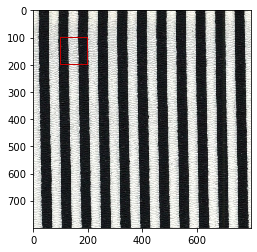

In [15]:
gray_shima = cv2.cvtColor(img_shima, cv2.COLOR_RGB2GRAY)
temp_shima = gray_shima[100:200,100:200]
# breakpoint()
h, w = temp_shima.shape
pt = template_matching_ssd(gray_shima, temp_shima)

score_shima = pt[2]


cv2.rectangle(img_shima, (pt[0], pt[1]), (pt[0] + w, pt[1] + h), (0, 0, 200), 3)
mplot(img_shima)

In [16]:
score_shima


array([[1090262., 1064469., 1053971., ..., 1052502., 1050683., 1085102.],
       [1085052., 1056269., 1051855., ..., 1045920., 1059136., 1060479.],
       [1070460., 1064385., 1054336., ..., 1045289., 1056347., 1065685.],
       ...,
       [1137259., 1160728., 1143096., ...,  889649.,  903062.,  923058.],
       [1142855., 1155235., 1154914., ...,  870193.,  895422.,  908106.],
       [1152663., 1149294., 1153562., ...,  879226.,  882214.,  897118.]])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


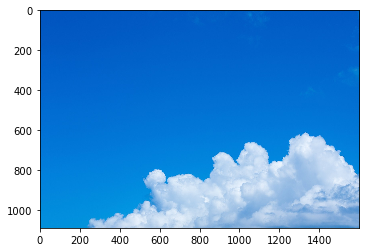

In [17]:
sky_url = "https://www.pakutaso.com/shared/img/thumb/140726199461_TP_V.jpg"
img_sky = cv2.imdecode(np.fromstring(urllib.request.urlopen(sky_url).read(), np.uint8), cv2.IMREAD_COLOR)
mplot(img_sky)

In [ ]:
gray_sky = cv2.cvtColor(img_sky, cv2.COLOR_RGB2GRAY)
temp_sky = gray_sky[100:200,100:200]
# breakpoint()
h, w = temp_shima.shape
pt_sky = template_matching_ssd(gray_sky, temp_sky)

score_sky = pt[2]

cv2.rectangle(img_sky, (pt[0], pt[1]), (pt[0] + w, pt[1] + h), (0, 0, 200), 3)
mplot(img_sky)

dx: 0 dy: 0
dx: 1 dy: 0
dx: 2 dy: 0
dx: 3 dy: 0
dx: 4 dy: 0
dx: 5 dy: 0
dx: 6 dy: 0
dx: 7 dy: 0
dx: 8 dy: 0
dx: 9 dy: 0
dx: 10 dy: 0
dx: 11 dy: 0
dx: 12 dy: 0
dx: 13 dy: 0
dx: 14 dy: 0
dx: 15 dy: 0
dx: 16 dy: 0
dx: 17 dy: 0
dx: 18 dy: 0
dx: 19 dy: 0
dx: 20 dy: 0
dx: 21 dy: 0
dx: 22 dy: 0
dx: 23 dy: 0
dx: 24 dy: 0
dx: 25 dy: 0
dx: 26 dy: 0
dx: 27 dy: 0
dx: 28 dy: 0
dx: 29 dy: 0
dx: 30 dy: 0
dx: 31 dy: 0
dx: 32 dy: 0
dx: 33 dy: 0
dx: 34 dy: 0
dx: 35 dy: 0
dx: 36 dy: 0
dx: 37 dy: 0
dx: 38 dy: 0
dx: 39 dy: 0
dx: 40 dy: 0
dx: 41 dy: 0
dx: 42 dy: 0
dx: 43 dy: 0
dx: 44 dy: 0
dx: 45 dy: 0
dx: 46 dy: 0
dx: 47 dy: 0
dx: 48 dy: 0
dx: 49 dy: 0
dx: 50 dy: 0
dx: 51 dy: 0
dx: 52 dy: 0
dx: 53 dy: 0
dx: 54 dy: 0
dx: 55 dy: 0
dx: 56 dy: 0
dx: 57 dy: 0
dx: 58 dy: 0
dx: 59 dy: 0
dx: 60 dy: 0
dx: 61 dy: 0
dx: 62 dy: 0
dx: 63 dy: 0
dx: 64 dy: 0
dx: 65 dy: 0
dx: 66 dy: 0
dx: 67 dy: 0
dx: 68 dy: 0
dx: 69 dy: 0
dx: 70 dy: 0
dx: 71 dy: 0
dx: 72 dy: 0
dx: 73 dy: 0
dx: 74 dy: 0
dx: 75 dy: 0
dx: 76 dy: 0
dx: 77 dy

dx: 612 dy: 0
dx: 613 dy: 0
dx: 614 dy: 0
dx: 615 dy: 0
dx: 616 dy: 0
dx: 617 dy: 0
dx: 618 dy: 0
dx: 619 dy: 0
dx: 620 dy: 0
dx: 621 dy: 0
dx: 622 dy: 0
dx: 623 dy: 0
dx: 624 dy: 0
dx: 625 dy: 0
dx: 626 dy: 0
dx: 627 dy: 0
dx: 628 dy: 0
dx: 629 dy: 0
dx: 630 dy: 0
dx: 631 dy: 0
dx: 632 dy: 0
dx: 633 dy: 0
dx: 634 dy: 0
dx: 635 dy: 0
dx: 636 dy: 0
dx: 637 dy: 0
dx: 638 dy: 0
dx: 639 dy: 0
dx: 640 dy: 0
dx: 641 dy: 0
dx: 642 dy: 0
dx: 643 dy: 0
dx: 644 dy: 0
dx: 645 dy: 0
dx: 646 dy: 0
dx: 647 dy: 0
dx: 648 dy: 0
dx: 649 dy: 0
dx: 650 dy: 0
dx: 651 dy: 0
dx: 652 dy: 0
dx: 653 dy: 0
dx: 654 dy: 0
dx: 655 dy: 0
dx: 656 dy: 0
dx: 657 dy: 0
dx: 658 dy: 0
dx: 659 dy: 0
dx: 660 dy: 0
dx: 661 dy: 0
dx: 662 dy: 0
dx: 663 dy: 0
dx: 664 dy: 0
dx: 665 dy: 0
dx: 666 dy: 0
dx: 667 dy: 0
dx: 668 dy: 0
dx: 669 dy: 0
dx: 670 dy: 0
dx: 671 dy: 0
dx: 672 dy: 0
dx: 673 dy: 0
dx: 674 dy: 0
dx: 675 dy: 0
dx: 676 dy: 0
dx: 677 dy: 0
dx: 678 dy: 0
dx: 679 dy: 0
dx: 680 dy: 0
dx: 681 dy: 0
dx: 682 dy: 0
dx: 68

dx: 1206 dy: 0
dx: 1207 dy: 0
dx: 1208 dy: 0
dx: 1209 dy: 0
dx: 1210 dy: 0
dx: 1211 dy: 0
dx: 1212 dy: 0
dx: 1213 dy: 0
dx: 1214 dy: 0
dx: 1215 dy: 0
dx: 1216 dy: 0
dx: 1217 dy: 0
dx: 1218 dy: 0
dx: 1219 dy: 0
dx: 1220 dy: 0
dx: 1221 dy: 0
dx: 1222 dy: 0
dx: 1223 dy: 0
dx: 1224 dy: 0
dx: 1225 dy: 0
dx: 1226 dy: 0
dx: 1227 dy: 0
dx: 1228 dy: 0
dx: 1229 dy: 0
dx: 1230 dy: 0
dx: 1231 dy: 0
dx: 1232 dy: 0
dx: 1233 dy: 0
dx: 1234 dy: 0
dx: 1235 dy: 0
dx: 1236 dy: 0
dx: 1237 dy: 0
dx: 1238 dy: 0
dx: 1239 dy: 0
dx: 1240 dy: 0
dx: 1241 dy: 0
dx: 1242 dy: 0
dx: 1243 dy: 0
dx: 1244 dy: 0
dx: 1245 dy: 0
dx: 1246 dy: 0
dx: 1247 dy: 0
dx: 1248 dy: 0
dx: 1249 dy: 0
dx: 1250 dy: 0
dx: 1251 dy: 0
dx: 1252 dy: 0
dx: 1253 dy: 0
dx: 1254 dy: 0
dx: 1255 dy: 0
dx: 1256 dy: 0
dx: 1257 dy: 0
dx: 1258 dy: 0
dx: 1259 dy: 0
dx: 1260 dy: 0
dx: 1261 dy: 0
dx: 1262 dy: 0
dx: 1263 dy: 0
dx: 1264 dy: 0
dx: 1265 dy: 0
dx: 1266 dy: 0
dx: 1267 dy: 0
dx: 1268 dy: 0
dx: 1269 dy: 0
dx: 1270 dy: 0
dx: 1271 dy: 0
dx: 1272 d

dx: 286 dy: 10
dx: 287 dy: 10
dx: 288 dy: 10
dx: 289 dy: 10
dx: 290 dy: 10
dx: 291 dy: 10
dx: 292 dy: 10
dx: 293 dy: 10
dx: 294 dy: 10
dx: 295 dy: 10
dx: 296 dy: 10
dx: 297 dy: 10
dx: 298 dy: 10
dx: 299 dy: 10
dx: 300 dy: 10
dx: 301 dy: 10
dx: 302 dy: 10
dx: 303 dy: 10
dx: 304 dy: 10
dx: 305 dy: 10
dx: 306 dy: 10
dx: 307 dy: 10
dx: 308 dy: 10
dx: 309 dy: 10
dx: 310 dy: 10
dx: 311 dy: 10
dx: 312 dy: 10
dx: 313 dy: 10
dx: 314 dy: 10
dx: 315 dy: 10
dx: 316 dy: 10
dx: 317 dy: 10
dx: 318 dy: 10
dx: 319 dy: 10
dx: 320 dy: 10
dx: 321 dy: 10
dx: 322 dy: 10
dx: 323 dy: 10
dx: 324 dy: 10
dx: 325 dy: 10
dx: 326 dy: 10
dx: 327 dy: 10
dx: 328 dy: 10
dx: 329 dy: 10
dx: 330 dy: 10
dx: 331 dy: 10
dx: 332 dy: 10
dx: 333 dy: 10
dx: 334 dy: 10
dx: 335 dy: 10
dx: 336 dy: 10
dx: 337 dy: 10
dx: 338 dy: 10
dx: 339 dy: 10
dx: 340 dy: 10
dx: 341 dy: 10
dx: 342 dy: 10
dx: 343 dy: 10
dx: 344 dy: 10
dx: 345 dy: 10
dx: 346 dy: 10
dx: 347 dy: 10
dx: 348 dy: 10
dx: 349 dy: 10
dx: 350 dy: 10
dx: 351 dy: 10
dx: 352 dy

dx: 879 dy: 10
dx: 880 dy: 10
dx: 881 dy: 10
dx: 882 dy: 10
dx: 883 dy: 10
dx: 884 dy: 10
dx: 885 dy: 10
dx: 886 dy: 10
dx: 887 dy: 10
dx: 888 dy: 10
dx: 889 dy: 10
dx: 890 dy: 10
dx: 891 dy: 10
dx: 892 dy: 10
dx: 893 dy: 10
dx: 894 dy: 10
dx: 895 dy: 10
dx: 896 dy: 10
dx: 897 dy: 10
dx: 898 dy: 10
dx: 899 dy: 10
dx: 900 dy: 10
dx: 901 dy: 10
dx: 902 dy: 10
dx: 903 dy: 10
dx: 904 dy: 10
dx: 905 dy: 10
dx: 906 dy: 10
dx: 907 dy: 10
dx: 908 dy: 10
dx: 909 dy: 10
dx: 910 dy: 10
dx: 911 dy: 10
dx: 912 dy: 10
dx: 913 dy: 10
dx: 914 dy: 10
dx: 915 dy: 10
dx: 916 dy: 10
dx: 917 dy: 10
dx: 918 dy: 10
dx: 919 dy: 10
dx: 920 dy: 10
dx: 921 dy: 10
dx: 922 dy: 10
dx: 923 dy: 10
dx: 924 dy: 10
dx: 925 dy: 10
dx: 926 dy: 10
dx: 927 dy: 10
dx: 928 dy: 10
dx: 929 dy: 10
dx: 930 dy: 10
dx: 931 dy: 10
dx: 932 dy: 10
dx: 933 dy: 10
dx: 934 dy: 10
dx: 935 dy: 10
dx: 936 dy: 10
dx: 937 dy: 10
dx: 938 dy: 10
dx: 939 dy: 10
dx: 940 dy: 10
dx: 941 dy: 10
dx: 942 dy: 10
dx: 943 dy: 10
dx: 944 dy: 10
dx: 945 dy

dx: 1458 dy: 10
dx: 1459 dy: 10
dx: 1460 dy: 10
dx: 1461 dy: 10
dx: 1462 dy: 10
dx: 1463 dy: 10
dx: 1464 dy: 10
dx: 1465 dy: 10
dx: 1466 dy: 10
dx: 1467 dy: 10
dx: 1468 dy: 10
dx: 1469 dy: 10
dx: 1470 dy: 10
dx: 1471 dy: 10
dx: 1472 dy: 10
dx: 1473 dy: 10
dx: 1474 dy: 10
dx: 1475 dy: 10
dx: 1476 dy: 10
dx: 1477 dy: 10
dx: 1478 dy: 10
dx: 1479 dy: 10
dx: 1480 dy: 10
dx: 1481 dy: 10
dx: 1482 dy: 10
dx: 1483 dy: 10
dx: 1484 dy: 10
dx: 1485 dy: 10
dx: 1486 dy: 10
dx: 1487 dy: 10
dx: 1488 dy: 10
dx: 1489 dy: 10
dx: 1490 dy: 10
dx: 1491 dy: 10
dx: 1492 dy: 10
dx: 1493 dy: 10
dx: 1494 dy: 10
dx: 1495 dy: 10
dx: 1496 dy: 10
dx: 1497 dy: 10
dx: 1498 dy: 10
dx: 1499 dy: 10
dx: 0 dy: 20
dx: 1 dy: 20
dx: 2 dy: 20
dx: 3 dy: 20
dx: 4 dy: 20
dx: 5 dy: 20
dx: 6 dy: 20
dx: 7 dy: 20
dx: 8 dy: 20
dx: 9 dy: 20
dx: 10 dy: 20
dx: 11 dy: 20
dx: 12 dy: 20
dx: 13 dy: 20
dx: 14 dy: 20
dx: 15 dy: 20
dx: 16 dy: 20
dx: 17 dy: 20
dx: 18 dy: 20
dx: 19 dy: 20
dx: 20 dy: 20
dx: 21 dy: 20
dx: 22 dy: 20
dx: 23 dy: 20
dx

dx: 537 dy: 20
dx: 538 dy: 20
dx: 539 dy: 20
dx: 540 dy: 20
dx: 541 dy: 20
dx: 542 dy: 20
dx: 543 dy: 20
dx: 544 dy: 20
dx: 545 dy: 20
dx: 546 dy: 20
dx: 547 dy: 20
dx: 548 dy: 20
dx: 549 dy: 20
dx: 550 dy: 20
dx: 551 dy: 20
dx: 552 dy: 20
dx: 553 dy: 20
dx: 554 dy: 20
dx: 555 dy: 20
dx: 556 dy: 20
dx: 557 dy: 20
dx: 558 dy: 20
dx: 559 dy: 20
dx: 560 dy: 20
dx: 561 dy: 20
dx: 562 dy: 20
dx: 563 dy: 20
dx: 564 dy: 20
dx: 565 dy: 20
dx: 566 dy: 20
dx: 567 dy: 20
dx: 568 dy: 20
dx: 569 dy: 20
dx: 570 dy: 20
dx: 571 dy: 20
dx: 572 dy: 20
dx: 573 dy: 20
dx: 574 dy: 20
dx: 575 dy: 20
dx: 576 dy: 20
dx: 577 dy: 20
dx: 578 dy: 20
dx: 579 dy: 20
dx: 580 dy: 20
dx: 581 dy: 20
dx: 582 dy: 20
dx: 583 dy: 20
dx: 584 dy: 20
dx: 585 dy: 20
dx: 586 dy: 20
dx: 587 dy: 20
dx: 588 dy: 20
dx: 589 dy: 20
dx: 590 dy: 20
dx: 591 dy: 20
dx: 592 dy: 20
dx: 593 dy: 20
dx: 594 dy: 20
dx: 595 dy: 20
dx: 596 dy: 20
dx: 597 dy: 20
dx: 598 dy: 20
dx: 599 dy: 20
dx: 600 dy: 20
dx: 601 dy: 20
dx: 602 dy: 20
dx: 603 dy

dx: 1082 dy: 20
dx: 1083 dy: 20
dx: 1084 dy: 20
dx: 1085 dy: 20
dx: 1086 dy: 20
dx: 1087 dy: 20
dx: 1088 dy: 20
dx: 1089 dy: 20
dx: 1090 dy: 20
dx: 1091 dy: 20
dx: 1092 dy: 20
dx: 1093 dy: 20
dx: 1094 dy: 20
dx: 1095 dy: 20
dx: 1096 dy: 20
dx: 1097 dy: 20
dx: 1098 dy: 20
dx: 1099 dy: 20
dx: 1100 dy: 20
dx: 1101 dy: 20
dx: 1102 dy: 20
dx: 1103 dy: 20
dx: 1104 dy: 20
dx: 1105 dy: 20
dx: 1106 dy: 20
dx: 1107 dy: 20
dx: 1108 dy: 20
dx: 1109 dy: 20
dx: 1110 dy: 20
dx: 1111 dy: 20
dx: 1112 dy: 20
dx: 1113 dy: 20
dx: 1114 dy: 20
dx: 1115 dy: 20
dx: 1116 dy: 20
dx: 1117 dy: 20
dx: 1118 dy: 20
dx: 1119 dy: 20
dx: 1120 dy: 20
dx: 1121 dy: 20
dx: 1122 dy: 20
dx: 1123 dy: 20
dx: 1124 dy: 20
dx: 1125 dy: 20
dx: 1126 dy: 20
dx: 1127 dy: 20
dx: 1128 dy: 20
dx: 1129 dy: 20
dx: 1130 dy: 20
dx: 1131 dy: 20
dx: 1132 dy: 20
dx: 1133 dy: 20
dx: 1134 dy: 20
dx: 1135 dy: 20
dx: 1136 dy: 20
dx: 1137 dy: 20
dx: 1138 dy: 20
dx: 1139 dy: 20
dx: 1140 dy: 20
dx: 1141 dy: 20
dx: 1142 dy: 20
dx: 1143 dy: 20
dx: 1144

dx: 190 dy: 30
dx: 191 dy: 30
dx: 192 dy: 30
dx: 193 dy: 30
dx: 194 dy: 30
dx: 195 dy: 30
dx: 196 dy: 30
dx: 197 dy: 30
dx: 198 dy: 30
dx: 199 dy: 30
dx: 200 dy: 30
dx: 201 dy: 30
dx: 202 dy: 30
dx: 203 dy: 30
dx: 204 dy: 30
dx: 205 dy: 30
dx: 206 dy: 30
dx: 207 dy: 30
dx: 208 dy: 30
dx: 209 dy: 30
dx: 210 dy: 30
dx: 211 dy: 30
dx: 212 dy: 30
dx: 213 dy: 30
dx: 214 dy: 30
dx: 215 dy: 30
dx: 216 dy: 30
dx: 217 dy: 30
dx: 218 dy: 30
dx: 219 dy: 30
dx: 220 dy: 30
dx: 221 dy: 30
dx: 222 dy: 30
dx: 223 dy: 30
dx: 224 dy: 30
dx: 225 dy: 30
dx: 226 dy: 30
dx: 227 dy: 30
dx: 228 dy: 30
dx: 229 dy: 30
dx: 230 dy: 30
dx: 231 dy: 30
dx: 232 dy: 30
dx: 233 dy: 30
dx: 234 dy: 30
dx: 235 dy: 30
dx: 236 dy: 30
dx: 237 dy: 30
dx: 238 dy: 30
dx: 239 dy: 30
dx: 240 dy: 30
dx: 241 dy: 30
dx: 242 dy: 30
dx: 243 dy: 30
dx: 244 dy: 30
dx: 245 dy: 30
dx: 246 dy: 30
dx: 247 dy: 30
dx: 248 dy: 30
dx: 249 dy: 30
dx: 250 dy: 30
dx: 251 dy: 30
dx: 252 dy: 30
dx: 253 dy: 30
dx: 254 dy: 30
dx: 255 dy: 30
dx: 256 dy

dx: 813 dy: 30
dx: 814 dy: 30
dx: 815 dy: 30
dx: 816 dy: 30
dx: 817 dy: 30
dx: 818 dy: 30
dx: 819 dy: 30
dx: 820 dy: 30
dx: 821 dy: 30
dx: 822 dy: 30
dx: 823 dy: 30
dx: 824 dy: 30
dx: 825 dy: 30
dx: 826 dy: 30
dx: 827 dy: 30
dx: 828 dy: 30
dx: 829 dy: 30
dx: 830 dy: 30
dx: 831 dy: 30
dx: 832 dy: 30
dx: 833 dy: 30
dx: 834 dy: 30
dx: 835 dy: 30
dx: 836 dy: 30
dx: 837 dy: 30
dx: 838 dy: 30
dx: 839 dy: 30
dx: 840 dy: 30
dx: 841 dy: 30
dx: 842 dy: 30
dx: 843 dy: 30
dx: 844 dy: 30
dx: 845 dy: 30
dx: 846 dy: 30
dx: 847 dy: 30
dx: 848 dy: 30
dx: 849 dy: 30
dx: 850 dy: 30
dx: 851 dy: 30
dx: 852 dy: 30
dx: 853 dy: 30
dx: 854 dy: 30
dx: 855 dy: 30
dx: 856 dy: 30
dx: 857 dy: 30
dx: 858 dy: 30
dx: 859 dy: 30
dx: 860 dy: 30
dx: 861 dy: 30
dx: 862 dy: 30
dx: 863 dy: 30
dx: 864 dy: 30
dx: 865 dy: 30
dx: 866 dy: 30
dx: 867 dy: 30
dx: 868 dy: 30
dx: 869 dy: 30
dx: 870 dy: 30
dx: 871 dy: 30
dx: 872 dy: 30
dx: 873 dy: 30
dx: 874 dy: 30
dx: 875 dy: 30
dx: 876 dy: 30
dx: 877 dy: 30
dx: 878 dy: 30
dx: 879 dy

dx: 1357 dy: 30
dx: 1358 dy: 30
dx: 1359 dy: 30
dx: 1360 dy: 30
dx: 1361 dy: 30
dx: 1362 dy: 30
dx: 1363 dy: 30
dx: 1364 dy: 30
dx: 1365 dy: 30
dx: 1366 dy: 30
dx: 1367 dy: 30
dx: 1368 dy: 30
dx: 1369 dy: 30
dx: 1370 dy: 30
dx: 1371 dy: 30
dx: 1372 dy: 30
dx: 1373 dy: 30
dx: 1374 dy: 30
dx: 1375 dy: 30
dx: 1376 dy: 30
dx: 1377 dy: 30
dx: 1378 dy: 30
dx: 1379 dy: 30
dx: 1380 dy: 30
dx: 1381 dy: 30
dx: 1382 dy: 30
dx: 1383 dy: 30
dx: 1384 dy: 30
dx: 1385 dy: 30
dx: 1386 dy: 30
dx: 1387 dy: 30
dx: 1388 dy: 30
dx: 1389 dy: 30
dx: 1390 dy: 30
dx: 1391 dy: 30
dx: 1392 dy: 30
dx: 1393 dy: 30
dx: 1394 dy: 30
dx: 1395 dy: 30
dx: 1396 dy: 30
dx: 1397 dy: 30
dx: 1398 dy: 30
dx: 1399 dy: 30
dx: 1400 dy: 30
dx: 1401 dy: 30
dx: 1402 dy: 30
dx: 1403 dy: 30
dx: 1404 dy: 30
dx: 1405 dy: 30
dx: 1406 dy: 30
dx: 1407 dy: 30
dx: 1408 dy: 30
dx: 1409 dy: 30
dx: 1410 dy: 30
dx: 1411 dy: 30
dx: 1412 dy: 30
dx: 1413 dy: 30
dx: 1414 dy: 30
dx: 1415 dy: 30
dx: 1416 dy: 30
dx: 1417 dy: 30
dx: 1418 dy: 30
dx: 1419

dx: 430 dy: 40
dx: 431 dy: 40
dx: 432 dy: 40
dx: 433 dy: 40
dx: 434 dy: 40
dx: 435 dy: 40
dx: 436 dy: 40
dx: 437 dy: 40
dx: 438 dy: 40
dx: 439 dy: 40
dx: 440 dy: 40
dx: 441 dy: 40
dx: 442 dy: 40
dx: 443 dy: 40
dx: 444 dy: 40
dx: 445 dy: 40
dx: 446 dy: 40
dx: 447 dy: 40
dx: 448 dy: 40
dx: 449 dy: 40
dx: 450 dy: 40
dx: 451 dy: 40
dx: 452 dy: 40
dx: 453 dy: 40
dx: 454 dy: 40
dx: 455 dy: 40
dx: 456 dy: 40
dx: 457 dy: 40
dx: 458 dy: 40
dx: 459 dy: 40
dx: 460 dy: 40
dx: 461 dy: 40
dx: 462 dy: 40
dx: 463 dy: 40
dx: 464 dy: 40
dx: 465 dy: 40
dx: 466 dy: 40
dx: 467 dy: 40
dx: 468 dy: 40
dx: 469 dy: 40
dx: 470 dy: 40
dx: 471 dy: 40
dx: 472 dy: 40
dx: 473 dy: 40
dx: 474 dy: 40
dx: 475 dy: 40
dx: 476 dy: 40
dx: 477 dy: 40
dx: 478 dy: 40
dx: 479 dy: 40
dx: 480 dy: 40
dx: 481 dy: 40
dx: 482 dy: 40
dx: 483 dy: 40
dx: 484 dy: 40
dx: 485 dy: 40
dx: 486 dy: 40
dx: 487 dy: 40
dx: 488 dy: 40
dx: 489 dy: 40
dx: 490 dy: 40
dx: 491 dy: 40
dx: 492 dy: 40
dx: 493 dy: 40
dx: 494 dy: 40
dx: 495 dy: 40
dx: 496 dy

dx: 1061 dy: 40
dx: 1062 dy: 40
dx: 1063 dy: 40
dx: 1064 dy: 40
dx: 1065 dy: 40
dx: 1066 dy: 40
dx: 1067 dy: 40
dx: 1068 dy: 40
dx: 1069 dy: 40
dx: 1070 dy: 40
dx: 1071 dy: 40
dx: 1072 dy: 40
dx: 1073 dy: 40
dx: 1074 dy: 40
dx: 1075 dy: 40
dx: 1076 dy: 40
dx: 1077 dy: 40
dx: 1078 dy: 40
dx: 1079 dy: 40
dx: 1080 dy: 40
dx: 1081 dy: 40
dx: 1082 dy: 40
dx: 1083 dy: 40
dx: 1084 dy: 40
dx: 1085 dy: 40
dx: 1086 dy: 40
dx: 1087 dy: 40
dx: 1088 dy: 40
dx: 1089 dy: 40
dx: 1090 dy: 40
dx: 1091 dy: 40
dx: 1092 dy: 40
dx: 1093 dy: 40
dx: 1094 dy: 40
dx: 1095 dy: 40
dx: 1096 dy: 40
dx: 1097 dy: 40
dx: 1098 dy: 40
dx: 1099 dy: 40
dx: 1100 dy: 40
dx: 1101 dy: 40
dx: 1102 dy: 40
dx: 1103 dy: 40
dx: 1104 dy: 40
dx: 1105 dy: 40
dx: 1106 dy: 40
dx: 1107 dy: 40
dx: 1108 dy: 40
dx: 1109 dy: 40
dx: 1110 dy: 40
dx: 1111 dy: 40
dx: 1112 dy: 40
dx: 1113 dy: 40
dx: 1114 dy: 40
dx: 1115 dy: 40
dx: 1116 dy: 40
dx: 1117 dy: 40
dx: 1118 dy: 40
dx: 1119 dy: 40
dx: 1120 dy: 40
dx: 1121 dy: 40
dx: 1122 dy: 40
dx: 1123

dx: 101 dy: 50
dx: 102 dy: 50
dx: 103 dy: 50
dx: 104 dy: 50
dx: 105 dy: 50
dx: 106 dy: 50
dx: 107 dy: 50
dx: 108 dy: 50
dx: 109 dy: 50
dx: 110 dy: 50
dx: 111 dy: 50
dx: 112 dy: 50
dx: 113 dy: 50
dx: 114 dy: 50
dx: 115 dy: 50
dx: 116 dy: 50
dx: 117 dy: 50
dx: 118 dy: 50
dx: 119 dy: 50
dx: 120 dy: 50
dx: 121 dy: 50
dx: 122 dy: 50
dx: 123 dy: 50
dx: 124 dy: 50
dx: 125 dy: 50
dx: 126 dy: 50
dx: 127 dy: 50
dx: 128 dy: 50
dx: 129 dy: 50
dx: 130 dy: 50
dx: 131 dy: 50
dx: 132 dy: 50
dx: 133 dy: 50
dx: 134 dy: 50
dx: 135 dy: 50
dx: 136 dy: 50
dx: 137 dy: 50
dx: 138 dy: 50
dx: 139 dy: 50
dx: 140 dy: 50
dx: 141 dy: 50
dx: 142 dy: 50
dx: 143 dy: 50
dx: 144 dy: 50
dx: 145 dy: 50
dx: 146 dy: 50
dx: 147 dy: 50
dx: 148 dy: 50
dx: 149 dy: 50
dx: 150 dy: 50
dx: 151 dy: 50
dx: 152 dy: 50
dx: 153 dy: 50
dx: 154 dy: 50
dx: 155 dy: 50
dx: 156 dy: 50
dx: 157 dy: 50
dx: 158 dy: 50
dx: 159 dy: 50
dx: 160 dy: 50
dx: 161 dy: 50
dx: 162 dy: 50
dx: 163 dy: 50
dx: 164 dy: 50
dx: 165 dy: 50
dx: 166 dy: 50
dx: 167 dy

dx: 731 dy: 50
dx: 732 dy: 50
dx: 733 dy: 50
dx: 734 dy: 50
dx: 735 dy: 50
dx: 736 dy: 50
dx: 737 dy: 50
dx: 738 dy: 50
dx: 739 dy: 50
dx: 740 dy: 50
dx: 741 dy: 50
dx: 742 dy: 50
dx: 743 dy: 50
dx: 744 dy: 50
dx: 745 dy: 50
dx: 746 dy: 50
dx: 747 dy: 50
dx: 748 dy: 50
dx: 749 dy: 50
dx: 750 dy: 50
dx: 751 dy: 50
dx: 752 dy: 50
dx: 753 dy: 50
dx: 754 dy: 50
dx: 755 dy: 50
dx: 756 dy: 50
dx: 757 dy: 50
dx: 758 dy: 50
dx: 759 dy: 50
dx: 760 dy: 50
dx: 761 dy: 50
dx: 762 dy: 50
dx: 763 dy: 50
dx: 764 dy: 50
dx: 765 dy: 50
dx: 766 dy: 50
dx: 767 dy: 50
dx: 768 dy: 50
dx: 769 dy: 50
dx: 770 dy: 50
dx: 771 dy: 50
dx: 772 dy: 50
dx: 773 dy: 50
dx: 774 dy: 50
dx: 775 dy: 50
dx: 776 dy: 50
dx: 777 dy: 50
dx: 778 dy: 50
dx: 779 dy: 50
dx: 780 dy: 50
dx: 781 dy: 50
dx: 782 dy: 50
dx: 783 dy: 50
dx: 784 dy: 50
dx: 785 dy: 50
dx: 786 dy: 50
dx: 787 dy: 50
dx: 788 dy: 50
dx: 789 dy: 50
dx: 790 dy: 50
dx: 791 dy: 50
dx: 792 dy: 50
dx: 793 dy: 50
dx: 794 dy: 50
dx: 795 dy: 50
dx: 796 dy: 50
dx: 797 dy

dx: 1261 dy: 50
dx: 1262 dy: 50
dx: 1263 dy: 50
dx: 1264 dy: 50
dx: 1265 dy: 50
dx: 1266 dy: 50
dx: 1267 dy: 50
dx: 1268 dy: 50
dx: 1269 dy: 50
dx: 1270 dy: 50
dx: 1271 dy: 50
dx: 1272 dy: 50
dx: 1273 dy: 50
dx: 1274 dy: 50
dx: 1275 dy: 50
dx: 1276 dy: 50
dx: 1277 dy: 50
dx: 1278 dy: 50
dx: 1279 dy: 50
dx: 1280 dy: 50
dx: 1281 dy: 50
dx: 1282 dy: 50
dx: 1283 dy: 50
dx: 1284 dy: 50
dx: 1285 dy: 50
dx: 1286 dy: 50
dx: 1287 dy: 50
dx: 1288 dy: 50
dx: 1289 dy: 50
dx: 1290 dy: 50
dx: 1291 dy: 50
dx: 1292 dy: 50
dx: 1293 dy: 50
dx: 1294 dy: 50
dx: 1295 dy: 50
dx: 1296 dy: 50
dx: 1297 dy: 50
dx: 1298 dy: 50
dx: 1299 dy: 50
dx: 1300 dy: 50
dx: 1301 dy: 50
dx: 1302 dy: 50
dx: 1303 dy: 50
dx: 1304 dy: 50
dx: 1305 dy: 50
dx: 1306 dy: 50
dx: 1307 dy: 50
dx: 1308 dy: 50
dx: 1309 dy: 50
dx: 1310 dy: 50
dx: 1311 dy: 50
dx: 1312 dy: 50
dx: 1313 dy: 50
dx: 1314 dy: 50
dx: 1315 dy: 50
dx: 1316 dy: 50
dx: 1317 dy: 50
dx: 1318 dy: 50
dx: 1319 dy: 50
dx: 1320 dy: 50
dx: 1321 dy: 50
dx: 1322 dy: 50
dx: 1323

dx: 364 dy: 60
dx: 365 dy: 60
dx: 366 dy: 60
dx: 367 dy: 60
dx: 368 dy: 60
dx: 369 dy: 60
dx: 370 dy: 60
dx: 371 dy: 60
dx: 372 dy: 60
dx: 373 dy: 60
dx: 374 dy: 60
dx: 375 dy: 60
dx: 376 dy: 60
dx: 377 dy: 60
dx: 378 dy: 60
dx: 379 dy: 60
dx: 380 dy: 60
dx: 381 dy: 60
dx: 382 dy: 60
dx: 383 dy: 60
dx: 384 dy: 60
dx: 385 dy: 60
dx: 386 dy: 60
dx: 387 dy: 60
dx: 388 dy: 60
dx: 389 dy: 60
dx: 390 dy: 60
dx: 391 dy: 60
dx: 392 dy: 60
dx: 393 dy: 60
dx: 394 dy: 60
dx: 395 dy: 60
dx: 396 dy: 60
dx: 397 dy: 60
dx: 398 dy: 60
dx: 399 dy: 60
dx: 400 dy: 60
dx: 401 dy: 60
dx: 402 dy: 60
dx: 403 dy: 60
dx: 404 dy: 60
dx: 405 dy: 60
dx: 406 dy: 60
dx: 407 dy: 60
dx: 408 dy: 60
dx: 409 dy: 60
dx: 410 dy: 60
dx: 411 dy: 60
dx: 412 dy: 60
dx: 413 dy: 60
dx: 414 dy: 60
dx: 415 dy: 60
dx: 416 dy: 60
dx: 417 dy: 60
dx: 418 dy: 60
dx: 419 dy: 60
dx: 420 dy: 60
dx: 421 dy: 60
dx: 422 dy: 60
dx: 423 dy: 60
dx: 424 dy: 60
dx: 425 dy: 60
dx: 426 dy: 60
dx: 427 dy: 60
dx: 428 dy: 60
dx: 429 dy: 60
dx: 430 dy

dx: 974 dy: 60
dx: 975 dy: 60
dx: 976 dy: 60
dx: 977 dy: 60
dx: 978 dy: 60
dx: 979 dy: 60
dx: 980 dy: 60
dx: 981 dy: 60
dx: 982 dy: 60
dx: 983 dy: 60
dx: 984 dy: 60
dx: 985 dy: 60
dx: 986 dy: 60
dx: 987 dy: 60
dx: 988 dy: 60
dx: 989 dy: 60
dx: 990 dy: 60
dx: 991 dy: 60
dx: 992 dy: 60
dx: 993 dy: 60
dx: 994 dy: 60
dx: 995 dy: 60
dx: 996 dy: 60
dx: 997 dy: 60
dx: 998 dy: 60
dx: 999 dy: 60
dx: 1000 dy: 60
dx: 1001 dy: 60
dx: 1002 dy: 60
dx: 1003 dy: 60
dx: 1004 dy: 60
dx: 1005 dy: 60
dx: 1006 dy: 60
dx: 1007 dy: 60
dx: 1008 dy: 60
dx: 1009 dy: 60
dx: 1010 dy: 60
dx: 1011 dy: 60
dx: 1012 dy: 60
dx: 1013 dy: 60
dx: 1014 dy: 60
dx: 1015 dy: 60
dx: 1016 dy: 60
dx: 1017 dy: 60
dx: 1018 dy: 60
dx: 1019 dy: 60
dx: 1020 dy: 60
dx: 1021 dy: 60
dx: 1022 dy: 60
dx: 1023 dy: 60
dx: 1024 dy: 60
dx: 1025 dy: 60
dx: 1026 dy: 60
dx: 1027 dy: 60
dx: 1028 dy: 60
dx: 1029 dy: 60
dx: 1030 dy: 60
dx: 1031 dy: 60
dx: 1032 dy: 60
dx: 1033 dy: 60
dx: 1034 dy: 60
dx: 1035 dy: 60
dx: 1036 dy: 60
dx: 1037 dy: 60
dx

dx: 0 dy: 70
dx: 1 dy: 70
dx: 2 dy: 70
dx: 3 dy: 70
dx: 4 dy: 70
dx: 5 dy: 70
dx: 6 dy: 70
dx: 7 dy: 70
dx: 8 dy: 70
dx: 9 dy: 70
dx: 10 dy: 70
dx: 11 dy: 70
dx: 12 dy: 70
dx: 13 dy: 70
dx: 14 dy: 70
dx: 15 dy: 70
dx: 16 dy: 70
dx: 17 dy: 70
dx: 18 dy: 70
dx: 19 dy: 70
dx: 20 dy: 70
dx: 21 dy: 70
dx: 22 dy: 70
dx: 23 dy: 70
dx: 24 dy: 70
dx: 25 dy: 70
dx: 26 dy: 70
dx: 27 dy: 70
dx: 28 dy: 70
dx: 29 dy: 70
dx: 30 dy: 70
dx: 31 dy: 70
dx: 32 dy: 70
dx: 33 dy: 70
dx: 34 dy: 70
dx: 35 dy: 70
dx: 36 dy: 70
dx: 37 dy: 70
dx: 38 dy: 70
dx: 39 dy: 70
dx: 40 dy: 70
dx: 41 dy: 70
dx: 42 dy: 70
dx: 43 dy: 70
dx: 44 dy: 70
dx: 45 dy: 70
dx: 46 dy: 70
dx: 47 dy: 70
dx: 48 dy: 70
dx: 49 dy: 70
dx: 50 dy: 70
dx: 51 dy: 70
dx: 52 dy: 70
dx: 53 dy: 70
dx: 54 dy: 70
dx: 55 dy: 70
dx: 56 dy: 70
dx: 57 dy: 70
dx: 58 dy: 70
dx: 59 dy: 70
dx: 60 dy: 70
dx: 61 dy: 70
dx: 62 dy: 70
dx: 63 dy: 70
dx: 64 dy: 70
dx: 65 dy: 70
dx: 66 dy: 70
dx: 67 dy: 70
dx: 68 dy: 70
dx: 69 dy: 70
dx: 70 dy: 70
dx: 71 dy: 70
dx

dx: 626 dy: 70
dx: 627 dy: 70
dx: 628 dy: 70
dx: 629 dy: 70
dx: 630 dy: 70
dx: 631 dy: 70
dx: 632 dy: 70
dx: 633 dy: 70
dx: 634 dy: 70
dx: 635 dy: 70
dx: 636 dy: 70
dx: 637 dy: 70
dx: 638 dy: 70
dx: 639 dy: 70
dx: 640 dy: 70
dx: 641 dy: 70
dx: 642 dy: 70
dx: 643 dy: 70
dx: 644 dy: 70
dx: 645 dy: 70
dx: 646 dy: 70
dx: 647 dy: 70
dx: 648 dy: 70
dx: 649 dy: 70
dx: 650 dy: 70
dx: 651 dy: 70
dx: 652 dy: 70
dx: 653 dy: 70
dx: 654 dy: 70
dx: 655 dy: 70
dx: 656 dy: 70
dx: 657 dy: 70
dx: 658 dy: 70
dx: 659 dy: 70
dx: 660 dy: 70
dx: 661 dy: 70
dx: 662 dy: 70
dx: 663 dy: 70
dx: 664 dy: 70
dx: 665 dy: 70
dx: 666 dy: 70
dx: 667 dy: 70
dx: 668 dy: 70
dx: 669 dy: 70
dx: 670 dy: 70
dx: 671 dy: 70
dx: 672 dy: 70
dx: 673 dy: 70
dx: 674 dy: 70
dx: 675 dy: 70
dx: 676 dy: 70
dx: 677 dy: 70
dx: 678 dy: 70
dx: 679 dy: 70
dx: 680 dy: 70
dx: 681 dy: 70
dx: 682 dy: 70
dx: 683 dy: 70
dx: 684 dy: 70
dx: 685 dy: 70
dx: 686 dy: 70
dx: 687 dy: 70
dx: 688 dy: 70
dx: 689 dy: 70
dx: 690 dy: 70
dx: 691 dy: 70
dx: 692 dy

dx: 1167 dy: 70
dx: 1168 dy: 70
dx: 1169 dy: 70
dx: 1170 dy: 70
dx: 1171 dy: 70
dx: 1172 dy: 70
dx: 1173 dy: 70
dx: 1174 dy: 70
dx: 1175 dy: 70
dx: 1176 dy: 70
dx: 1177 dy: 70
dx: 1178 dy: 70
dx: 1179 dy: 70
dx: 1180 dy: 70
dx: 1181 dy: 70
dx: 1182 dy: 70
dx: 1183 dy: 70
dx: 1184 dy: 70
dx: 1185 dy: 70
dx: 1186 dy: 70
dx: 1187 dy: 70
dx: 1188 dy: 70
dx: 1189 dy: 70
dx: 1190 dy: 70
dx: 1191 dy: 70
dx: 1192 dy: 70
dx: 1193 dy: 70
dx: 1194 dy: 70
dx: 1195 dy: 70
dx: 1196 dy: 70
dx: 1197 dy: 70
dx: 1198 dy: 70
dx: 1199 dy: 70
dx: 1200 dy: 70
dx: 1201 dy: 70
dx: 1202 dy: 70
dx: 1203 dy: 70
dx: 1204 dy: 70
dx: 1205 dy: 70
dx: 1206 dy: 70
dx: 1207 dy: 70
dx: 1208 dy: 70
dx: 1209 dy: 70
dx: 1210 dy: 70
dx: 1211 dy: 70
dx: 1212 dy: 70
dx: 1213 dy: 70
dx: 1214 dy: 70
dx: 1215 dy: 70
dx: 1216 dy: 70
dx: 1217 dy: 70
dx: 1218 dy: 70
dx: 1219 dy: 70
dx: 1220 dy: 70
dx: 1221 dy: 70
dx: 1222 dy: 70
dx: 1223 dy: 70
dx: 1224 dy: 70
dx: 1225 dy: 70
dx: 1226 dy: 70
dx: 1227 dy: 70
dx: 1228 dy: 70
dx: 1229

dx: 274 dy: 80
dx: 275 dy: 80
dx: 276 dy: 80
dx: 277 dy: 80
dx: 278 dy: 80
dx: 279 dy: 80
dx: 280 dy: 80
dx: 281 dy: 80
dx: 282 dy: 80
dx: 283 dy: 80
dx: 284 dy: 80
dx: 285 dy: 80
dx: 286 dy: 80
dx: 287 dy: 80
dx: 288 dy: 80
dx: 289 dy: 80
dx: 290 dy: 80
dx: 291 dy: 80
dx: 292 dy: 80
dx: 293 dy: 80
dx: 294 dy: 80
dx: 295 dy: 80
dx: 296 dy: 80
dx: 297 dy: 80
dx: 298 dy: 80
dx: 299 dy: 80
dx: 300 dy: 80
dx: 301 dy: 80
dx: 302 dy: 80
dx: 303 dy: 80
dx: 304 dy: 80
dx: 305 dy: 80
dx: 306 dy: 80
dx: 307 dy: 80
dx: 308 dy: 80
dx: 309 dy: 80
dx: 310 dy: 80
dx: 311 dy: 80
dx: 312 dy: 80
dx: 313 dy: 80
dx: 314 dy: 80
dx: 315 dy: 80
dx: 316 dy: 80
dx: 317 dy: 80
dx: 318 dy: 80
dx: 319 dy: 80
dx: 320 dy: 80
dx: 321 dy: 80
dx: 322 dy: 80
dx: 323 dy: 80
dx: 324 dy: 80
dx: 325 dy: 80
dx: 326 dy: 80
dx: 327 dy: 80
dx: 328 dy: 80
dx: 329 dy: 80
dx: 330 dy: 80
dx: 331 dy: 80
dx: 332 dy: 80
dx: 333 dy: 80
dx: 334 dy: 80
dx: 335 dy: 80
dx: 336 dy: 80
dx: 337 dy: 80
dx: 338 dy: 80
dx: 339 dy: 80
dx: 340 dy

dx: 902 dy: 80
dx: 903 dy: 80
dx: 904 dy: 80
dx: 905 dy: 80
dx: 906 dy: 80
dx: 907 dy: 80
dx: 908 dy: 80
dx: 909 dy: 80
dx: 910 dy: 80
dx: 911 dy: 80
dx: 912 dy: 80
dx: 913 dy: 80
dx: 914 dy: 80
dx: 915 dy: 80
dx: 916 dy: 80
dx: 917 dy: 80
dx: 918 dy: 80
dx: 919 dy: 80
dx: 920 dy: 80
dx: 921 dy: 80
dx: 922 dy: 80
dx: 923 dy: 80
dx: 924 dy: 80
dx: 925 dy: 80
dx: 926 dy: 80
dx: 927 dy: 80
dx: 928 dy: 80
dx: 929 dy: 80
dx: 930 dy: 80
dx: 931 dy: 80
dx: 932 dy: 80
dx: 933 dy: 80
dx: 934 dy: 80
dx: 935 dy: 80
dx: 936 dy: 80
dx: 937 dy: 80
dx: 938 dy: 80
dx: 939 dy: 80
dx: 940 dy: 80
dx: 941 dy: 80
dx: 942 dy: 80
dx: 943 dy: 80
dx: 944 dy: 80
dx: 945 dy: 80
dx: 946 dy: 80
dx: 947 dy: 80
dx: 948 dy: 80
dx: 949 dy: 80
dx: 950 dy: 80
dx: 951 dy: 80
dx: 952 dy: 80
dx: 953 dy: 80
dx: 954 dy: 80
dx: 955 dy: 80
dx: 956 dy: 80
dx: 957 dy: 80
dx: 958 dy: 80
dx: 959 dy: 80
dx: 960 dy: 80
dx: 961 dy: 80
dx: 962 dy: 80
dx: 963 dy: 80
dx: 964 dy: 80
dx: 965 dy: 80
dx: 966 dy: 80
dx: 967 dy: 80
dx: 968 dy

dx: 1425 dy: 80
dx: 1426 dy: 80
dx: 1427 dy: 80
dx: 1428 dy: 80
dx: 1429 dy: 80
dx: 1430 dy: 80
dx: 1431 dy: 80
dx: 1432 dy: 80
dx: 1433 dy: 80
dx: 1434 dy: 80
dx: 1435 dy: 80
dx: 1436 dy: 80
dx: 1437 dy: 80
dx: 1438 dy: 80
dx: 1439 dy: 80
dx: 1440 dy: 80
dx: 1441 dy: 80
dx: 1442 dy: 80
dx: 1443 dy: 80
dx: 1444 dy: 80
dx: 1445 dy: 80
dx: 1446 dy: 80
dx: 1447 dy: 80
dx: 1448 dy: 80
dx: 1449 dy: 80
dx: 1450 dy: 80
dx: 1451 dy: 80
dx: 1452 dy: 80
dx: 1453 dy: 80
dx: 1454 dy: 80
dx: 1455 dy: 80
dx: 1456 dy: 80
dx: 1457 dy: 80
dx: 1458 dy: 80
dx: 1459 dy: 80
dx: 1460 dy: 80
dx: 1461 dy: 80
dx: 1462 dy: 80
dx: 1463 dy: 80
dx: 1464 dy: 80
dx: 1465 dy: 80
dx: 1466 dy: 80
dx: 1467 dy: 80
dx: 1468 dy: 80
dx: 1469 dy: 80
dx: 1470 dy: 80
dx: 1471 dy: 80
dx: 1472 dy: 80
dx: 1473 dy: 80
dx: 1474 dy: 80
dx: 1475 dy: 80
dx: 1476 dy: 80
dx: 1477 dy: 80
dx: 1478 dy: 80
dx: 1479 dy: 80
dx: 1480 dy: 80
dx: 1481 dy: 80
dx: 1482 dy: 80
dx: 1483 dy: 80
dx: 1484 dy: 80
dx: 1485 dy: 80
dx: 1486 dy: 80
dx: 1487

dx: 521 dy: 90
dx: 522 dy: 90
dx: 523 dy: 90
dx: 524 dy: 90
dx: 525 dy: 90
dx: 526 dy: 90
dx: 527 dy: 90
dx: 528 dy: 90
dx: 529 dy: 90
dx: 530 dy: 90
dx: 531 dy: 90
dx: 532 dy: 90
dx: 533 dy: 90
dx: 534 dy: 90
dx: 535 dy: 90
dx: 536 dy: 90
dx: 537 dy: 90
dx: 538 dy: 90
dx: 539 dy: 90
dx: 540 dy: 90
dx: 541 dy: 90
dx: 542 dy: 90
dx: 543 dy: 90
dx: 544 dy: 90
dx: 545 dy: 90
dx: 546 dy: 90
dx: 547 dy: 90
dx: 548 dy: 90
dx: 549 dy: 90
dx: 550 dy: 90
dx: 551 dy: 90
dx: 552 dy: 90
dx: 553 dy: 90
dx: 554 dy: 90
dx: 555 dy: 90
dx: 556 dy: 90
dx: 557 dy: 90
dx: 558 dy: 90
dx: 559 dy: 90
dx: 560 dy: 90
dx: 561 dy: 90
dx: 562 dy: 90
dx: 563 dy: 90
dx: 564 dy: 90
dx: 565 dy: 90
dx: 566 dy: 90
dx: 567 dy: 90
dx: 568 dy: 90
dx: 569 dy: 90
dx: 570 dy: 90
dx: 571 dy: 90
dx: 572 dy: 90
dx: 573 dy: 90
dx: 574 dy: 90
dx: 575 dy: 90
dx: 576 dy: 90
dx: 577 dy: 90
dx: 578 dy: 90
dx: 579 dy: 90
dx: 580 dy: 90
dx: 581 dy: 90
dx: 582 dy: 90
dx: 583 dy: 90
dx: 584 dy: 90
dx: 585 dy: 90
dx: 586 dy: 90
dx: 587 dy

dx: 1135 dy: 90
dx: 1136 dy: 90
dx: 1137 dy: 90
dx: 1138 dy: 90
dx: 1139 dy: 90
dx: 1140 dy: 90
dx: 1141 dy: 90
dx: 1142 dy: 90
dx: 1143 dy: 90
dx: 1144 dy: 90
dx: 1145 dy: 90
dx: 1146 dy: 90
dx: 1147 dy: 90
dx: 1148 dy: 90
dx: 1149 dy: 90
dx: 1150 dy: 90
dx: 1151 dy: 90
dx: 1152 dy: 90
dx: 1153 dy: 90
dx: 1154 dy: 90
dx: 1155 dy: 90
dx: 1156 dy: 90
dx: 1157 dy: 90
dx: 1158 dy: 90
dx: 1159 dy: 90
dx: 1160 dy: 90
dx: 1161 dy: 90
dx: 1162 dy: 90
dx: 1163 dy: 90
dx: 1164 dy: 90
dx: 1165 dy: 90
dx: 1166 dy: 90
dx: 1167 dy: 90
dx: 1168 dy: 90
dx: 1169 dy: 90
dx: 1170 dy: 90
dx: 1171 dy: 90
dx: 1172 dy: 90
dx: 1173 dy: 90
dx: 1174 dy: 90
dx: 1175 dy: 90
dx: 1176 dy: 90
dx: 1177 dy: 90
dx: 1178 dy: 90
dx: 1179 dy: 90
dx: 1180 dy: 90
dx: 1181 dy: 90
dx: 1182 dy: 90
dx: 1183 dy: 90
dx: 1184 dy: 90
dx: 1185 dy: 90
dx: 1186 dy: 90
dx: 1187 dy: 90
dx: 1188 dy: 90
dx: 1189 dy: 90
dx: 1190 dy: 90
dx: 1191 dy: 90
dx: 1192 dy: 90
dx: 1193 dy: 90
dx: 1194 dy: 90
dx: 1195 dy: 90
dx: 1196 dy: 90
dx: 1197

dx: 189 dy: 100
dx: 190 dy: 100
dx: 191 dy: 100
dx: 192 dy: 100
dx: 193 dy: 100
dx: 194 dy: 100
dx: 195 dy: 100
dx: 196 dy: 100
dx: 197 dy: 100
dx: 198 dy: 100
dx: 199 dy: 100
dx: 200 dy: 100
dx: 201 dy: 100
dx: 202 dy: 100
dx: 203 dy: 100
dx: 204 dy: 100
dx: 205 dy: 100
dx: 206 dy: 100
dx: 207 dy: 100
dx: 208 dy: 100
dx: 209 dy: 100
dx: 210 dy: 100
dx: 211 dy: 100
dx: 212 dy: 100
dx: 213 dy: 100
dx: 214 dy: 100
dx: 215 dy: 100
dx: 216 dy: 100
dx: 217 dy: 100
dx: 218 dy: 100
dx: 219 dy: 100
dx: 220 dy: 100
dx: 221 dy: 100
dx: 222 dy: 100
dx: 223 dy: 100
dx: 224 dy: 100
dx: 225 dy: 100
dx: 226 dy: 100
dx: 227 dy: 100
dx: 228 dy: 100
dx: 229 dy: 100
dx: 230 dy: 100
dx: 231 dy: 100
dx: 232 dy: 100
dx: 233 dy: 100
dx: 234 dy: 100
dx: 235 dy: 100
dx: 236 dy: 100
dx: 237 dy: 100
dx: 238 dy: 100
dx: 239 dy: 100
dx: 240 dy: 100
dx: 241 dy: 100
dx: 242 dy: 100
dx: 243 dy: 100
dx: 244 dy: 100
dx: 245 dy: 100
dx: 246 dy: 100
dx: 247 dy: 100
dx: 248 dy: 100
dx: 249 dy: 100
dx: 250 dy: 100
dx: 251 

dx: 732 dy: 100
dx: 733 dy: 100
dx: 734 dy: 100
dx: 735 dy: 100
dx: 736 dy: 100
dx: 737 dy: 100
dx: 738 dy: 100
dx: 739 dy: 100
dx: 740 dy: 100
dx: 741 dy: 100
dx: 742 dy: 100
dx: 743 dy: 100
dx: 744 dy: 100
dx: 745 dy: 100
dx: 746 dy: 100
dx: 747 dy: 100
dx: 748 dy: 100
dx: 749 dy: 100
dx: 750 dy: 100
dx: 751 dy: 100
dx: 752 dy: 100
dx: 753 dy: 100
dx: 754 dy: 100
dx: 755 dy: 100
dx: 756 dy: 100
dx: 757 dy: 100
dx: 758 dy: 100
dx: 759 dy: 100
dx: 760 dy: 100
dx: 761 dy: 100
dx: 762 dy: 100
dx: 763 dy: 100
dx: 764 dy: 100
dx: 765 dy: 100
dx: 766 dy: 100
dx: 767 dy: 100
dx: 768 dy: 100
dx: 769 dy: 100
dx: 770 dy: 100
dx: 771 dy: 100
dx: 772 dy: 100
dx: 773 dy: 100
dx: 774 dy: 100
dx: 775 dy: 100
dx: 776 dy: 100
dx: 777 dy: 100
dx: 778 dy: 100
dx: 779 dy: 100
dx: 780 dy: 100
dx: 781 dy: 100
dx: 782 dy: 100
dx: 783 dy: 100
dx: 784 dy: 100
dx: 785 dy: 100
dx: 786 dy: 100
dx: 787 dy: 100
dx: 788 dy: 100
dx: 789 dy: 100
dx: 790 dy: 100
dx: 791 dy: 100
dx: 792 dy: 100
dx: 793 dy: 100
dx: 794 

dx: 1271 dy: 100
dx: 1272 dy: 100
dx: 1273 dy: 100
dx: 1274 dy: 100
dx: 1275 dy: 100
dx: 1276 dy: 100
dx: 1277 dy: 100
dx: 1278 dy: 100
dx: 1279 dy: 100
dx: 1280 dy: 100
dx: 1281 dy: 100
dx: 1282 dy: 100
dx: 1283 dy: 100
dx: 1284 dy: 100
dx: 1285 dy: 100
dx: 1286 dy: 100
dx: 1287 dy: 100
dx: 1288 dy: 100
dx: 1289 dy: 100
dx: 1290 dy: 100
dx: 1291 dy: 100
dx: 1292 dy: 100
dx: 1293 dy: 100
dx: 1294 dy: 100
dx: 1295 dy: 100
dx: 1296 dy: 100
dx: 1297 dy: 100
dx: 1298 dy: 100
dx: 1299 dy: 100
dx: 1300 dy: 100
dx: 1301 dy: 100
dx: 1302 dy: 100
dx: 1303 dy: 100
dx: 1304 dy: 100
dx: 1305 dy: 100
dx: 1306 dy: 100
dx: 1307 dy: 100
dx: 1308 dy: 100
dx: 1309 dy: 100
dx: 1310 dy: 100
dx: 1311 dy: 100
dx: 1312 dy: 100
dx: 1313 dy: 100
dx: 1314 dy: 100
dx: 1315 dy: 100
dx: 1316 dy: 100
dx: 1317 dy: 100
dx: 1318 dy: 100
dx: 1319 dy: 100
dx: 1320 dy: 100
dx: 1321 dy: 100
dx: 1322 dy: 100
dx: 1323 dy: 100
dx: 1324 dy: 100
dx: 1325 dy: 100
dx: 1326 dy: 100
dx: 1327 dy: 100
dx: 1328 dy: 100
dx: 1329 dy: 1

dx: 282 dy: 110
dx: 283 dy: 110
dx: 284 dy: 110
dx: 285 dy: 110
dx: 286 dy: 110
dx: 287 dy: 110
dx: 288 dy: 110
dx: 289 dy: 110
dx: 290 dy: 110
dx: 291 dy: 110
dx: 292 dy: 110
dx: 293 dy: 110
dx: 294 dy: 110
dx: 295 dy: 110
dx: 296 dy: 110
dx: 297 dy: 110
dx: 298 dy: 110
dx: 299 dy: 110
dx: 300 dy: 110
dx: 301 dy: 110
dx: 302 dy: 110
dx: 303 dy: 110
dx: 304 dy: 110
dx: 305 dy: 110
dx: 306 dy: 110
dx: 307 dy: 110
dx: 308 dy: 110
dx: 309 dy: 110
dx: 310 dy: 110
dx: 311 dy: 110
dx: 312 dy: 110
dx: 313 dy: 110
dx: 314 dy: 110
dx: 315 dy: 110
dx: 316 dy: 110
dx: 317 dy: 110
dx: 318 dy: 110
dx: 319 dy: 110
dx: 320 dy: 110
dx: 321 dy: 110
dx: 322 dy: 110
dx: 323 dy: 110
dx: 324 dy: 110
dx: 325 dy: 110
dx: 326 dy: 110
dx: 327 dy: 110
dx: 328 dy: 110
dx: 329 dy: 110
dx: 330 dy: 110
dx: 331 dy: 110
dx: 332 dy: 110
dx: 333 dy: 110
dx: 334 dy: 110
dx: 335 dy: 110
dx: 336 dy: 110
dx: 337 dy: 110
dx: 338 dy: 110
dx: 339 dy: 110
dx: 340 dy: 110
dx: 341 dy: 110
dx: 342 dy: 110
dx: 343 dy: 110
dx: 344 

dx: 823 dy: 110
dx: 824 dy: 110
dx: 825 dy: 110
dx: 826 dy: 110
dx: 827 dy: 110
dx: 828 dy: 110
dx: 829 dy: 110
dx: 830 dy: 110
dx: 831 dy: 110
dx: 832 dy: 110
dx: 833 dy: 110
dx: 834 dy: 110
dx: 835 dy: 110
dx: 836 dy: 110
dx: 837 dy: 110
dx: 838 dy: 110
dx: 839 dy: 110
dx: 840 dy: 110
dx: 841 dy: 110
dx: 842 dy: 110
dx: 843 dy: 110
dx: 844 dy: 110
dx: 845 dy: 110
dx: 846 dy: 110
dx: 847 dy: 110
dx: 848 dy: 110
dx: 849 dy: 110
dx: 850 dy: 110
dx: 851 dy: 110
dx: 852 dy: 110
dx: 853 dy: 110
dx: 854 dy: 110
dx: 855 dy: 110
dx: 856 dy: 110
dx: 857 dy: 110
dx: 858 dy: 110
dx: 859 dy: 110
dx: 860 dy: 110
dx: 861 dy: 110
dx: 862 dy: 110
dx: 863 dy: 110
dx: 864 dy: 110
dx: 865 dy: 110
dx: 866 dy: 110
dx: 867 dy: 110
dx: 868 dy: 110
dx: 869 dy: 110
dx: 870 dy: 110
dx: 871 dy: 110
dx: 872 dy: 110
dx: 873 dy: 110
dx: 874 dy: 110
dx: 875 dy: 110
dx: 876 dy: 110
dx: 877 dy: 110
dx: 878 dy: 110
dx: 879 dy: 110
dx: 880 dy: 110
dx: 881 dy: 110
dx: 882 dy: 110
dx: 883 dy: 110
dx: 884 dy: 110
dx: 885 

dx: 1346 dy: 110
dx: 1347 dy: 110
dx: 1348 dy: 110
dx: 1349 dy: 110
dx: 1350 dy: 110
dx: 1351 dy: 110
dx: 1352 dy: 110
dx: 1353 dy: 110
dx: 1354 dy: 110
dx: 1355 dy: 110
dx: 1356 dy: 110
dx: 1357 dy: 110
dx: 1358 dy: 110
dx: 1359 dy: 110
dx: 1360 dy: 110
dx: 1361 dy: 110
dx: 1362 dy: 110
dx: 1363 dy: 110
dx: 1364 dy: 110
dx: 1365 dy: 110
dx: 1366 dy: 110
dx: 1367 dy: 110
dx: 1368 dy: 110
dx: 1369 dy: 110
dx: 1370 dy: 110
dx: 1371 dy: 110
dx: 1372 dy: 110
dx: 1373 dy: 110
dx: 1374 dy: 110
dx: 1375 dy: 110
dx: 1376 dy: 110
dx: 1377 dy: 110
dx: 1378 dy: 110
dx: 1379 dy: 110
dx: 1380 dy: 110
dx: 1381 dy: 110
dx: 1382 dy: 110
dx: 1383 dy: 110
dx: 1384 dy: 110
dx: 1385 dy: 110
dx: 1386 dy: 110
dx: 1387 dy: 110
dx: 1388 dy: 110
dx: 1389 dy: 110
dx: 1390 dy: 110
dx: 1391 dy: 110
dx: 1392 dy: 110
dx: 1393 dy: 110
dx: 1394 dy: 110
dx: 1395 dy: 110
dx: 1396 dy: 110
dx: 1397 dy: 110
dx: 1398 dy: 110
dx: 1399 dy: 110
dx: 1400 dy: 110
dx: 1401 dy: 110
dx: 1402 dy: 110
dx: 1403 dy: 110
dx: 1404 dy: 1

dx: 362 dy: 120
dx: 363 dy: 120
dx: 364 dy: 120
dx: 365 dy: 120
dx: 366 dy: 120
dx: 367 dy: 120
dx: 368 dy: 120
dx: 369 dy: 120
dx: 370 dy: 120
dx: 371 dy: 120
dx: 372 dy: 120
dx: 373 dy: 120
dx: 374 dy: 120
dx: 375 dy: 120
dx: 376 dy: 120
dx: 377 dy: 120
dx: 378 dy: 120
dx: 379 dy: 120
dx: 380 dy: 120
dx: 381 dy: 120
dx: 382 dy: 120
dx: 383 dy: 120
dx: 384 dy: 120
dx: 385 dy: 120
dx: 386 dy: 120
dx: 387 dy: 120
dx: 388 dy: 120
dx: 389 dy: 120
dx: 390 dy: 120
dx: 391 dy: 120
dx: 392 dy: 120
dx: 393 dy: 120
dx: 394 dy: 120
dx: 395 dy: 120
dx: 396 dy: 120
dx: 397 dy: 120
dx: 398 dy: 120
dx: 399 dy: 120
dx: 400 dy: 120
dx: 401 dy: 120
dx: 402 dy: 120
dx: 403 dy: 120
dx: 404 dy: 120
dx: 405 dy: 120
dx: 406 dy: 120
dx: 407 dy: 120
dx: 408 dy: 120
dx: 409 dy: 120
dx: 410 dy: 120
dx: 411 dy: 120
dx: 412 dy: 120
dx: 413 dy: 120
dx: 414 dy: 120
dx: 415 dy: 120
dx: 416 dy: 120
dx: 417 dy: 120
dx: 418 dy: 120
dx: 419 dy: 120
dx: 420 dy: 120
dx: 421 dy: 120
dx: 422 dy: 120
dx: 423 dy: 120
dx: 424 

dx: 885 dy: 120
dx: 886 dy: 120
dx: 887 dy: 120
dx: 888 dy: 120
dx: 889 dy: 120
dx: 890 dy: 120
dx: 891 dy: 120
dx: 892 dy: 120
dx: 893 dy: 120
dx: 894 dy: 120
dx: 895 dy: 120
dx: 896 dy: 120
dx: 897 dy: 120
dx: 898 dy: 120
dx: 899 dy: 120
dx: 900 dy: 120
dx: 901 dy: 120
dx: 902 dy: 120
dx: 903 dy: 120
dx: 904 dy: 120
dx: 905 dy: 120
dx: 906 dy: 120
dx: 907 dy: 120
dx: 908 dy: 120
dx: 909 dy: 120
dx: 910 dy: 120
dx: 911 dy: 120
dx: 912 dy: 120
dx: 913 dy: 120
dx: 914 dy: 120
dx: 915 dy: 120
dx: 916 dy: 120
dx: 917 dy: 120
dx: 918 dy: 120
dx: 919 dy: 120
dx: 920 dy: 120
dx: 921 dy: 120
dx: 922 dy: 120
dx: 923 dy: 120
dx: 924 dy: 120
dx: 925 dy: 120
dx: 926 dy: 120
dx: 927 dy: 120
dx: 928 dy: 120
dx: 929 dy: 120
dx: 930 dy: 120
dx: 931 dy: 120
dx: 932 dy: 120
dx: 933 dy: 120
dx: 934 dy: 120
dx: 935 dy: 120
dx: 936 dy: 120
dx: 937 dy: 120
dx: 938 dy: 120
dx: 939 dy: 120
dx: 940 dy: 120
dx: 941 dy: 120
dx: 942 dy: 120
dx: 943 dy: 120
dx: 944 dy: 120
dx: 945 dy: 120
dx: 946 dy: 120
dx: 947 

dx: 1410 dy: 120
dx: 1411 dy: 120
dx: 1412 dy: 120
dx: 1413 dy: 120
dx: 1414 dy: 120
dx: 1415 dy: 120
dx: 1416 dy: 120
dx: 1417 dy: 120
dx: 1418 dy: 120
dx: 1419 dy: 120
dx: 1420 dy: 120
dx: 1421 dy: 120
dx: 1422 dy: 120
dx: 1423 dy: 120
dx: 1424 dy: 120
dx: 1425 dy: 120
dx: 1426 dy: 120
dx: 1427 dy: 120
dx: 1428 dy: 120
dx: 1429 dy: 120
dx: 1430 dy: 120
dx: 1431 dy: 120
dx: 1432 dy: 120
dx: 1433 dy: 120
dx: 1434 dy: 120
dx: 1435 dy: 120
dx: 1436 dy: 120
dx: 1437 dy: 120
dx: 1438 dy: 120
dx: 1439 dy: 120
dx: 1440 dy: 120
dx: 1441 dy: 120
dx: 1442 dy: 120
dx: 1443 dy: 120
dx: 1444 dy: 120
dx: 1445 dy: 120
dx: 1446 dy: 120
dx: 1447 dy: 120
dx: 1448 dy: 120
dx: 1449 dy: 120
dx: 1450 dy: 120
dx: 1451 dy: 120
dx: 1452 dy: 120
dx: 1453 dy: 120
dx: 1454 dy: 120
dx: 1455 dy: 120
dx: 1456 dy: 120
dx: 1457 dy: 120
dx: 1458 dy: 120
dx: 1459 dy: 120
dx: 1460 dy: 120
dx: 1461 dy: 120
dx: 1462 dy: 120
dx: 1463 dy: 120
dx: 1464 dy: 120
dx: 1465 dy: 120
dx: 1466 dy: 120
dx: 1467 dy: 120
dx: 1468 dy: 1

dx: 450 dy: 130
dx: 451 dy: 130
dx: 452 dy: 130
dx: 453 dy: 130
dx: 454 dy: 130
dx: 455 dy: 130
dx: 456 dy: 130
dx: 457 dy: 130
dx: 458 dy: 130
dx: 459 dy: 130
dx: 460 dy: 130
dx: 461 dy: 130
dx: 462 dy: 130
dx: 463 dy: 130
dx: 464 dy: 130
dx: 465 dy: 130
dx: 466 dy: 130
dx: 467 dy: 130
dx: 468 dy: 130
dx: 469 dy: 130
dx: 470 dy: 130
dx: 471 dy: 130
dx: 472 dy: 130
dx: 473 dy: 130
dx: 474 dy: 130
dx: 475 dy: 130
dx: 476 dy: 130
dx: 477 dy: 130
dx: 478 dy: 130
dx: 479 dy: 130
dx: 480 dy: 130
dx: 481 dy: 130
dx: 482 dy: 130
dx: 483 dy: 130
dx: 484 dy: 130
dx: 485 dy: 130
dx: 486 dy: 130
dx: 487 dy: 130
dx: 488 dy: 130
dx: 489 dy: 130
dx: 490 dy: 130
dx: 491 dy: 130
dx: 492 dy: 130
dx: 493 dy: 130
dx: 494 dy: 130
dx: 495 dy: 130
dx: 496 dy: 130
dx: 497 dy: 130
dx: 498 dy: 130
dx: 499 dy: 130
dx: 500 dy: 130
dx: 501 dy: 130
dx: 502 dy: 130
dx: 503 dy: 130
dx: 504 dy: 130
dx: 505 dy: 130
dx: 506 dy: 130
dx: 507 dy: 130
dx: 508 dy: 130
dx: 509 dy: 130
dx: 510 dy: 130
dx: 511 dy: 130
dx: 512 

dx: 979 dy: 130
dx: 980 dy: 130
dx: 981 dy: 130
dx: 982 dy: 130
dx: 983 dy: 130
dx: 984 dy: 130
dx: 985 dy: 130
dx: 986 dy: 130
dx: 987 dy: 130
dx: 988 dy: 130
dx: 989 dy: 130
dx: 990 dy: 130
dx: 991 dy: 130
dx: 992 dy: 130
dx: 993 dy: 130
dx: 994 dy: 130
dx: 995 dy: 130
dx: 996 dy: 130
dx: 997 dy: 130
dx: 998 dy: 130
dx: 999 dy: 130
dx: 1000 dy: 130
dx: 1001 dy: 130
dx: 1002 dy: 130
dx: 1003 dy: 130
dx: 1004 dy: 130
dx: 1005 dy: 130
dx: 1006 dy: 130
dx: 1007 dy: 130
dx: 1008 dy: 130
dx: 1009 dy: 130
dx: 1010 dy: 130
dx: 1011 dy: 130
dx: 1012 dy: 130
dx: 1013 dy: 130
dx: 1014 dy: 130
dx: 1015 dy: 130
dx: 1016 dy: 130
dx: 1017 dy: 130
dx: 1018 dy: 130
dx: 1019 dy: 130
dx: 1020 dy: 130
dx: 1021 dy: 130
dx: 1022 dy: 130
dx: 1023 dy: 130
dx: 1024 dy: 130
dx: 1025 dy: 130
dx: 1026 dy: 130
dx: 1027 dy: 130
dx: 1028 dy: 130
dx: 1029 dy: 130
dx: 1030 dy: 130
dx: 1031 dy: 130
dx: 1032 dy: 130
dx: 1033 dy: 130
dx: 1034 dy: 130
dx: 1035 dy: 130
dx: 1036 dy: 130
dx: 1037 dy: 130
dx: 1038 dy: 130
d

dx: 1489 dy: 130
dx: 1490 dy: 130
dx: 1491 dy: 130
dx: 1492 dy: 130
dx: 1493 dy: 130
dx: 1494 dy: 130
dx: 1495 dy: 130
dx: 1496 dy: 130
dx: 1497 dy: 130
dx: 1498 dy: 130
dx: 1499 dy: 130
dx: 0 dy: 140
dx: 1 dy: 140
dx: 2 dy: 140
dx: 3 dy: 140
dx: 4 dy: 140
dx: 5 dy: 140
dx: 6 dy: 140
dx: 7 dy: 140
dx: 8 dy: 140
dx: 9 dy: 140
dx: 10 dy: 140
dx: 11 dy: 140
dx: 12 dy: 140
dx: 13 dy: 140
dx: 14 dy: 140
dx: 15 dy: 140
dx: 16 dy: 140
dx: 17 dy: 140
dx: 18 dy: 140
dx: 19 dy: 140
dx: 20 dy: 140
dx: 21 dy: 140
dx: 22 dy: 140
dx: 23 dy: 140
dx: 24 dy: 140
dx: 25 dy: 140
dx: 26 dy: 140
dx: 27 dy: 140
dx: 28 dy: 140
dx: 29 dy: 140
dx: 30 dy: 140
dx: 31 dy: 140
dx: 32 dy: 140
dx: 33 dy: 140
dx: 34 dy: 140
dx: 35 dy: 140
dx: 36 dy: 140
dx: 37 dy: 140
dx: 38 dy: 140
dx: 39 dy: 140
dx: 40 dy: 140
dx: 41 dy: 140
dx: 42 dy: 140
dx: 43 dy: 140
dx: 44 dy: 140
dx: 45 dy: 140
dx: 46 dy: 140
dx: 47 dy: 140
dx: 48 dy: 140
dx: 49 dy: 140
dx: 50 dy: 140
dx: 51 dy: 140
dx: 52 dy: 140
dx: 53 dy: 140
dx: 54 dy: 14

dx: 546 dy: 140
dx: 547 dy: 140
dx: 548 dy: 140
dx: 549 dy: 140
dx: 550 dy: 140
dx: 551 dy: 140
dx: 552 dy: 140
dx: 553 dy: 140
dx: 554 dy: 140
dx: 555 dy: 140
dx: 556 dy: 140
dx: 557 dy: 140
dx: 558 dy: 140
dx: 559 dy: 140
dx: 560 dy: 140
dx: 561 dy: 140
dx: 562 dy: 140
dx: 563 dy: 140
dx: 564 dy: 140
dx: 565 dy: 140
dx: 566 dy: 140
dx: 567 dy: 140
dx: 568 dy: 140
dx: 569 dy: 140
dx: 570 dy: 140
dx: 571 dy: 140
dx: 572 dy: 140
dx: 573 dy: 140
dx: 574 dy: 140
dx: 575 dy: 140
dx: 576 dy: 140
dx: 577 dy: 140
dx: 578 dy: 140
dx: 579 dy: 140
dx: 580 dy: 140
dx: 581 dy: 140
dx: 582 dy: 140
dx: 583 dy: 140
dx: 584 dy: 140
dx: 585 dy: 140
dx: 586 dy: 140
dx: 587 dy: 140
dx: 588 dy: 140
dx: 589 dy: 140
dx: 590 dy: 140
dx: 591 dy: 140
dx: 592 dy: 140
dx: 593 dy: 140
dx: 594 dy: 140
dx: 595 dy: 140
dx: 596 dy: 140
dx: 597 dy: 140
dx: 598 dy: 140
dx: 599 dy: 140
dx: 600 dy: 140
dx: 601 dy: 140
dx: 602 dy: 140
dx: 603 dy: 140
dx: 604 dy: 140
dx: 605 dy: 140
dx: 606 dy: 140
dx: 607 dy: 140
dx: 608 

dx: 1058 dy: 140
dx: 1059 dy: 140
dx: 1060 dy: 140
dx: 1061 dy: 140
dx: 1062 dy: 140
dx: 1063 dy: 140
dx: 1064 dy: 140
dx: 1065 dy: 140
dx: 1066 dy: 140
dx: 1067 dy: 140
dx: 1068 dy: 140
dx: 1069 dy: 140
dx: 1070 dy: 140
dx: 1071 dy: 140
dx: 1072 dy: 140
dx: 1073 dy: 140
dx: 1074 dy: 140
dx: 1075 dy: 140
dx: 1076 dy: 140
dx: 1077 dy: 140
dx: 1078 dy: 140
dx: 1079 dy: 140
dx: 1080 dy: 140
dx: 1081 dy: 140
dx: 1082 dy: 140
dx: 1083 dy: 140
dx: 1084 dy: 140
dx: 1085 dy: 140
dx: 1086 dy: 140
dx: 1087 dy: 140
dx: 1088 dy: 140
dx: 1089 dy: 140
dx: 1090 dy: 140
dx: 1091 dy: 140
dx: 1092 dy: 140
dx: 1093 dy: 140
dx: 1094 dy: 140
dx: 1095 dy: 140
dx: 1096 dy: 140
dx: 1097 dy: 140
dx: 1098 dy: 140
dx: 1099 dy: 140
dx: 1100 dy: 140
dx: 1101 dy: 140
dx: 1102 dy: 140
dx: 1103 dy: 140
dx: 1104 dy: 140
dx: 1105 dy: 140
dx: 1106 dy: 140
dx: 1107 dy: 140
dx: 1108 dy: 140
dx: 1109 dy: 140
dx: 1110 dy: 140
dx: 1111 dy: 140
dx: 1112 dy: 140
dx: 1113 dy: 140
dx: 1114 dy: 140
dx: 1115 dy: 140
dx: 1116 dy: 1

dx: 94 dy: 150
dx: 95 dy: 150
dx: 96 dy: 150
dx: 97 dy: 150
dx: 98 dy: 150
dx: 99 dy: 150
dx: 100 dy: 150
dx: 101 dy: 150
dx: 102 dy: 150
dx: 103 dy: 150
dx: 104 dy: 150
dx: 105 dy: 150
dx: 106 dy: 150
dx: 107 dy: 150
dx: 108 dy: 150
dx: 109 dy: 150
dx: 110 dy: 150
dx: 111 dy: 150
dx: 112 dy: 150
dx: 113 dy: 150
dx: 114 dy: 150
dx: 115 dy: 150
dx: 116 dy: 150
dx: 117 dy: 150
dx: 118 dy: 150
dx: 119 dy: 150
dx: 120 dy: 150
dx: 121 dy: 150
dx: 122 dy: 150
dx: 123 dy: 150
dx: 124 dy: 150
dx: 125 dy: 150
dx: 126 dy: 150
dx: 127 dy: 150
dx: 128 dy: 150
dx: 129 dy: 150
dx: 130 dy: 150
dx: 131 dy: 150
dx: 132 dy: 150
dx: 133 dy: 150
dx: 134 dy: 150
dx: 135 dy: 150
dx: 136 dy: 150
dx: 137 dy: 150
dx: 138 dy: 150
dx: 139 dy: 150
dx: 140 dy: 150
dx: 141 dy: 150
dx: 142 dy: 150
dx: 143 dy: 150
dx: 144 dy: 150
dx: 145 dy: 150
dx: 146 dy: 150
dx: 147 dy: 150
dx: 148 dy: 150
dx: 149 dy: 150
dx: 150 dy: 150
dx: 151 dy: 150
dx: 152 dy: 150
dx: 153 dy: 150
dx: 154 dy: 150
dx: 155 dy: 150
dx: 156 dy: 15

dx: 610 dy: 150
dx: 611 dy: 150
dx: 612 dy: 150
dx: 613 dy: 150
dx: 614 dy: 150
dx: 615 dy: 150
dx: 616 dy: 150
dx: 617 dy: 150
dx: 618 dy: 150
dx: 619 dy: 150
dx: 620 dy: 150
dx: 621 dy: 150
dx: 622 dy: 150
dx: 623 dy: 150
dx: 624 dy: 150
dx: 625 dy: 150
dx: 626 dy: 150
dx: 627 dy: 150
dx: 628 dy: 150
dx: 629 dy: 150
dx: 630 dy: 150
dx: 631 dy: 150
dx: 632 dy: 150
dx: 633 dy: 150
dx: 634 dy: 150
dx: 635 dy: 150
dx: 636 dy: 150
dx: 637 dy: 150
dx: 638 dy: 150
dx: 639 dy: 150
dx: 640 dy: 150
dx: 641 dy: 150
dx: 642 dy: 150
dx: 643 dy: 150
dx: 644 dy: 150
dx: 645 dy: 150
dx: 646 dy: 150
dx: 647 dy: 150
dx: 648 dy: 150
dx: 649 dy: 150
dx: 650 dy: 150
dx: 651 dy: 150
dx: 652 dy: 150
dx: 653 dy: 150
dx: 654 dy: 150
dx: 655 dy: 150
dx: 656 dy: 150
dx: 657 dy: 150
dx: 658 dy: 150
dx: 659 dy: 150
dx: 660 dy: 150
dx: 661 dy: 150
dx: 662 dy: 150
dx: 663 dy: 150
dx: 664 dy: 150
dx: 665 dy: 150
dx: 666 dy: 150
dx: 667 dy: 150
dx: 668 dy: 150
dx: 669 dy: 150
dx: 670 dy: 150
dx: 671 dy: 150
dx: 672 

dx: 1133 dy: 150
dx: 1134 dy: 150
dx: 1135 dy: 150
dx: 1136 dy: 150
dx: 1137 dy: 150
dx: 1138 dy: 150
dx: 1139 dy: 150
dx: 1140 dy: 150
dx: 1141 dy: 150
dx: 1142 dy: 150
dx: 1143 dy: 150
dx: 1144 dy: 150
dx: 1145 dy: 150
dx: 1146 dy: 150
dx: 1147 dy: 150
dx: 1148 dy: 150
dx: 1149 dy: 150
dx: 1150 dy: 150
dx: 1151 dy: 150
dx: 1152 dy: 150
dx: 1153 dy: 150
dx: 1154 dy: 150
dx: 1155 dy: 150
dx: 1156 dy: 150
dx: 1157 dy: 150
dx: 1158 dy: 150
dx: 1159 dy: 150
dx: 1160 dy: 150
dx: 1161 dy: 150
dx: 1162 dy: 150
dx: 1163 dy: 150
dx: 1164 dy: 150
dx: 1165 dy: 150
dx: 1166 dy: 150
dx: 1167 dy: 150
dx: 1168 dy: 150
dx: 1169 dy: 150
dx: 1170 dy: 150
dx: 1171 dy: 150
dx: 1172 dy: 150
dx: 1173 dy: 150
dx: 1174 dy: 150
dx: 1175 dy: 150
dx: 1176 dy: 150
dx: 1177 dy: 150
dx: 1178 dy: 150
dx: 1179 dy: 150
dx: 1180 dy: 150
dx: 1181 dy: 150
dx: 1182 dy: 150
dx: 1183 dy: 150
dx: 1184 dy: 150
dx: 1185 dy: 150
dx: 1186 dy: 150
dx: 1187 dy: 150
dx: 1188 dy: 150
dx: 1189 dy: 150
dx: 1190 dy: 150
dx: 1191 dy: 1

dx: 192 dy: 160
dx: 193 dy: 160
dx: 194 dy: 160
dx: 195 dy: 160
dx: 196 dy: 160
dx: 197 dy: 160
dx: 198 dy: 160
dx: 199 dy: 160
dx: 200 dy: 160
dx: 201 dy: 160
dx: 202 dy: 160
dx: 203 dy: 160
dx: 204 dy: 160
dx: 205 dy: 160
dx: 206 dy: 160
dx: 207 dy: 160
dx: 208 dy: 160
dx: 209 dy: 160
dx: 210 dy: 160
dx: 211 dy: 160
dx: 212 dy: 160
dx: 213 dy: 160
dx: 214 dy: 160
dx: 215 dy: 160
dx: 216 dy: 160
dx: 217 dy: 160
dx: 218 dy: 160
dx: 219 dy: 160
dx: 220 dy: 160
dx: 221 dy: 160
dx: 222 dy: 160
dx: 223 dy: 160
dx: 224 dy: 160
dx: 225 dy: 160
dx: 226 dy: 160
dx: 227 dy: 160
dx: 228 dy: 160
dx: 229 dy: 160
dx: 230 dy: 160
dx: 231 dy: 160
dx: 232 dy: 160
dx: 233 dy: 160
dx: 234 dy: 160
dx: 235 dy: 160
dx: 236 dy: 160
dx: 237 dy: 160
dx: 238 dy: 160
dx: 239 dy: 160
dx: 240 dy: 160
dx: 241 dy: 160
dx: 242 dy: 160
dx: 243 dy: 160
dx: 244 dy: 160
dx: 245 dy: 160
dx: 246 dy: 160
dx: 247 dy: 160
dx: 248 dy: 160
dx: 249 dy: 160
dx: 250 dy: 160
dx: 251 dy: 160
dx: 252 dy: 160
dx: 253 dy: 160
dx: 254 

dx: 716 dy: 160
dx: 717 dy: 160
dx: 718 dy: 160
dx: 719 dy: 160
dx: 720 dy: 160
dx: 721 dy: 160
dx: 722 dy: 160
dx: 723 dy: 160
dx: 724 dy: 160
dx: 725 dy: 160
dx: 726 dy: 160
dx: 727 dy: 160
dx: 728 dy: 160
dx: 729 dy: 160
dx: 730 dy: 160
dx: 731 dy: 160
dx: 732 dy: 160
dx: 733 dy: 160
dx: 734 dy: 160
dx: 735 dy: 160
dx: 736 dy: 160
dx: 737 dy: 160
dx: 738 dy: 160
dx: 739 dy: 160
dx: 740 dy: 160
dx: 741 dy: 160
dx: 742 dy: 160
dx: 743 dy: 160
dx: 744 dy: 160
dx: 745 dy: 160
dx: 746 dy: 160
dx: 747 dy: 160
dx: 748 dy: 160
dx: 749 dy: 160
dx: 750 dy: 160
dx: 751 dy: 160
dx: 752 dy: 160
dx: 753 dy: 160
dx: 754 dy: 160
dx: 755 dy: 160
dx: 756 dy: 160
dx: 757 dy: 160
dx: 758 dy: 160
dx: 759 dy: 160
dx: 760 dy: 160
dx: 761 dy: 160
dx: 762 dy: 160
dx: 763 dy: 160
dx: 764 dy: 160
dx: 765 dy: 160
dx: 766 dy: 160
dx: 767 dy: 160
dx: 768 dy: 160
dx: 769 dy: 160
dx: 770 dy: 160
dx: 771 dy: 160
dx: 772 dy: 160
dx: 773 dy: 160
dx: 774 dy: 160
dx: 775 dy: 160
dx: 776 dy: 160
dx: 777 dy: 160
dx: 778 

dx: 1295 dy: 160
dx: 1296 dy: 160
dx: 1297 dy: 160
dx: 1298 dy: 160
dx: 1299 dy: 160
dx: 1300 dy: 160
dx: 1301 dy: 160
dx: 1302 dy: 160
dx: 1303 dy: 160
dx: 1304 dy: 160
dx: 1305 dy: 160
dx: 1306 dy: 160
dx: 1307 dy: 160
dx: 1308 dy: 160
dx: 1309 dy: 160
dx: 1310 dy: 160
dx: 1311 dy: 160
dx: 1312 dy: 160
dx: 1313 dy: 160
dx: 1314 dy: 160
dx: 1315 dy: 160
dx: 1316 dy: 160
dx: 1317 dy: 160
dx: 1318 dy: 160
dx: 1319 dy: 160
dx: 1320 dy: 160
dx: 1321 dy: 160
dx: 1322 dy: 160
dx: 1323 dy: 160
dx: 1324 dy: 160
dx: 1325 dy: 160
dx: 1326 dy: 160
dx: 1327 dy: 160
dx: 1328 dy: 160
dx: 1329 dy: 160
dx: 1330 dy: 160
dx: 1331 dy: 160
dx: 1332 dy: 160
dx: 1333 dy: 160
dx: 1334 dy: 160
dx: 1335 dy: 160
dx: 1336 dy: 160
dx: 1337 dy: 160
dx: 1338 dy: 160
dx: 1339 dy: 160
dx: 1340 dy: 160
dx: 1341 dy: 160
dx: 1342 dy: 160
dx: 1343 dy: 160
dx: 1344 dy: 160
dx: 1345 dy: 160
dx: 1346 dy: 160
dx: 1347 dy: 160
dx: 1348 dy: 160
dx: 1349 dy: 160
dx: 1350 dy: 160
dx: 1351 dy: 160
dx: 1352 dy: 160
dx: 1353 dy: 1

dx: 341 dy: 170
dx: 342 dy: 170
dx: 343 dy: 170
dx: 344 dy: 170
dx: 345 dy: 170
dx: 346 dy: 170
dx: 347 dy: 170
dx: 348 dy: 170
dx: 349 dy: 170
dx: 350 dy: 170
dx: 351 dy: 170
dx: 352 dy: 170
dx: 353 dy: 170
dx: 354 dy: 170
dx: 355 dy: 170
dx: 356 dy: 170
dx: 357 dy: 170
dx: 358 dy: 170
dx: 359 dy: 170
dx: 360 dy: 170
dx: 361 dy: 170
dx: 362 dy: 170
dx: 363 dy: 170
dx: 364 dy: 170
dx: 365 dy: 170
dx: 366 dy: 170
dx: 367 dy: 170
dx: 368 dy: 170
dx: 369 dy: 170
dx: 370 dy: 170
dx: 371 dy: 170
dx: 372 dy: 170
dx: 373 dy: 170
dx: 374 dy: 170
dx: 375 dy: 170
dx: 376 dy: 170
dx: 377 dy: 170
dx: 378 dy: 170
dx: 379 dy: 170
dx: 380 dy: 170
dx: 381 dy: 170
dx: 382 dy: 170
dx: 383 dy: 170
dx: 384 dy: 170
dx: 385 dy: 170
dx: 386 dy: 170
dx: 387 dy: 170
dx: 388 dy: 170
dx: 389 dy: 170
dx: 390 dy: 170
dx: 391 dy: 170
dx: 392 dy: 170
dx: 393 dy: 170
dx: 394 dy: 170
dx: 395 dy: 170
dx: 396 dy: 170
dx: 397 dy: 170
dx: 398 dy: 170
dx: 399 dy: 170
dx: 400 dy: 170
dx: 401 dy: 170
dx: 402 dy: 170
dx: 403 

dx: 922 dy: 170
dx: 923 dy: 170
dx: 924 dy: 170
dx: 925 dy: 170
dx: 926 dy: 170
dx: 927 dy: 170
dx: 928 dy: 170
dx: 929 dy: 170
dx: 930 dy: 170
dx: 931 dy: 170
dx: 932 dy: 170
dx: 933 dy: 170
dx: 934 dy: 170
dx: 935 dy: 170
dx: 936 dy: 170
dx: 937 dy: 170
dx: 938 dy: 170
dx: 939 dy: 170
dx: 940 dy: 170
dx: 941 dy: 170
dx: 942 dy: 170
dx: 943 dy: 170
dx: 944 dy: 170
dx: 945 dy: 170
dx: 946 dy: 170
dx: 947 dy: 170
dx: 948 dy: 170
dx: 949 dy: 170
dx: 950 dy: 170
dx: 951 dy: 170
dx: 952 dy: 170
dx: 953 dy: 170
dx: 954 dy: 170
dx: 955 dy: 170
dx: 956 dy: 170
dx: 957 dy: 170
dx: 958 dy: 170
dx: 959 dy: 170
dx: 960 dy: 170
dx: 961 dy: 170
dx: 962 dy: 170
dx: 963 dy: 170
dx: 964 dy: 170
dx: 965 dy: 170
dx: 966 dy: 170
dx: 967 dy: 170
dx: 968 dy: 170
dx: 969 dy: 170
dx: 970 dy: 170
dx: 971 dy: 170
dx: 972 dy: 170
dx: 973 dy: 170
dx: 974 dy: 170
dx: 975 dy: 170
dx: 976 dy: 170
dx: 977 dy: 170
dx: 978 dy: 170
dx: 979 dy: 170
dx: 980 dy: 170
dx: 981 dy: 170
dx: 982 dy: 170
dx: 983 dy: 170
dx: 984 

dx: 1443 dy: 170
dx: 1444 dy: 170
dx: 1445 dy: 170
dx: 1446 dy: 170
dx: 1447 dy: 170
dx: 1448 dy: 170
dx: 1449 dy: 170
dx: 1450 dy: 170
dx: 1451 dy: 170
dx: 1452 dy: 170
dx: 1453 dy: 170
dx: 1454 dy: 170
dx: 1455 dy: 170
dx: 1456 dy: 170
dx: 1457 dy: 170
dx: 1458 dy: 170
dx: 1459 dy: 170
dx: 1460 dy: 170
dx: 1461 dy: 170
dx: 1462 dy: 170
dx: 1463 dy: 170
dx: 1464 dy: 170
dx: 1465 dy: 170
dx: 1466 dy: 170
dx: 1467 dy: 170
dx: 1468 dy: 170
dx: 1469 dy: 170
dx: 1470 dy: 170
dx: 1471 dy: 170
dx: 1472 dy: 170
dx: 1473 dy: 170
dx: 1474 dy: 170
dx: 1475 dy: 170
dx: 1476 dy: 170
dx: 1477 dy: 170
dx: 1478 dy: 170
dx: 1479 dy: 170
dx: 1480 dy: 170
dx: 1481 dy: 170
dx: 1482 dy: 170
dx: 1483 dy: 170
dx: 1484 dy: 170
dx: 1485 dy: 170
dx: 1486 dy: 170
dx: 1487 dy: 170
dx: 1488 dy: 170
dx: 1489 dy: 170
dx: 1490 dy: 170
dx: 1491 dy: 170
dx: 1492 dy: 170
dx: 1493 dy: 170
dx: 1494 dy: 170
dx: 1495 dy: 170
dx: 1496 dy: 170
dx: 1497 dy: 170
dx: 1498 dy: 170
dx: 1499 dy: 170
dx: 0 dy: 180
dx: 1 dy: 180
dx:

dx: 542 dy: 180
dx: 543 dy: 180
dx: 544 dy: 180
dx: 545 dy: 180
dx: 546 dy: 180
dx: 547 dy: 180
dx: 548 dy: 180
dx: 549 dy: 180
dx: 550 dy: 180
dx: 551 dy: 180
dx: 552 dy: 180
dx: 553 dy: 180
dx: 554 dy: 180
dx: 555 dy: 180
dx: 556 dy: 180
dx: 557 dy: 180
dx: 558 dy: 180
dx: 559 dy: 180
dx: 560 dy: 180
dx: 561 dy: 180
dx: 562 dy: 180
dx: 563 dy: 180
dx: 564 dy: 180
dx: 565 dy: 180
dx: 566 dy: 180
dx: 567 dy: 180
dx: 568 dy: 180
dx: 569 dy: 180
dx: 570 dy: 180
dx: 571 dy: 180
dx: 572 dy: 180
dx: 573 dy: 180
dx: 574 dy: 180
dx: 575 dy: 180
dx: 576 dy: 180
dx: 577 dy: 180
dx: 578 dy: 180
dx: 579 dy: 180
dx: 580 dy: 180
dx: 581 dy: 180
dx: 582 dy: 180
dx: 583 dy: 180
dx: 584 dy: 180
dx: 585 dy: 180
dx: 586 dy: 180
dx: 587 dy: 180
dx: 588 dy: 180
dx: 589 dy: 180
dx: 590 dy: 180
dx: 591 dy: 180
dx: 592 dy: 180
dx: 593 dy: 180
dx: 594 dy: 180
dx: 595 dy: 180
dx: 596 dy: 180
dx: 597 dy: 180
dx: 598 dy: 180
dx: 599 dy: 180
dx: 600 dy: 180
dx: 601 dy: 180
dx: 602 dy: 180
dx: 603 dy: 180
dx: 604 

dx: 1063 dy: 180
dx: 1064 dy: 180
dx: 1065 dy: 180
dx: 1066 dy: 180
dx: 1067 dy: 180
dx: 1068 dy: 180
dx: 1069 dy: 180
dx: 1070 dy: 180
dx: 1071 dy: 180
dx: 1072 dy: 180
dx: 1073 dy: 180
dx: 1074 dy: 180
dx: 1075 dy: 180
dx: 1076 dy: 180
dx: 1077 dy: 180
dx: 1078 dy: 180
dx: 1079 dy: 180
dx: 1080 dy: 180
dx: 1081 dy: 180
dx: 1082 dy: 180
dx: 1083 dy: 180
dx: 1084 dy: 180
dx: 1085 dy: 180
dx: 1086 dy: 180
dx: 1087 dy: 180
dx: 1088 dy: 180
dx: 1089 dy: 180
dx: 1090 dy: 180
dx: 1091 dy: 180
dx: 1092 dy: 180
dx: 1093 dy: 180
dx: 1094 dy: 180
dx: 1095 dy: 180
dx: 1096 dy: 180
dx: 1097 dy: 180
dx: 1098 dy: 180
dx: 1099 dy: 180
dx: 1100 dy: 180
dx: 1101 dy: 180
dx: 1102 dy: 180
dx: 1103 dy: 180
dx: 1104 dy: 180
dx: 1105 dy: 180
dx: 1106 dy: 180
dx: 1107 dy: 180
dx: 1108 dy: 180
dx: 1109 dy: 180
dx: 1110 dy: 180
dx: 1111 dy: 180
dx: 1112 dy: 180
dx: 1113 dy: 180
dx: 1114 dy: 180
dx: 1115 dy: 180
dx: 1116 dy: 180
dx: 1117 dy: 180
dx: 1118 dy: 180
dx: 1119 dy: 180
dx: 1120 dy: 180
dx: 1121 dy: 1

dx: 105 dy: 190
dx: 106 dy: 190
dx: 107 dy: 190
dx: 108 dy: 190
dx: 109 dy: 190
dx: 110 dy: 190
dx: 111 dy: 190
dx: 112 dy: 190
dx: 113 dy: 190
dx: 114 dy: 190
dx: 115 dy: 190
dx: 116 dy: 190
dx: 117 dy: 190
dx: 118 dy: 190
dx: 119 dy: 190
dx: 120 dy: 190
dx: 121 dy: 190
dx: 122 dy: 190
dx: 123 dy: 190
dx: 124 dy: 190
dx: 125 dy: 190
dx: 126 dy: 190
dx: 127 dy: 190
dx: 128 dy: 190
dx: 129 dy: 190
dx: 130 dy: 190
dx: 131 dy: 190
dx: 132 dy: 190
dx: 133 dy: 190
dx: 134 dy: 190
dx: 135 dy: 190
dx: 136 dy: 190
dx: 137 dy: 190
dx: 138 dy: 190
dx: 139 dy: 190
dx: 140 dy: 190
dx: 141 dy: 190
dx: 142 dy: 190
dx: 143 dy: 190
dx: 144 dy: 190
dx: 145 dy: 190
dx: 146 dy: 190
dx: 147 dy: 190
dx: 148 dy: 190
dx: 149 dy: 190
dx: 150 dy: 190
dx: 151 dy: 190
dx: 152 dy: 190
dx: 153 dy: 190
dx: 154 dy: 190
dx: 155 dy: 190
dx: 156 dy: 190
dx: 157 dy: 190
dx: 158 dy: 190
dx: 159 dy: 190
dx: 160 dy: 190
dx: 161 dy: 190
dx: 162 dy: 190
dx: 163 dy: 190
dx: 164 dy: 190
dx: 165 dy: 190
dx: 166 dy: 190
dx: 167 

dx: 626 dy: 190
dx: 627 dy: 190
dx: 628 dy: 190
dx: 629 dy: 190
dx: 630 dy: 190
dx: 631 dy: 190
dx: 632 dy: 190
dx: 633 dy: 190
dx: 634 dy: 190
dx: 635 dy: 190
dx: 636 dy: 190
dx: 637 dy: 190
dx: 638 dy: 190
dx: 639 dy: 190
dx: 640 dy: 190
dx: 641 dy: 190
dx: 642 dy: 190
dx: 643 dy: 190
dx: 644 dy: 190
dx: 645 dy: 190
dx: 646 dy: 190
dx: 647 dy: 190
dx: 648 dy: 190
dx: 649 dy: 190
dx: 650 dy: 190
dx: 651 dy: 190
dx: 652 dy: 190
dx: 653 dy: 190
dx: 654 dy: 190
dx: 655 dy: 190
dx: 656 dy: 190
dx: 657 dy: 190
dx: 658 dy: 190
dx: 659 dy: 190
dx: 660 dy: 190
dx: 661 dy: 190
dx: 662 dy: 190
dx: 663 dy: 190
dx: 664 dy: 190
dx: 665 dy: 190
dx: 666 dy: 190
dx: 667 dy: 190
dx: 668 dy: 190
dx: 669 dy: 190
dx: 670 dy: 190
dx: 671 dy: 190
dx: 672 dy: 190
dx: 673 dy: 190
dx: 674 dy: 190
dx: 675 dy: 190
dx: 676 dy: 190
dx: 677 dy: 190
dx: 678 dy: 190
dx: 679 dy: 190
dx: 680 dy: 190
dx: 681 dy: 190
dx: 682 dy: 190
dx: 683 dy: 190
dx: 684 dy: 190
dx: 685 dy: 190
dx: 686 dy: 190
dx: 687 dy: 190
dx: 688 

dx: 1164 dy: 190
dx: 1165 dy: 190
dx: 1166 dy: 190
dx: 1167 dy: 190
dx: 1168 dy: 190
dx: 1169 dy: 190
dx: 1170 dy: 190
dx: 1171 dy: 190
dx: 1172 dy: 190
dx: 1173 dy: 190
dx: 1174 dy: 190
dx: 1175 dy: 190
dx: 1176 dy: 190
dx: 1177 dy: 190
dx: 1178 dy: 190
dx: 1179 dy: 190
dx: 1180 dy: 190
dx: 1181 dy: 190
dx: 1182 dy: 190
dx: 1183 dy: 190
dx: 1184 dy: 190
dx: 1185 dy: 190
dx: 1186 dy: 190
dx: 1187 dy: 190
dx: 1188 dy: 190
dx: 1189 dy: 190
dx: 1190 dy: 190
dx: 1191 dy: 190
dx: 1192 dy: 190
dx: 1193 dy: 190
dx: 1194 dy: 190
dx: 1195 dy: 190
dx: 1196 dy: 190
dx: 1197 dy: 190
dx: 1198 dy: 190
dx: 1199 dy: 190
dx: 1200 dy: 190
dx: 1201 dy: 190
dx: 1202 dy: 190
dx: 1203 dy: 190
dx: 1204 dy: 190
dx: 1205 dy: 190
dx: 1206 dy: 190
dx: 1207 dy: 190
dx: 1208 dy: 190
dx: 1209 dy: 190
dx: 1210 dy: 190
dx: 1211 dy: 190
dx: 1212 dy: 190
dx: 1213 dy: 190
dx: 1214 dy: 190
dx: 1215 dy: 190
dx: 1216 dy: 190
dx: 1217 dy: 190
dx: 1218 dy: 190
dx: 1219 dy: 190
dx: 1220 dy: 190
dx: 1221 dy: 190
dx: 1222 dy: 1

dx: 187 dy: 200
dx: 188 dy: 200
dx: 189 dy: 200
dx: 190 dy: 200
dx: 191 dy: 200
dx: 192 dy: 200
dx: 193 dy: 200
dx: 194 dy: 200
dx: 195 dy: 200
dx: 196 dy: 200
dx: 197 dy: 200
dx: 198 dy: 200
dx: 199 dy: 200
dx: 200 dy: 200
dx: 201 dy: 200
dx: 202 dy: 200
dx: 203 dy: 200
dx: 204 dy: 200
dx: 205 dy: 200
dx: 206 dy: 200
dx: 207 dy: 200
dx: 208 dy: 200
dx: 209 dy: 200
dx: 210 dy: 200
dx: 211 dy: 200
dx: 212 dy: 200
dx: 213 dy: 200
dx: 214 dy: 200
dx: 215 dy: 200
dx: 216 dy: 200
dx: 217 dy: 200
dx: 218 dy: 200
dx: 219 dy: 200
dx: 220 dy: 200
dx: 221 dy: 200
dx: 222 dy: 200
dx: 223 dy: 200
dx: 224 dy: 200
dx: 225 dy: 200
dx: 226 dy: 200
dx: 227 dy: 200
dx: 228 dy: 200
dx: 229 dy: 200
dx: 230 dy: 200
dx: 231 dy: 200
dx: 232 dy: 200
dx: 233 dy: 200
dx: 234 dy: 200
dx: 235 dy: 200
dx: 236 dy: 200
dx: 237 dy: 200
dx: 238 dy: 200
dx: 239 dy: 200
dx: 240 dy: 200
dx: 241 dy: 200
dx: 242 dy: 200
dx: 243 dy: 200
dx: 244 dy: 200
dx: 245 dy: 200
dx: 246 dy: 200
dx: 247 dy: 200
dx: 248 dy: 200
dx: 249 

dx: 707 dy: 200
dx: 708 dy: 200
dx: 709 dy: 200
dx: 710 dy: 200
dx: 711 dy: 200
dx: 712 dy: 200
dx: 713 dy: 200
dx: 714 dy: 200
dx: 715 dy: 200
dx: 716 dy: 200
dx: 717 dy: 200
dx: 718 dy: 200
dx: 719 dy: 200
dx: 720 dy: 200
dx: 721 dy: 200
dx: 722 dy: 200
dx: 723 dy: 200
dx: 724 dy: 200
dx: 725 dy: 200
dx: 726 dy: 200
dx: 727 dy: 200
dx: 728 dy: 200
dx: 729 dy: 200
dx: 730 dy: 200
dx: 731 dy: 200
dx: 732 dy: 200
dx: 733 dy: 200
dx: 734 dy: 200
dx: 735 dy: 200
dx: 736 dy: 200
dx: 737 dy: 200
dx: 738 dy: 200
dx: 739 dy: 200
dx: 740 dy: 200
dx: 741 dy: 200
dx: 742 dy: 200
dx: 743 dy: 200
dx: 744 dy: 200
dx: 745 dy: 200
dx: 746 dy: 200
dx: 747 dy: 200
dx: 748 dy: 200
dx: 749 dy: 200
dx: 750 dy: 200
dx: 751 dy: 200
dx: 752 dy: 200
dx: 753 dy: 200
dx: 754 dy: 200
dx: 755 dy: 200
dx: 756 dy: 200
dx: 757 dy: 200
dx: 758 dy: 200
dx: 759 dy: 200
dx: 760 dy: 200
dx: 761 dy: 200
dx: 762 dy: 200
dx: 763 dy: 200
dx: 764 dy: 200
dx: 765 dy: 200
dx: 766 dy: 200
dx: 767 dy: 200
dx: 768 dy: 200
dx: 769 

dx: 1209 dy: 200
dx: 1210 dy: 200
dx: 1211 dy: 200
dx: 1212 dy: 200
dx: 1213 dy: 200
dx: 1214 dy: 200
dx: 1215 dy: 200
dx: 1216 dy: 200
dx: 1217 dy: 200
dx: 1218 dy: 200
dx: 1219 dy: 200
dx: 1220 dy: 200
dx: 1221 dy: 200
dx: 1222 dy: 200
dx: 1223 dy: 200
dx: 1224 dy: 200
dx: 1225 dy: 200
dx: 1226 dy: 200
dx: 1227 dy: 200
dx: 1228 dy: 200
dx: 1229 dy: 200
dx: 1230 dy: 200
dx: 1231 dy: 200
dx: 1232 dy: 200
dx: 1233 dy: 200
dx: 1234 dy: 200
dx: 1235 dy: 200
dx: 1236 dy: 200
dx: 1237 dy: 200
dx: 1238 dy: 200
dx: 1239 dy: 200
dx: 1240 dy: 200
dx: 1241 dy: 200
dx: 1242 dy: 200
dx: 1243 dy: 200
dx: 1244 dy: 200
dx: 1245 dy: 200
dx: 1246 dy: 200
dx: 1247 dy: 200
dx: 1248 dy: 200
dx: 1249 dy: 200
dx: 1250 dy: 200
dx: 1251 dy: 200
dx: 1252 dy: 200
dx: 1253 dy: 200
dx: 1254 dy: 200
dx: 1255 dy: 200
dx: 1256 dy: 200
dx: 1257 dy: 200
dx: 1258 dy: 200
dx: 1259 dy: 200
dx: 1260 dy: 200
dx: 1261 dy: 200
dx: 1262 dy: 200
dx: 1263 dy: 200
dx: 1264 dy: 200
dx: 1265 dy: 200
dx: 1266 dy: 200
dx: 1267 dy: 2

dx: 276 dy: 210
dx: 277 dy: 210
dx: 278 dy: 210
dx: 279 dy: 210
dx: 280 dy: 210
dx: 281 dy: 210
dx: 282 dy: 210
dx: 283 dy: 210
dx: 284 dy: 210
dx: 285 dy: 210
dx: 286 dy: 210
dx: 287 dy: 210
dx: 288 dy: 210
dx: 289 dy: 210
dx: 290 dy: 210
dx: 291 dy: 210
dx: 292 dy: 210
dx: 293 dy: 210
dx: 294 dy: 210
dx: 295 dy: 210
dx: 296 dy: 210
dx: 297 dy: 210
dx: 298 dy: 210
dx: 299 dy: 210
dx: 300 dy: 210
dx: 301 dy: 210
dx: 302 dy: 210
dx: 303 dy: 210
dx: 304 dy: 210
dx: 305 dy: 210
dx: 306 dy: 210
dx: 307 dy: 210
dx: 308 dy: 210
dx: 309 dy: 210
dx: 310 dy: 210
dx: 311 dy: 210
dx: 312 dy: 210
dx: 313 dy: 210
dx: 314 dy: 210
dx: 315 dy: 210
dx: 316 dy: 210
dx: 317 dy: 210
dx: 318 dy: 210
dx: 319 dy: 210
dx: 320 dy: 210
dx: 321 dy: 210
dx: 322 dy: 210
dx: 323 dy: 210
dx: 324 dy: 210
dx: 325 dy: 210
dx: 326 dy: 210
dx: 327 dy: 210
dx: 328 dy: 210
dx: 329 dy: 210
dx: 330 dy: 210
dx: 331 dy: 210
dx: 332 dy: 210
dx: 333 dy: 210
dx: 334 dy: 210
dx: 335 dy: 210
dx: 336 dy: 210
dx: 337 dy: 210
dx: 338 

dx: 802 dy: 210
dx: 803 dy: 210
dx: 804 dy: 210
dx: 805 dy: 210
dx: 806 dy: 210
dx: 807 dy: 210
dx: 808 dy: 210
dx: 809 dy: 210
dx: 810 dy: 210
dx: 811 dy: 210
dx: 812 dy: 210
dx: 813 dy: 210
dx: 814 dy: 210
dx: 815 dy: 210
dx: 816 dy: 210
dx: 817 dy: 210
dx: 818 dy: 210
dx: 819 dy: 210
dx: 820 dy: 210
dx: 821 dy: 210
dx: 822 dy: 210
dx: 823 dy: 210
dx: 824 dy: 210
dx: 825 dy: 210
dx: 826 dy: 210
dx: 827 dy: 210
dx: 828 dy: 210
dx: 829 dy: 210
dx: 830 dy: 210
dx: 831 dy: 210
dx: 832 dy: 210
dx: 833 dy: 210
dx: 834 dy: 210
dx: 835 dy: 210
dx: 836 dy: 210
dx: 837 dy: 210
dx: 838 dy: 210
dx: 839 dy: 210
dx: 840 dy: 210
dx: 841 dy: 210
dx: 842 dy: 210
dx: 843 dy: 210
dx: 844 dy: 210
dx: 845 dy: 210
dx: 846 dy: 210
dx: 847 dy: 210
dx: 848 dy: 210
dx: 849 dy: 210
dx: 850 dy: 210
dx: 851 dy: 210
dx: 852 dy: 210
dx: 853 dy: 210
dx: 854 dy: 210
dx: 855 dy: 210
dx: 856 dy: 210
dx: 857 dy: 210
dx: 858 dy: 210
dx: 859 dy: 210
dx: 860 dy: 210
dx: 861 dy: 210
dx: 862 dy: 210
dx: 863 dy: 210
dx: 864 

dx: 1313 dy: 210
dx: 1314 dy: 210
dx: 1315 dy: 210
dx: 1316 dy: 210
dx: 1317 dy: 210
dx: 1318 dy: 210
dx: 1319 dy: 210
dx: 1320 dy: 210
dx: 1321 dy: 210
dx: 1322 dy: 210
dx: 1323 dy: 210
dx: 1324 dy: 210
dx: 1325 dy: 210
dx: 1326 dy: 210
dx: 1327 dy: 210
dx: 1328 dy: 210
dx: 1329 dy: 210
dx: 1330 dy: 210
dx: 1331 dy: 210
dx: 1332 dy: 210
dx: 1333 dy: 210
dx: 1334 dy: 210
dx: 1335 dy: 210
dx: 1336 dy: 210
dx: 1337 dy: 210
dx: 1338 dy: 210
dx: 1339 dy: 210
dx: 1340 dy: 210
dx: 1341 dy: 210
dx: 1342 dy: 210
dx: 1343 dy: 210
dx: 1344 dy: 210
dx: 1345 dy: 210
dx: 1346 dy: 210
dx: 1347 dy: 210
dx: 1348 dy: 210
dx: 1349 dy: 210
dx: 1350 dy: 210
dx: 1351 dy: 210
dx: 1352 dy: 210
dx: 1353 dy: 210
dx: 1354 dy: 210
dx: 1355 dy: 210
dx: 1356 dy: 210
dx: 1357 dy: 210
dx: 1358 dy: 210
dx: 1359 dy: 210
dx: 1360 dy: 210
dx: 1361 dy: 210
dx: 1362 dy: 210
dx: 1363 dy: 210
dx: 1364 dy: 210
dx: 1365 dy: 210
dx: 1366 dy: 210
dx: 1367 dy: 210
dx: 1368 dy: 210
dx: 1369 dy: 210
dx: 1370 dy: 210
dx: 1371 dy: 2

dx: 367 dy: 220
dx: 368 dy: 220
dx: 369 dy: 220
dx: 370 dy: 220
dx: 371 dy: 220
dx: 372 dy: 220
dx: 373 dy: 220
dx: 374 dy: 220
dx: 375 dy: 220
dx: 376 dy: 220
dx: 377 dy: 220
dx: 378 dy: 220
dx: 379 dy: 220
dx: 380 dy: 220
dx: 381 dy: 220
dx: 382 dy: 220
dx: 383 dy: 220
dx: 384 dy: 220
dx: 385 dy: 220
dx: 386 dy: 220
dx: 387 dy: 220
dx: 388 dy: 220
dx: 389 dy: 220
dx: 390 dy: 220
dx: 391 dy: 220
dx: 392 dy: 220
dx: 393 dy: 220
dx: 394 dy: 220
dx: 395 dy: 220
dx: 396 dy: 220
dx: 397 dy: 220
dx: 398 dy: 220
dx: 399 dy: 220
dx: 400 dy: 220
dx: 401 dy: 220
dx: 402 dy: 220
dx: 403 dy: 220
dx: 404 dy: 220
dx: 405 dy: 220
dx: 406 dy: 220
dx: 407 dy: 220
dx: 408 dy: 220
dx: 409 dy: 220
dx: 410 dy: 220
dx: 411 dy: 220
dx: 412 dy: 220
dx: 413 dy: 220
dx: 414 dy: 220
dx: 415 dy: 220
dx: 416 dy: 220
dx: 417 dy: 220
dx: 418 dy: 220
dx: 419 dy: 220
dx: 420 dy: 220
dx: 421 dy: 220
dx: 422 dy: 220
dx: 423 dy: 220
dx: 424 dy: 220
dx: 425 dy: 220
dx: 426 dy: 220
dx: 427 dy: 220
dx: 428 dy: 220
dx: 429 

dx: 893 dy: 220
dx: 894 dy: 220
dx: 895 dy: 220
dx: 896 dy: 220
dx: 897 dy: 220
dx: 898 dy: 220
dx: 899 dy: 220
dx: 900 dy: 220
dx: 901 dy: 220
dx: 902 dy: 220
dx: 903 dy: 220
dx: 904 dy: 220
dx: 905 dy: 220
dx: 906 dy: 220
dx: 907 dy: 220
dx: 908 dy: 220
dx: 909 dy: 220
dx: 910 dy: 220
dx: 911 dy: 220
dx: 912 dy: 220
dx: 913 dy: 220
dx: 914 dy: 220
dx: 915 dy: 220
dx: 916 dy: 220
dx: 917 dy: 220
dx: 918 dy: 220
dx: 919 dy: 220
dx: 920 dy: 220
dx: 921 dy: 220
dx: 922 dy: 220
dx: 923 dy: 220
dx: 924 dy: 220
dx: 925 dy: 220
dx: 926 dy: 220
dx: 927 dy: 220
dx: 928 dy: 220
dx: 929 dy: 220
dx: 930 dy: 220
dx: 931 dy: 220
dx: 932 dy: 220
dx: 933 dy: 220
dx: 934 dy: 220
dx: 935 dy: 220
dx: 936 dy: 220
dx: 937 dy: 220
dx: 938 dy: 220
dx: 939 dy: 220
dx: 940 dy: 220
dx: 941 dy: 220
dx: 942 dy: 220
dx: 943 dy: 220
dx: 944 dy: 220
dx: 945 dy: 220
dx: 946 dy: 220
dx: 947 dy: 220
dx: 948 dy: 220
dx: 949 dy: 220
dx: 950 dy: 220
dx: 951 dy: 220
dx: 952 dy: 220
dx: 953 dy: 220
dx: 954 dy: 220
dx: 955 

dx: 1406 dy: 220
dx: 1407 dy: 220
dx: 1408 dy: 220
dx: 1409 dy: 220
dx: 1410 dy: 220
dx: 1411 dy: 220
dx: 1412 dy: 220
dx: 1413 dy: 220
dx: 1414 dy: 220
dx: 1415 dy: 220
dx: 1416 dy: 220
dx: 1417 dy: 220
dx: 1418 dy: 220
dx: 1419 dy: 220
dx: 1420 dy: 220
dx: 1421 dy: 220
dx: 1422 dy: 220
dx: 1423 dy: 220
dx: 1424 dy: 220
dx: 1425 dy: 220
dx: 1426 dy: 220
dx: 1427 dy: 220
dx: 1428 dy: 220
dx: 1429 dy: 220
dx: 1430 dy: 220
dx: 1431 dy: 220
dx: 1432 dy: 220
dx: 1433 dy: 220
dx: 1434 dy: 220
dx: 1435 dy: 220
dx: 1436 dy: 220
dx: 1437 dy: 220
dx: 1438 dy: 220
dx: 1439 dy: 220
dx: 1440 dy: 220
dx: 1441 dy: 220
dx: 1442 dy: 220
dx: 1443 dy: 220
dx: 1444 dy: 220
dx: 1445 dy: 220
dx: 1446 dy: 220
dx: 1447 dy: 220
dx: 1448 dy: 220
dx: 1449 dy: 220
dx: 1450 dy: 220
dx: 1451 dy: 220
dx: 1452 dy: 220
dx: 1453 dy: 220
dx: 1454 dy: 220
dx: 1455 dy: 220
dx: 1456 dy: 220
dx: 1457 dy: 220
dx: 1458 dy: 220
dx: 1459 dy: 220
dx: 1460 dy: 220
dx: 1461 dy: 220
dx: 1462 dy: 220
dx: 1463 dy: 220
dx: 1464 dy: 2

dx: 439 dy: 230
dx: 440 dy: 230
dx: 441 dy: 230
dx: 442 dy: 230
dx: 443 dy: 230
dx: 444 dy: 230
dx: 445 dy: 230
dx: 446 dy: 230
dx: 447 dy: 230
dx: 448 dy: 230
dx: 449 dy: 230
dx: 450 dy: 230
dx: 451 dy: 230
dx: 452 dy: 230
dx: 453 dy: 230
dx: 454 dy: 230
dx: 455 dy: 230
dx: 456 dy: 230
dx: 457 dy: 230
dx: 458 dy: 230
dx: 459 dy: 230
dx: 460 dy: 230
dx: 461 dy: 230
dx: 462 dy: 230
dx: 463 dy: 230
dx: 464 dy: 230
dx: 465 dy: 230
dx: 466 dy: 230
dx: 467 dy: 230
dx: 468 dy: 230
dx: 469 dy: 230
dx: 470 dy: 230
dx: 471 dy: 230
dx: 472 dy: 230
dx: 473 dy: 230
dx: 474 dy: 230
dx: 475 dy: 230
dx: 476 dy: 230
dx: 477 dy: 230
dx: 478 dy: 230
dx: 479 dy: 230
dx: 480 dy: 230
dx: 481 dy: 230
dx: 482 dy: 230
dx: 483 dy: 230
dx: 484 dy: 230
dx: 485 dy: 230
dx: 486 dy: 230
dx: 487 dy: 230
dx: 488 dy: 230
dx: 489 dy: 230
dx: 490 dy: 230
dx: 491 dy: 230
dx: 492 dy: 230
dx: 493 dy: 230
dx: 494 dy: 230
dx: 495 dy: 230
dx: 496 dy: 230
dx: 497 dy: 230
dx: 498 dy: 230
dx: 499 dy: 230
dx: 500 dy: 230
dx: 501 

dx: 955 dy: 230
dx: 956 dy: 230
dx: 957 dy: 230
dx: 958 dy: 230
dx: 959 dy: 230
dx: 960 dy: 230
dx: 961 dy: 230
dx: 962 dy: 230
dx: 963 dy: 230
dx: 964 dy: 230
dx: 965 dy: 230
dx: 966 dy: 230
dx: 967 dy: 230
dx: 968 dy: 230
dx: 969 dy: 230
dx: 970 dy: 230
dx: 971 dy: 230
dx: 972 dy: 230
dx: 973 dy: 230
dx: 974 dy: 230
dx: 975 dy: 230
dx: 976 dy: 230
dx: 977 dy: 230
dx: 978 dy: 230
dx: 979 dy: 230
dx: 980 dy: 230
dx: 981 dy: 230
dx: 982 dy: 230
dx: 983 dy: 230
dx: 984 dy: 230
dx: 985 dy: 230
dx: 986 dy: 230
dx: 987 dy: 230
dx: 988 dy: 230
dx: 989 dy: 230
dx: 990 dy: 230
dx: 991 dy: 230
dx: 992 dy: 230
dx: 993 dy: 230
dx: 994 dy: 230
dx: 995 dy: 230
dx: 996 dy: 230
dx: 997 dy: 230
dx: 998 dy: 230
dx: 999 dy: 230
dx: 1000 dy: 230
dx: 1001 dy: 230
dx: 1002 dy: 230
dx: 1003 dy: 230
dx: 1004 dy: 230
dx: 1005 dy: 230
dx: 1006 dy: 230
dx: 1007 dy: 230
dx: 1008 dy: 230
dx: 1009 dy: 230
dx: 1010 dy: 230
dx: 1011 dy: 230
dx: 1012 dy: 230
dx: 1013 dy: 230
dx: 1014 dy: 230
dx: 1015 dy: 230
dx: 1016

dx: 1457 dy: 230
dx: 1458 dy: 230
dx: 1459 dy: 230
dx: 1460 dy: 230
dx: 1461 dy: 230
dx: 1462 dy: 230
dx: 1463 dy: 230
dx: 1464 dy: 230
dx: 1465 dy: 230
dx: 1466 dy: 230
dx: 1467 dy: 230
dx: 1468 dy: 230
dx: 1469 dy: 230
dx: 1470 dy: 230
dx: 1471 dy: 230
dx: 1472 dy: 230
dx: 1473 dy: 230
dx: 1474 dy: 230
dx: 1475 dy: 230
dx: 1476 dy: 230
dx: 1477 dy: 230
dx: 1478 dy: 230
dx: 1479 dy: 230
dx: 1480 dy: 230
dx: 1481 dy: 230
dx: 1482 dy: 230
dx: 1483 dy: 230
dx: 1484 dy: 230
dx: 1485 dy: 230
dx: 1486 dy: 230
dx: 1487 dy: 230
dx: 1488 dy: 230
dx: 1489 dy: 230
dx: 1490 dy: 230
dx: 1491 dy: 230
dx: 1492 dy: 230
dx: 1493 dy: 230
dx: 1494 dy: 230
dx: 1495 dy: 230
dx: 1496 dy: 230
dx: 1497 dy: 230
dx: 1498 dy: 230
dx: 1499 dy: 230
dx: 0 dy: 240
dx: 1 dy: 240
dx: 2 dy: 240
dx: 3 dy: 240
dx: 4 dy: 240
dx: 5 dy: 240
dx: 6 dy: 240
dx: 7 dy: 240
dx: 8 dy: 240
dx: 9 dy: 240
dx: 10 dy: 240
dx: 11 dy: 240
dx: 12 dy: 240
dx: 13 dy: 240
dx: 14 dy: 240
dx: 15 dy: 240
dx: 16 dy: 240
dx: 17 dy: 240
dx: 18 dy

dx: 541 dy: 240
dx: 542 dy: 240
dx: 543 dy: 240
dx: 544 dy: 240
dx: 545 dy: 240
dx: 546 dy: 240
dx: 547 dy: 240
dx: 548 dy: 240
dx: 549 dy: 240
dx: 550 dy: 240
dx: 551 dy: 240
dx: 552 dy: 240
dx: 553 dy: 240
dx: 554 dy: 240
dx: 555 dy: 240
dx: 556 dy: 240
dx: 557 dy: 240
dx: 558 dy: 240
dx: 559 dy: 240
dx: 560 dy: 240
dx: 561 dy: 240
dx: 562 dy: 240
dx: 563 dy: 240
dx: 564 dy: 240
dx: 565 dy: 240
dx: 566 dy: 240
dx: 567 dy: 240
dx: 568 dy: 240
dx: 569 dy: 240
dx: 570 dy: 240
dx: 571 dy: 240
dx: 572 dy: 240
dx: 573 dy: 240
dx: 574 dy: 240
dx: 575 dy: 240
dx: 576 dy: 240
dx: 577 dy: 240
dx: 578 dy: 240
dx: 579 dy: 240
dx: 580 dy: 240
dx: 581 dy: 240
dx: 582 dy: 240
dx: 583 dy: 240
dx: 584 dy: 240
dx: 585 dy: 240
dx: 586 dy: 240
dx: 587 dy: 240
dx: 588 dy: 240
dx: 589 dy: 240
dx: 590 dy: 240
dx: 591 dy: 240
dx: 592 dy: 240
dx: 593 dy: 240
dx: 594 dy: 240
dx: 595 dy: 240
dx: 596 dy: 240
dx: 597 dy: 240
dx: 598 dy: 240
dx: 599 dy: 240
dx: 600 dy: 240
dx: 601 dy: 240
dx: 602 dy: 240
dx: 603 

dx: 1131 dy: 240
dx: 1132 dy: 240
dx: 1133 dy: 240
dx: 1134 dy: 240
dx: 1135 dy: 240
dx: 1136 dy: 240
dx: 1137 dy: 240
dx: 1138 dy: 240
dx: 1139 dy: 240
dx: 1140 dy: 240
dx: 1141 dy: 240
dx: 1142 dy: 240
dx: 1143 dy: 240
dx: 1144 dy: 240
dx: 1145 dy: 240
dx: 1146 dy: 240
dx: 1147 dy: 240
dx: 1148 dy: 240
dx: 1149 dy: 240
dx: 1150 dy: 240
dx: 1151 dy: 240
dx: 1152 dy: 240
dx: 1153 dy: 240
dx: 1154 dy: 240
dx: 1155 dy: 240
dx: 1156 dy: 240
dx: 1157 dy: 240
dx: 1158 dy: 240
dx: 1159 dy: 240
dx: 1160 dy: 240
dx: 1161 dy: 240
dx: 1162 dy: 240
dx: 1163 dy: 240
dx: 1164 dy: 240
dx: 1165 dy: 240
dx: 1166 dy: 240
dx: 1167 dy: 240
dx: 1168 dy: 240
dx: 1169 dy: 240
dx: 1170 dy: 240
dx: 1171 dy: 240
dx: 1172 dy: 240
dx: 1173 dy: 240
dx: 1174 dy: 240
dx: 1175 dy: 240
dx: 1176 dy: 240
dx: 1177 dy: 240
dx: 1178 dy: 240
dx: 1179 dy: 240
dx: 1180 dy: 240
dx: 1181 dy: 240
dx: 1182 dy: 240
dx: 1183 dy: 240
dx: 1184 dy: 240
dx: 1185 dy: 240
dx: 1186 dy: 240
dx: 1187 dy: 240
dx: 1188 dy: 240
dx: 1189 dy: 2

dx: 189 dy: 250
dx: 190 dy: 250
dx: 191 dy: 250
dx: 192 dy: 250
dx: 193 dy: 250
dx: 194 dy: 250
dx: 195 dy: 250
dx: 196 dy: 250
dx: 197 dy: 250
dx: 198 dy: 250
dx: 199 dy: 250
dx: 200 dy: 250
dx: 201 dy: 250
dx: 202 dy: 250
dx: 203 dy: 250
dx: 204 dy: 250
dx: 205 dy: 250
dx: 206 dy: 250
dx: 207 dy: 250
dx: 208 dy: 250
dx: 209 dy: 250
dx: 210 dy: 250
dx: 211 dy: 250
dx: 212 dy: 250
dx: 213 dy: 250
dx: 214 dy: 250
dx: 215 dy: 250
dx: 216 dy: 250
dx: 217 dy: 250
dx: 218 dy: 250
dx: 219 dy: 250
dx: 220 dy: 250
dx: 221 dy: 250
dx: 222 dy: 250
dx: 223 dy: 250
dx: 224 dy: 250
dx: 225 dy: 250
dx: 226 dy: 250
dx: 227 dy: 250
dx: 228 dy: 250
dx: 229 dy: 250
dx: 230 dy: 250
dx: 231 dy: 250
dx: 232 dy: 250
dx: 233 dy: 250
dx: 234 dy: 250
dx: 235 dy: 250
dx: 236 dy: 250
dx: 237 dy: 250
dx: 238 dy: 250
dx: 239 dy: 250
dx: 240 dy: 250
dx: 241 dy: 250
dx: 242 dy: 250
dx: 243 dy: 250
dx: 244 dy: 250
dx: 245 dy: 250
dx: 246 dy: 250
dx: 247 dy: 250
dx: 248 dy: 250
dx: 249 dy: 250
dx: 250 dy: 250
dx: 251 

dx: 785 dy: 250
dx: 786 dy: 250
dx: 787 dy: 250
dx: 788 dy: 250
dx: 789 dy: 250
dx: 790 dy: 250
dx: 791 dy: 250
dx: 792 dy: 250
dx: 793 dy: 250
dx: 794 dy: 250
dx: 795 dy: 250
dx: 796 dy: 250
dx: 797 dy: 250
dx: 798 dy: 250
dx: 799 dy: 250
dx: 800 dy: 250
dx: 801 dy: 250
dx: 802 dy: 250
dx: 803 dy: 250
dx: 804 dy: 250
dx: 805 dy: 250
dx: 806 dy: 250
dx: 807 dy: 250
dx: 808 dy: 250
dx: 809 dy: 250
dx: 810 dy: 250
dx: 811 dy: 250
dx: 812 dy: 250
dx: 813 dy: 250
dx: 814 dy: 250
dx: 815 dy: 250
dx: 816 dy: 250
dx: 817 dy: 250
dx: 818 dy: 250
dx: 819 dy: 250
dx: 820 dy: 250
dx: 821 dy: 250
dx: 822 dy: 250
dx: 823 dy: 250
dx: 824 dy: 250
dx: 825 dy: 250
dx: 826 dy: 250
dx: 827 dy: 250
dx: 828 dy: 250
dx: 829 dy: 250
dx: 830 dy: 250
dx: 831 dy: 250
dx: 832 dy: 250
dx: 833 dy: 250
dx: 834 dy: 250
dx: 835 dy: 250
dx: 836 dy: 250
dx: 837 dy: 250
dx: 838 dy: 250
dx: 839 dy: 250
dx: 840 dy: 250
dx: 841 dy: 250
dx: 842 dy: 250
dx: 843 dy: 250
dx: 844 dy: 250
dx: 845 dy: 250
dx: 846 dy: 250
dx: 847 

dx: 1323 dy: 250
dx: 1324 dy: 250
dx: 1325 dy: 250
dx: 1326 dy: 250
dx: 1327 dy: 250
dx: 1328 dy: 250
dx: 1329 dy: 250
dx: 1330 dy: 250
dx: 1331 dy: 250
dx: 1332 dy: 250
dx: 1333 dy: 250
dx: 1334 dy: 250
dx: 1335 dy: 250
dx: 1336 dy: 250
dx: 1337 dy: 250
dx: 1338 dy: 250
dx: 1339 dy: 250
dx: 1340 dy: 250
dx: 1341 dy: 250
dx: 1342 dy: 250
dx: 1343 dy: 250
dx: 1344 dy: 250
dx: 1345 dy: 250
dx: 1346 dy: 250
dx: 1347 dy: 250
dx: 1348 dy: 250
dx: 1349 dy: 250
dx: 1350 dy: 250
dx: 1351 dy: 250
dx: 1352 dy: 250
dx: 1353 dy: 250
dx: 1354 dy: 250
dx: 1355 dy: 250
dx: 1356 dy: 250
dx: 1357 dy: 250
dx: 1358 dy: 250
dx: 1359 dy: 250
dx: 1360 dy: 250
dx: 1361 dy: 250
dx: 1362 dy: 250
dx: 1363 dy: 250
dx: 1364 dy: 250
dx: 1365 dy: 250
dx: 1366 dy: 250
dx: 1367 dy: 250
dx: 1368 dy: 250
dx: 1369 dy: 250
dx: 1370 dy: 250
dx: 1371 dy: 250
dx: 1372 dy: 250
dx: 1373 dy: 250
dx: 1374 dy: 250
dx: 1375 dy: 250
dx: 1376 dy: 250
dx: 1377 dy: 250
dx: 1378 dy: 250
dx: 1379 dy: 250
dx: 1380 dy: 250
dx: 1381 dy: 2

dx: 360 dy: 260
dx: 361 dy: 260
dx: 362 dy: 260
dx: 363 dy: 260
dx: 364 dy: 260
dx: 365 dy: 260
dx: 366 dy: 260
dx: 367 dy: 260
dx: 368 dy: 260
dx: 369 dy: 260
dx: 370 dy: 260
dx: 371 dy: 260
dx: 372 dy: 260
dx: 373 dy: 260
dx: 374 dy: 260
dx: 375 dy: 260
dx: 376 dy: 260
dx: 377 dy: 260
dx: 378 dy: 260
dx: 379 dy: 260
dx: 380 dy: 260
dx: 381 dy: 260
dx: 382 dy: 260
dx: 383 dy: 260
dx: 384 dy: 260
dx: 385 dy: 260
dx: 386 dy: 260
dx: 387 dy: 260
dx: 388 dy: 260
dx: 389 dy: 260
dx: 390 dy: 260
dx: 391 dy: 260
dx: 392 dy: 260
dx: 393 dy: 260
dx: 394 dy: 260
dx: 395 dy: 260
dx: 396 dy: 260
dx: 397 dy: 260
dx: 398 dy: 260
dx: 399 dy: 260
dx: 400 dy: 260
dx: 401 dy: 260
dx: 402 dy: 260
dx: 403 dy: 260
dx: 404 dy: 260
dx: 405 dy: 260
dx: 406 dy: 260
dx: 407 dy: 260
dx: 408 dy: 260
dx: 409 dy: 260
dx: 410 dy: 260
dx: 411 dy: 260
dx: 412 dy: 260
dx: 413 dy: 260
dx: 414 dy: 260
dx: 415 dy: 260
dx: 416 dy: 260
dx: 417 dy: 260
dx: 418 dy: 260
dx: 419 dy: 260
dx: 420 dy: 260
dx: 421 dy: 260
dx: 422 

In [ ]:
# sns.heatmap(score_shima)